## Import Libraries

In [1]:
# This is my first submission for this kaggle competition(in order to be familiar with kaggle), though this submission won't influence my kaggle rank.
# Feel free to give me any useful tips or advice for joinining future competitions.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import math
from scipy.stats import skew

## EDA

In [2]:
# read train and test data respectively.
df_house = pd.read_csv('C:/Users/thsong/Downloads/house-prices-advanced-regression-techniques/train.csv')
df_house_test = pd.read_csv('C:/Users/thsong/Downloads/house-prices-advanced-regression-techniques/test.csv')
# Check sizes with len() and count values with value_counts(), of each column.
# pick columns to be standardized, depending on the data counts.
# columns with data that are mostly NaNs, that is, number of NaNs in one column is larger than 80~85% of the total data count of the column, 
# will be excluded from the original data when standardizing data and applying regression models.

## Preprocessing train data

In [3]:
# create and initialize a new column for 'MSZoning.'
df_house['MSZoning_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house)):
    if df_house.MSZoning.iloc[i] == 'RL':
        df_house.MSZoning_.iloc[i] = 1151
    elif df_house.MSZoning.iloc[i] == 'RM':
        df_house.MSZoning_.iloc[i] = 218
    elif df_house.MSZoning.iloc[i] == 'FV':
        df_house.MSZoning_.iloc[i] = 65
    elif df_house.MSZoning.iloc[i] == 'RH':
        df_house.MSZoning_.iloc[i] = 16
    elif df_house.MSZoning.iloc[i] == 'C (all)':    
        df_house.MSZoning_.iloc[i] = 10

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [4]:
# fill na with 0 or mean value, in the middle.
df_house['MasVnrArea'] = df_house['MasVnrArea'].fillna(0)
df_house['LotFrontage'] = df_house['LotFrontage'].fillna(df_house['LotFrontage'].mean())

In [5]:
# create and initialize a new column for 'LotShape.'
df_house['LotShape_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house)):
    if df_house.LotShape.iloc[i] == 'Reg':
        df_house.LotShape_.iloc[i] = 925
    elif df_house.LotShape.iloc[i] == 'IR1':
        df_house.LotShape_.iloc[i] = 484
    elif df_house.LotShape.iloc[i] == 'IR2':
        df_house.LotShape_.iloc[i] = 41
    elif df_house.LotShape.iloc[i] == 'IR3':
        df_house.LotShape_.iloc[i] = 10

In [6]:
# create and initialize a new column for 'LotConfig.'
df_house['LotConfig_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house)):
    if df_house.LotConfig.iloc[i] == 'Inside':
        df_house.LotConfig_.iloc[i] = 1052
    elif df_house.LotConfig.iloc[i] == 'Corner':
        df_house.LotConfig_.iloc[i] = 263
    elif df_house.LotConfig.iloc[i] == 'CulDSac':
        df_house.LotConfig_.iloc[i] = 94
    elif df_house.LotConfig.iloc[i] == 'FR2':
        df_house.LotConfig_.iloc[i] = 47
    elif df_house.LotConfig.iloc[i] == 'FR3':
        df_house.LotConfig_.iloc[i] = 4

In [7]:
# create and initialize a new column for 'Neighborhood.'
df_house['Neighborhood_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house)):
    if df_house.Neighborhood.iloc[i] == 'NAmes':
        df_house.Neighborhood_.iloc[i] = 225
    elif df_house.Neighborhood.iloc[i] == 'CollgCr':
        df_house.Neighborhood_.iloc[i] = 150
    elif df_house.Neighborhood.iloc[i] == 'OldTown':    
        df_house.Neighborhood_.iloc[i] = 113
    elif df_house.Neighborhood.iloc[i] == 'Edwards': 
        df_house.Neighborhood_.iloc[i] = 100
    elif df_house.Neighborhood.iloc[i] == 'Somerst':     
        df_house.Neighborhood_.iloc[i] = 86
    elif df_house.Neighborhood.iloc[i] == 'Gilbert':     
        df_house.Neighborhood_.iloc[i] = 79
    elif df_house.Neighborhood.iloc[i] == 'NridgHt':     
        df_house.Neighborhood_.iloc[i] = 77
    elif df_house.Neighborhood.iloc[i] == 'Sawyer':   
        df_house.Neighborhood_.iloc[i] = 74
    elif df_house.Neighborhood.iloc[i] == 'NWAmes':       
        df_house.Neighborhood_.iloc[i] = 73
    elif df_house.Neighborhood.iloc[i] == 'SawyerW':  
        df_house.Neighborhood_.iloc[i] = 59
    elif df_house.Neighborhood.iloc[i] == 'BrkSide':     
        df_house.Neighborhood_.iloc[i] = 58
    elif df_house.Neighborhood.iloc[i] == 'Crawfor':     
        df_house.Neighborhood_.iloc[i] = 51
    elif df_house.Neighborhood.iloc[i] == 'Mitchel':    
        df_house.Neighborhood_.iloc[i] = 49
    elif df_house.Neighborhood.iloc[i] == 'NoRidge':        
        df_house.Neighborhood_.iloc[i] = 41
    elif df_house.Neighborhood.iloc[i] == 'Timber':     
        df_house.Neighborhood_.iloc[i] = 38
    elif df_house.Neighborhood.iloc[i] == 'IDOTRR':   
        df_house.Neighborhood_.iloc[i] = 37
    elif df_house.Neighborhood.iloc[i] == 'ClearCr':       
        df_house.Neighborhood_.iloc[i] = 28
    elif df_house.Neighborhood.iloc[i] == 'StoneBr':      
        df_house.Neighborhood_.iloc[i] = 25
    elif df_house.Neighborhood.iloc[i] == 'SWISU':          
        df_house.Neighborhood_.iloc[i] = 25
    elif df_house.Neighborhood.iloc[i] == 'MeadowV':          
        df_house.Neighborhood_.iloc[i] = 17
    elif df_house.Neighborhood.iloc[i] == 'Blmngtn':          
        df_house.Neighborhood_.iloc[i] = 17
    elif df_house.Neighborhood.iloc[i] == 'BrDale':          
        df_house.Neighborhood_.iloc[i] = 16
    elif df_house.Neighborhood.iloc[i] == 'Veenker':          
        df_house.Neighborhood_.iloc[i] = 11
    elif df_house.Neighborhood.iloc[i] == 'NPkVill':          
        df_house.Neighborhood_.iloc[i] = 9
    elif df_house.Neighborhood.iloc[i] == 'Blueste':          
        df_house.Neighborhood_.iloc[i] = 2

In [8]:
# create and initialize a new column for 'BldgType.'
df_house['BldgType_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house)):
    if df_house.BldgType.iloc[i] == '1Fam':
        df_house.BldgType_.iloc[i] = 1220
    elif df_house.BldgType.iloc[i] == 'TwnhsE':
        df_house.BldgType_.iloc[i] = 114
    elif df_house.BldgType.iloc[i] == 'Duplex':
        df_house.BldgType_.iloc[i] = 52
    elif df_house.BldgType.iloc[i] == 'Twnhs':
        df_house.BldgType_.iloc[i] = 43
    elif df_house.BldgType.iloc[i] == '2fmCon':
        df_house.BldgType_.iloc[i] = 31

In [9]:
# create and initialize a new column for 'BldgType.'
df_house['HouseStyle_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house)):
    if df_house.HouseStyle.iloc[i] == '1Story':
        df_house.HouseStyle_.iloc[i] = 726
    elif df_house.HouseStyle.iloc[i] == '2Story':
        df_house.HouseStyle_.iloc[i] = 445
    elif df_house.HouseStyle.iloc[i] == '1.5Fin':    
        df_house.HouseStyle_.iloc[i] = 154
    elif df_house.HouseStyle.iloc[i] == 'SLvl':    
        df_house.HouseStyle_.iloc[i] = 65
    elif df_house.HouseStyle.iloc[i] == 'SFoyer':    
        df_house.HouseStyle_.iloc[i] = 37
    elif df_house.HouseStyle.iloc[i] == '1.5Unf':    
        df_house.HouseStyle_.iloc[i] = 14
    elif df_house.HouseStyle.iloc[i] == '2.5Unf':    
        df_house.HouseStyle_.iloc[i] = 11
    elif df_house.HouseStyle.iloc[i] == '2.5Fin':    
        df_house.HouseStyle_.iloc[i] = 8

In [10]:
# create new columns that would substitute some columns in the original data, for regression models
# my reasons of doing so:
# 1. to reduce number of columns when modeling
# 2. to produce a column reflecting two features at the same time.
# 3. the smaller number of columns, the better results from regression models could be obtained; I know this isn't always true.
# And column 'MoSold' was not chosen, because I thought it was less important than 'YrSold.'
# besides, 'YrSold' was used for creating new columns 'House_Age' and 'Garage_Age.'
df_house['House_Age'] = abs(df_house['YrSold'] - df_house['YearRemodAdd'])
df_house['Garage_Age'] = abs(df_house['YrSold'] - df_house['GarageYrBlt'])

<AxesSubplot:>

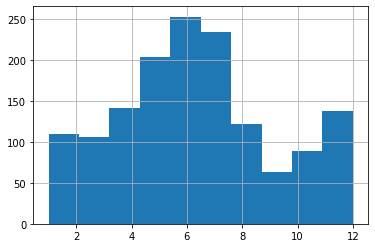

In [548]:
df_house['MoSold'].hist()

In [551]:
out_array = -np.cos(0.5236 * df_house['MoSold'])

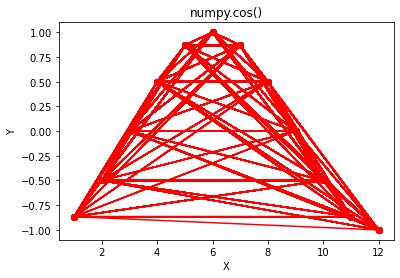

In [553]:
in_array = df_house['MoSold']
plt.plot(in_array, out_array, color = 'red', marker = "o")
plt.title("numpy.cos()")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [11]:
# fill na of 'Garage_Age' with 0
df_house['Garage_Age'] = df_house['Garage_Age'].fillna(0)

In [12]:
# continue creating new columns
# create and initialize a new column for 'RoofStyle.'
df_house['RoofStyle_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house)):
    if df_house.RoofStyle.iloc[i] == 'Gable':
        df_house.RoofStyle_.iloc[i] = 1141
    elif df_house.RoofStyle.iloc[i] == 'Hip':    
        df_house.RoofStyle_.iloc[i] = 286
    elif df_house.RoofStyle.iloc[i] == 'Flat':    
        df_house.RoofStyle_.iloc[i] = 13
    elif df_house.RoofStyle.iloc[i] == 'Gambrel':    
        df_house.RoofStyle_.iloc[i] = 11    
    elif df_house.RoofStyle.iloc[i] == 'Mansard':    
        df_house.RoofStyle_.iloc[i] = 7
    elif df_house.RoofStyle.iloc[i] == 'Shed':    
        df_house.RoofStyle_.iloc[i] = 2 

In [13]:
# create and initialize a new column for 'Exterior1st.'
df_house['Exterior1st_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house)):
    if df_house.Exterior1st.iloc[i] == 'VinylSd':
         df_house.Exterior1st_.iloc[i] = 515
    elif df_house.Exterior1st.iloc[i] == 'HdBoard':
         df_house.Exterior1st_.iloc[i] = 222
    elif df_house.Exterior1st.iloc[i] == 'MetalSd':
         df_house.Exterior1st_.iloc[i] = 220
    elif df_house.Exterior1st.iloc[i] == 'Wd Sdng':
         df_house.Exterior1st_.iloc[i] = 206
    elif df_house.Exterior1st.iloc[i] == 'Plywood':
         df_house.Exterior1st_.iloc[i] = 108
    elif df_house.Exterior1st.iloc[i] == 'CemntBd':
         df_house.Exterior1st_.iloc[i] = 61
    elif df_house.Exterior1st.iloc[i] == 'BrkFace':
         df_house.Exterior1st_.iloc[i] = 50
    elif df_house.Exterior1st.iloc[i] == 'WdShing':
         df_house.Exterior1st_.iloc[i] = 26
    elif df_house.Exterior1st.iloc[i] == 'Stucco':
         df_house.Exterior1st_.iloc[i] = 25
    elif df_house.Exterior1st.iloc[i] == 'AsbShng':
         df_house.Exterior1st_.iloc[i] = 20
    elif df_house.Exterior1st.iloc[i] == 'BrkComm' or df_house.Exterior1st.iloc[i] == 'Stone':
         df_house.Exterior1st_.iloc[i] = 2
    elif df_house.Exterior1st.iloc[i] == 'AsphShn' or df_house.Exterior1st.iloc[i] == 'ImStucc' or df_house.Exterior1st.iloc[i] == 'CBlock':
         df_house.Exterior1st_.iloc[i] = 1

In [14]:
# create and initialize a new column for 'Exterior2nd.'
df_house['Exterior2nd_'] = 0 
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house)):
    if df_house.Exterior2nd.iloc[i] == 'VinylSd':
        df_house.Exterior2nd_.iloc[i] = 504
    elif df_house.Exterior2nd.iloc[i] == 'MetalSd':
        df_house.Exterior2nd_.iloc[i] = 214
    elif df_house.Exterior2nd.iloc[i] == 'HdBoard':
        df_house.Exterior2nd_.iloc[i] = 207
    elif df_house.Exterior2nd.iloc[i] == 'Wd Sdng':
        df_house.Exterior2nd_.iloc[i] = 197
    elif df_house.Exterior2nd.iloc[i] == 'Plywood':
        df_house.Exterior2nd_.iloc[i] = 142
    elif df_house.Exterior2nd.iloc[i] == 'CmentBd':
        df_house.Exterior2nd_.iloc[i] = 60
    elif df_house.Exterior2nd.iloc[i] == 'Wd Shng':
        df_house.Exterior2nd_.iloc[i] = 38
    elif df_house.Exterior2nd.iloc[i] == 'Stucco':
        df_house.Exterior2nd_.iloc[i] = 26
    elif df_house.Exterior2nd.iloc[i] == 'BrkFace':
        df_house.Exterior2nd_.iloc[i] = 25
    elif df_house.Exterior2nd.iloc[i] == 'AsbShng':
        df_house.Exterior2nd_.iloc[i] = 20
    elif df_house.Exterior2nd.iloc[i] == 'ImStucc':
        df_house.Exterior2nd_.iloc[i] = 10
    elif df_house.Exterior2nd.iloc[i] == 'Brk Cmn':
        df_house.Exterior2nd_.iloc[i] = 7
    elif df_house.Exterior2nd.iloc[i] == 'Stone':
        df_house.Exterior2nd_.iloc[i] = 5
    elif df_house.Exterior2nd.iloc[i] == 'AsphShn':
        df_house.Exterior2nd_.iloc[i] = 3
    elif df_house.Exterior2nd.iloc[i] == 'Other' or df_house.Exterior2nd.iloc[i] == 'CBlock':
        df_house.Exterior2nd_.iloc[i] = 1

In [15]:
# create column for containing mean value of 'Exterior1st_' and 'Exterior2nd_.'
df_house['Exterior_Avg'] = (df_house['Exterior1st_'] + df_house['Exterior2nd_'])/2

In [16]:
# create and initialize a new column for 'MasVnrType.'
df_house['MasVnrType_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house)):
    if df_house.MasVnrType.iloc[i] == 'BrkFace':
        df_house.MasVnrType_.iloc[i] = 445
    elif df_house.MasVnrType.iloc[i] == 'Stone':
        df_house.MasVnrType_.iloc[i] = 128
    elif df_house.MasVnrType.iloc[i] == 'BrkCmn':
        df_house.MasVnrType_.iloc[i] = 15
    else:
        df_house.MasVnrType_.iloc[i] = 0

In [17]:
# Ordinal number encoding; I chose a five-number-scoring method; three-number too small, ten-number too large.
# Ex : 5
# Gd : 4
# TA : 3
# Fa : 2
# Po : 1
# create and initialize a new column for 'ExterQual.'
df_house['ExterQual_'] = 0
# handle its categorical data with 'ordinal number encoding.'
for i in range(len(df_house)):
    if df_house.ExterQual.iloc[i] == 'TA':
        df_house.ExterQual_.iloc[i] = 3
    elif df_house.ExterQual.iloc[i] == 'Gd':
        df_house.ExterQual_.iloc[i] = 4
    elif df_house.ExterQual.iloc[i] == 'Ex':
        df_house.ExterQual_.iloc[i] = 5
    elif df_house.ExterQual.iloc[i] == 'Fa':
        df_house.ExterQual_.iloc[i] = 2  

In [18]:
# create and initialize a new column for 'Foundation.'
df_house['Foundation_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house)):
    if df_house.Foundation.iloc[i] == 'PConc':
        df_house.Foundation_.iloc[i] = 647
    elif df_house.Foundation.iloc[i] == 'CBlock':
        df_house.Foundation_.iloc[i] = 634
    elif df_house.Foundation.iloc[i] == 'BrkTil':
        df_house.Foundation_.iloc[i] = 146
    elif df_house.Foundation.iloc[i] == 'Slab':
        df_house.Foundation_.iloc[i] = 24
    elif df_house.Foundation.iloc[i] == 'Stone':
        df_house.Foundation_.iloc[i] = 6
    elif df_house.Foundation.iloc[i] == 'Wood':
        df_house.Foundation_.iloc[i] = 3 

In [19]:
# Ex : 5
# Gd : 4
# TA : 3
# Fa : 2
# Po : 1
# create and initialize a new column for 'BsmtQual.'
df_house['BsmtQual_'] = 0
# handle its categorical data with 'ordinal number encoding.'
for i in range(len(df_house)):
    if df_house.BsmtQual.iloc[i] == 'TA':
        df_house.BsmtQual_.iloc[i] = 3
    elif df_house.BsmtQual.iloc[i] == 'Gd':
        df_house.BsmtQual_.iloc[i] = 4
    elif df_house.BsmtQual.iloc[i] == 'Ex':
        df_house.BsmtQual_.iloc[i] = 5
    elif df_house.BsmtQual.iloc[i] == 'Fa':
        df_house.BsmtQual_.iloc[i] = 2  
    elif df_house.BsmtQual.iloc[i] == 'Po':
        df_house.BsmtQual_.iloc[i] = 1      
    else:
        df_house.BsmtQual_.iloc[i] = 0

In [20]:
# Ex : 5
# Gd : 4
# TA : 3
# Fa : 2
# Po : 1
# create and initialize a new column for 'BsmtCond.'
df_house['BsmtCond_'] = 0
# handle its categorical data with 'ordinal number encoding.'
for i in range(len(df_house)):
    if df_house.BsmtCond.iloc[i] == 'TA':
        df_house.BsmtCond_.iloc[i] = 3
    elif df_house.BsmtCond.iloc[i] == 'Gd':
        df_house.BsmtCond_.iloc[i] = 4
    elif df_house.BsmtCond.iloc[i] == 'Ex':
        df_house.BsmtCond_.iloc[i] = 5
    elif df_house.BsmtCond.iloc[i] == 'Fa':
        df_house.BsmtCond_.iloc[i] = 2  
    elif df_house.BsmtCond.iloc[i] == 'Po':
        df_house.BsmtCond_.iloc[i] = 1      
    else:
        df_house.BsmtCond_.iloc[i] = 0

In [21]:
# create and initialize a new column for 'BsmtExposure.'
df_house['BsmtExposure_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house)):
    if df_house.BsmtExposure.iloc[i] == 'No':
        df_house.BsmtExposure_.iloc[i] = 953
    elif df_house.BsmtExposure.iloc[i] == 'Av':
        df_house.BsmtExposure_.iloc[i] = 221
    elif df_house.BsmtExposure.iloc[i] == 'Gd':
        df_house.BsmtExposure_.iloc[i] = 134
    elif df_house.BsmtExposure.iloc[i] == 'Mn':
        df_house.BsmtExposure_.iloc[i] = 114

In [22]:
# create and initialize a new column for 'BsmtFinType1.'
df_house['BsmtFinType1_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house)):
    if df_house.BsmtFinType1.iloc[i] == 'Unf':
        df_house.BsmtFinType1_.iloc[i] = 430
    elif df_house.BsmtFinType1.iloc[i] == 'GLQ':
        df_house.BsmtFinType1_.iloc[i] = 418
    elif df_house.BsmtFinType1.iloc[i] == 'ALQ':
        df_house.BsmtFinType1_.iloc[i] = 220
    elif df_house.BsmtFinType1.iloc[i] == 'BLQ':
        df_house.BsmtFinType1_.iloc[i] = 148
    elif df_house.BsmtFinType1.iloc[i] == 'Rec':
        df_house.BsmtFinType1_.iloc[i] = 133
    elif df_house.BsmtFinType1.iloc[i] == 'LwQ':
        df_house.BsmtFinType1_.iloc[i] = 74    

In [23]:
# Ex : 5
# Gd : 4
# TA : 3
# Fa : 2
# Po : 1
# create and initialize a new column for 'HeatingQC.'
df_house['HeatingQC_'] = 0
# handle its categorical data with 'ordinal number encoding.'
for i in range(len(df_house)):
    if df_house.HeatingQC.iloc[i] == 'TA':
        df_house.HeatingQC_.iloc[i] = 3
    elif df_house.HeatingQC.iloc[i] == 'Gd':
        df_house.HeatingQC_.iloc[i] = 4
    elif df_house.HeatingQC.iloc[i] == 'Ex':
        df_house.HeatingQC_.iloc[i] = 5
    elif df_house.HeatingQC.iloc[i] == 'Fa':
        df_house.HeatingQC_.iloc[i] = 2  
    elif df_house.HeatingQC.iloc[i] == 'Po':
        df_house.HeatingQC_.iloc[i] = 1      
    else:
        df_house.HeatingQC_.iloc[i] = 0

In [24]:
# Ex : 5
# Gd : 4
# TA : 3
# Fa : 2
# Po : 1
# create and initialize a new column for 'KitchenQual.'
df_house['KitchenQual_'] = 0
# handle its categorical data with 'ordinal number encoding.'
for i in range(len(df_house)):
    if df_house.KitchenQual.iloc[i] == 'TA':
        df_house.KitchenQual_.iloc[i] = 3
    elif df_house.KitchenQual.iloc[i] == 'Gd':
        df_house.KitchenQual_.iloc[i] = 4
    elif df_house.KitchenQual.iloc[i] == 'Ex':
        df_house.KitchenQual_.iloc[i] = 5
    elif df_house.KitchenQual.iloc[i] == 'Fa':
        df_house.KitchenQual_.iloc[i] = 2  
    elif df_house.KitchenQual.iloc[i] == 'Po':
        df_house.KitchenQual_.iloc[i] = 1      
    else:
        df_house.KitchenQual_.iloc[i] = 0

In [25]:
# Ex : 5
# Gd : 4
# TA : 3
# Fa : 2
# Po : 1
# create and initialize a new column for 'FireplaceQu.'
df_house['FireplaceQu_'] = 0
# handle its categorical data with 'ordinal number encoding.'
for i in range(len(df_house)):
    if df_house.FireplaceQu.iloc[i] == 'TA':
        df_house.FireplaceQu_.iloc[i] = 3
    elif df_house.FireplaceQu.iloc[i] == 'Gd':
        df_house.FireplaceQu_.iloc[i] = 4
    elif df_house.FireplaceQu.iloc[i] == 'Ex':
        df_house.FireplaceQu_.iloc[i] = 5
    elif df_house.FireplaceQu.iloc[i] == 'Fa':
        df_house.FireplaceQu_.iloc[i] = 2  
    elif df_house.FireplaceQu.iloc[i] == 'Po':
        df_house.FireplaceQu_.iloc[i] = 1      
    else:
        df_house.FireplaceQu_.iloc[i] = 0

In [26]:
# create and initialize a new column for 'GarageType.'
df_house['GarageType_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house)):
    if df_house.GarageType.iloc[i] == 'Attchd':
        df_house.GarageType_.iloc[i] = 870
    elif df_house.GarageType.iloc[i] == 'Detchd':
        df_house.GarageType_.iloc[i] = 387
    elif df_house.GarageType.iloc[i] == 'BuiltIn':
        df_house.GarageType_.iloc[i] = 88
    elif df_house.GarageType.iloc[i] == 'Basment':
        df_house.GarageType_.iloc[i] = 19  
    elif df_house.GarageType.iloc[i] == 'CarPort':
        df_house.GarageType_.iloc[i] = 9  
    elif df_house.GarageType.iloc[i] == '2Types':
        df_house.GarageType_.iloc[i] = 6

In [27]:
# create and initialize a new column for 'GarageFinish.'
df_house['GarageFinish_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house)):
    if df_house.GarageFinish.iloc[i] == 'Unf':
        df_house.GarageFinish_.iloc[i] = 605
    elif df_house.GarageFinish.iloc[i] == 'RFn':
        df_house.GarageFinish_.iloc[i] = 422
    elif df_house.GarageFinish.iloc[i] == 'Fin':
        df_house.GarageFinish_.iloc[i] = 352

In [28]:
# now I extract necessary columns for standardization and regression models.
df_house_extracted = df_house[['MSSubClass','MSZoning_','LotFrontage','LotArea','LotShape_','LotConfig_','Neighborhood_',
          'HouseStyle_','OverallQual','OverallCond','RoofStyle_','MasVnrType_','MasVnrArea','ExterQual_','Foundation_','BsmtQual_',
          'BsmtExposure_','BsmtFinType1_','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','HeatingQC_','1stFlrSF','2ndFlrSF',
          'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenQual_','TotRmsAbvGrd','Fireplaces','FireplaceQu_',
          'GarageType_','House_Age','Garage_Age','GarageFinish_','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Exterior_Avg',
          'SalePrice']]

In [29]:
# make a copy of df for the next step
df_house_extracted2 = df_house_extracted.copy(deep=True)

In [931]:
df_house_extracted.to_csv('C:/Users/thsong/df_house_extracted_tmp.csv',index=False)

### Preprocessing continued - Stadardizing train data

In [30]:
# use the library
scaler = StandardScaler()

In [31]:
# list up the columns to be standardized
col_lst = ['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice']

In [32]:
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted2[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted2[new_col] = scaled_data_tst

## Preprocessing test data

In [33]:
# make a copy of test data
df_house_test2 = df_house_test.copy(deep=True)

In [34]:
# fill na with 0 before encoding
df_house_test2['BsmtFinSF1'] = df_house_test2['BsmtFinSF1'].fillna(0)
df_house_test2['BsmtUnfSF'] = df_house_test2['BsmtUnfSF'].fillna(0)
df_house_test2['TotalBsmtSF'] = df_house_test2['TotalBsmtSF'].fillna(0)
df_house_test2['BsmtFullBath'] = df_house_test2['BsmtFullBath'].fillna(0)
df_house_test2['GarageCars'] = df_house_test2['GarageCars'].fillna(0)
df_house_test2['GarageArea'] = df_house_test2['GarageArea'].fillna(0)
df_house_test2['MasVnrArea'] = df_house_test2['MasVnrArea'].fillna(0)
# fill na with its mean value before encoding
df_house_test2['GarageYrBlt'] = df_house_test2['GarageYrBlt'].fillna(df_house_test2['GarageYrBlt'].mean())
df_house_test2['LotFrontage'] = df_house_test2['LotFrontage'].fillna(df_house_test2['LotFrontage'].mean())

In [35]:
# create and initialize a new column for 'MSZoning' in test data.
df_house_test2['MSZoning_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house_test2)):
    if df_house_test2.MSZoning.iloc[i] == 'RL':
        df_house_test2.MSZoning_.iloc[i] = 1114
    elif df_house_test2.MSZoning.iloc[i] == 'RM':
        df_house_test2.MSZoning_.iloc[i] = 242
    elif df_house_test2.MSZoning.iloc[i] == 'FV':
        df_house_test2.MSZoning_.iloc[i] = 74
    elif df_house_test2.MSZoning.iloc[i] == 'RH':
        df_house_test2.MSZoning_.iloc[i] = 10
    elif df_house_test2.MSZoning.iloc[i] == 'C (all)':    
        df_house_test2.MSZoning_.iloc[i] = 15

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [36]:
# create and initialize a new column for 'LotShape' in test data.
df_house_test2['LotShape_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house_test2)):
    if df_house_test2.LotShape.iloc[i] == 'Reg':
        df_house_test2.LotShape_.iloc[i] = 934
    elif df_house_test2.LotShape.iloc[i] == 'IR1':
        df_house_test2.LotShape_.iloc[i] = 484
    elif df_house_test2.LotShape.iloc[i] == 'IR2':
        df_house_test2.LotShape_.iloc[i] = 35
    elif df_house_test2.LotShape.iloc[i] == 'IR3':
        df_house_test2.LotShape_.iloc[i] = 6

In [37]:
# create and initialize a new column for 'LotConfig' in test data.
df_house_test2['LotConfig_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house_test2)):
    if df_house_test2.LotConfig.iloc[i] == 'Inside':
        df_house_test2.LotConfig_.iloc[i] = 1081
    elif df_house_test2.LotConfig.iloc[i] == 'Corner':
        df_house_test2.LotConfig_.iloc[i] = 248
    elif df_house_test2.LotConfig.iloc[i] == 'CulDSac':
        df_house_test2.LotConfig_.iloc[i] = 82
    elif df_house_test2.LotConfig.iloc[i] == 'FR2':
        df_house_test2.LotConfig_.iloc[i] = 38
    elif df_house_test2.LotConfig.iloc[i] == 'FR3':
        df_house_test2.LotConfig_.iloc[i] = 10

In [38]:
# create and initialize a new column for 'Neighborhood' in test data.
df_house_test2['Neighborhood_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house_test2)):
    if df_house_test2.Neighborhood.iloc[i] == 'NAmes':
        df_house_test2.Neighborhood_.iloc[i] = 218
    elif df_house_test2.Neighborhood.iloc[i] == 'CollgCr':
        df_house_test2.Neighborhood_.iloc[i] = 117
    elif df_house_test2.Neighborhood.iloc[i] == 'OldTown':    
        df_house_test2.Neighborhood_.iloc[i] = 126
    elif df_house_test2.Neighborhood.iloc[i] == 'Edwards': 
        df_house_test2.Neighborhood_.iloc[i] = 94
    elif df_house_test2.Neighborhood.iloc[i] == 'Somerst':     
        df_house_test2.Neighborhood_.iloc[i] = 96
    elif df_house_test2.Neighborhood.iloc[i] == 'Gilbert':     
        df_house_test2.Neighborhood_.iloc[i] = 86
    elif df_house_test2.Neighborhood.iloc[i] == 'NridgHt':     
        df_house_test2.Neighborhood_.iloc[i] = 89
    elif df_house_test2.Neighborhood.iloc[i] == 'Sawyer':   
        df_house_test2.Neighborhood_.iloc[i] = 77 
    elif df_house_test2.Neighborhood.iloc[i] == 'NWAmes':       
        df_house_test2.Neighborhood_.iloc[i] = 58 
    elif df_house_test2.Neighborhood.iloc[i] == 'SawyerW':  
        df_house_test2.Neighborhood_.iloc[i] = 66 
    elif df_house_test2.Neighborhood.iloc[i] == 'BrkSide':     
        df_house_test2.Neighborhood_.iloc[i] = 50 
    elif df_house_test2.Neighborhood.iloc[i] == 'Crawfor':     
        df_house_test2.Neighborhood_.iloc[i] = 52 
    elif df_house_test2.Neighborhood.iloc[i] == 'Mitchel':    
        df_house_test2.Neighborhood_.iloc[i] = 65 
    elif df_house_test2.Neighborhood.iloc[i] == 'NoRidge':        
        df_house_test2.Neighborhood_.iloc[i] = 30 
    elif df_house_test2.Neighborhood.iloc[i] == 'Timber':     
        df_house_test2.Neighborhood_.iloc[i] = 34 
    elif df_house_test2.Neighborhood.iloc[i] == 'IDOTRR':   
        df_house_test2.Neighborhood_.iloc[i] = 56 
    elif df_house_test2.Neighborhood.iloc[i] == 'ClearCr':       
        df_house_test2.Neighborhood_.iloc[i] = 16 
    elif df_house_test2.Neighborhood.iloc[i] == 'StoneBr':      
        df_house_test2.Neighborhood_.iloc[i] = 26 
    elif df_house_test2.Neighborhood.iloc[i] == 'SWISU':          
        df_house_test2.Neighborhood_.iloc[i] = 23 
    elif df_house_test2.Neighborhood.iloc[i] == 'MeadowV':          
        df_house_test2.Neighborhood_.iloc[i] = 20 
    elif df_house_test2.Neighborhood.iloc[i] == 'Blmngtn':          
        df_house_test2.Neighborhood_.iloc[i] = 11 
    elif df_house_test2.Neighborhood.iloc[i] == 'BrDale':          
        df_house_test2.Neighborhood_.iloc[i] = 14 
    elif df_house_test2.Neighborhood.iloc[i] == 'Veenker':          
        df_house_test2.Neighborhood_.iloc[i] = 13 
    elif df_house_test2.Neighborhood.iloc[i] == 'NPkVill':          
        df_house_test2.Neighborhood_.iloc[i] = 14
    elif df_house_test2.Neighborhood.iloc[i] == 'Blueste':          
        df_house_test2.Neighborhood_.iloc[i] = 8

In [39]:
# create and initialize a new column for 'HouseStyle' in test data.
df_house_test2['HouseStyle_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house_test2)):
    if df_house_test2.HouseStyle.iloc[i] == '1Story':
        df_house_test2.HouseStyle_.iloc[i] = 745
    elif df_house_test2.HouseStyle.iloc[i] == '2Story':
        df_house_test2.HouseStyle_.iloc[i] = 427
    elif df_house_test2.HouseStyle.iloc[i] == '1.5Fin':    
        df_house_test2.HouseStyle_.iloc[i] = 160
    elif df_house_test2.HouseStyle.iloc[i] == 'SLvl':    
        df_house_test2.HouseStyle_.iloc[i] = 63
    elif df_house_test2.HouseStyle.iloc[i] == 'SFoyer':    
        df_house_test2.HouseStyle_.iloc[i] = 46
    elif df_house_test2.HouseStyle.iloc[i] == '1.5Unf':    
        df_house_test2.HouseStyle_.iloc[i] = 5
    elif df_house_test2.HouseStyle.iloc[i] == '2.5Unf':    
        df_house_test2.HouseStyle_.iloc[i] = 13
    elif df_house_test2.HouseStyle.iloc[i] == '2.5Fin':    
        df_house_test2.HouseStyle_.iloc[i] = 0

In [40]:
# create and initialize a new column for 'RoofStyle' in test data.
df_house_test2['RoofStyle_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house_test2)):
    if df_house_test2.RoofStyle.iloc[i] == 'Gable':
        df_house_test2.RoofStyle_.iloc[i] = 1169
    elif df_house_test2.RoofStyle.iloc[i] == 'Hip':    
        df_house_test2.RoofStyle_.iloc[i] = 265
    elif df_house_test2.RoofStyle.iloc[i] == 'Flat':    
        df_house_test2.RoofStyle_.iloc[i] = 7
    elif df_house_test2.RoofStyle.iloc[i] == 'Gambrel':    
        df_house_test2.RoofStyle_.iloc[i] = 11    
    elif df_house_test2.RoofStyle.iloc[i] == 'Mansard':    
        df_house_test2.RoofStyle_.iloc[i] = 4
    elif df_house_test2.RoofStyle.iloc[i] == 'Shed':    
        df_house_test2.RoofStyle_.iloc[i] = 3 

In [41]:
# create and initialize a new column for 'MasVnrType' in test data.
df_house_test2['MasVnrType_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house_test2)):
    if df_house_test2.MasVnrType.iloc[i] == 'BrkFace':
        df_house_test2.MasVnrType_.iloc[i] = 434
    elif df_house_test2.MasVnrType.iloc[i] == 'Stone':
        df_house_test2.MasVnrType_.iloc[i] = 121
    elif df_house_test2.MasVnrType.iloc[i] == 'BrkCmn':
        df_house_test2.MasVnrType_.iloc[i] = 10
    else:
        df_house_test2.MasVnrType_.iloc[i] = 0

In [42]:
# Ex : 5
# Gd : 4
# TA : 3
# Fa : 2
# Po : 1
# create and initialize a new column for 'ExterQual' in test data.
df_house_test2['ExterQual_'] = 0
# handle its categorical data with 'ordinal number encoding.'
for i in range(len(df_house_test2)):
    if df_house_test2.ExterQual.iloc[i] == 'TA':
        df_house_test2.ExterQual_.iloc[i] = 3
    elif df_house_test2.ExterQual.iloc[i] == 'Gd':
        df_house_test2.ExterQual_.iloc[i] = 4
    elif df_house_test2.ExterQual.iloc[i] == 'Ex':
        df_house_test2.ExterQual_.iloc[i] = 5
    elif df_house_test2.ExterQual.iloc[i] == 'Fa':
        df_house_test2.ExterQual_.iloc[i] = 2  

In [43]:
# create and initialize a new column for 'Foundation' in test data.
df_house_test2['Foundation_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house_test2)):
    if df_house_test2.Foundation.iloc[i] == 'PConc':
        df_house_test2.Foundation_.iloc[i] = 661
    elif df_house_test2.Foundation.iloc[i] == 'CBlock':
        df_house_test2.Foundation_.iloc[i] = 601
    elif df_house_test2.Foundation.iloc[i] == 'BrkTil':
        df_house_test2.Foundation_.iloc[i] = 165
    elif df_house_test2.Foundation.iloc[i] == 'Slab':
        df_house_test2.Foundation_.iloc[i] = 25
    elif df_house_test2.Foundation.iloc[i] == 'Stone':
        df_house_test2.Foundation_.iloc[i] = 5
    elif df_house_test2.Foundation.iloc[i] == 'Wood':
        df_house_test2.Foundation_.iloc[i] = 2 

In [44]:
# Ex : 5
# Gd : 4
# TA : 3
# Fa : 2
# Po : 1
# create and initialize a new column for 'BsmtQual' in test data.
df_house_test2['BsmtQual_'] = 0
# handle its categorical data with 'ordinal number encoding.'
for i in range(len(df_house_test2)):
    if df_house_test2.BsmtQual.iloc[i] == 'TA':
        df_house_test2.BsmtQual_.iloc[i] = 3
    elif df_house_test2.BsmtQual.iloc[i] == 'Gd':
        df_house_test2.BsmtQual_.iloc[i] = 4
    elif df_house_test2.BsmtQual.iloc[i] == 'Ex':
        df_house_test2.BsmtQual_.iloc[i] = 5
    elif df_house_test2.BsmtQual.iloc[i] == 'Fa':
        df_house_test2.BsmtQual_.iloc[i] = 2  
    elif df_house_test2.BsmtQual.iloc[i] == 'Po':
        df_house_test2.BsmtQual_.iloc[i] = 1      
    else:
        df_house_test2.BsmtQual_.iloc[i] = 0

In [45]:
# create and initialize a new column for 'BsmtExposure' in test data.
df_house_test2['BsmtExposure_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house_test2)):
    if df_house_test2.BsmtExposure.iloc[i] == 'No':
        df_house_test2.BsmtExposure_.iloc[i] = 951
    elif df_house_test2.BsmtExposure.iloc[i] == 'Av':
        df_house_test2.BsmtExposure_.iloc[i] = 197
    elif df_house_test2.BsmtExposure.iloc[i] == 'Gd':
        df_house_test2.BsmtExposure_.iloc[i] = 142
    elif df_house_test2.BsmtExposure.iloc[i] == 'Mn':
        df_house_test2.BsmtExposure_.iloc[i] = 125

In [46]:
# create and initialize a new column for 'BsmtFinType1' in test data.
df_house_test2['BsmtFinType1_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house_test2)):
    if df_house_test2.BsmtFinType1.iloc[i] == 'Unf':
        df_house_test2.BsmtFinType1_.iloc[i] = 421
    elif df_house_test2.BsmtFinType1.iloc[i] == 'GLQ':
        df_house_test2.BsmtFinType1_.iloc[i] = 431
    elif df_house_test2.BsmtFinType1.iloc[i] == 'ALQ':
        df_house_test2.BsmtFinType1_.iloc[i] = 209
    elif df_house_test2.BsmtFinType1.iloc[i] == 'BLQ':
        df_house_test2.BsmtFinType1_.iloc[i] = 121
    elif df_house_test2.BsmtFinType1.iloc[i] == 'Rec':
        df_house_test2.BsmtFinType1_.iloc[i] = 155
    elif df_house_test2.BsmtFinType1.iloc[i] == 'LwQ':
        df_house_test2.BsmtFinType1_.iloc[i] = 80   

In [47]:
# Ex : 5
# Gd : 4
# TA : 3
# Fa : 2
# Po : 1
# create and initialize a new column for 'HeatingQC' in test data.
df_house_test2['HeatingQC_'] = 0
# handle its categorical data with 'ordinal number encoding.'
for i in range(len(df_house_test2)):
    if df_house_test2.HeatingQC.iloc[i] == 'TA':
        df_house_test2.HeatingQC_.iloc[i] = 3
    elif df_house_test2.HeatingQC.iloc[i] == 'Gd':
        df_house_test2.HeatingQC_.iloc[i] = 4
    elif df_house_test2.HeatingQC.iloc[i] == 'Ex':
        df_house_test2.HeatingQC_.iloc[i] = 5
    elif df_house_test2.HeatingQC.iloc[i] == 'Fa':
        df_house_test2.HeatingQC_.iloc[i] = 2  
    elif df_house_test2.HeatingQC.iloc[i] == 'Po':
        df_house_test2.HeatingQC_.iloc[i] = 1      
    else:
        df_house_test2.HeatingQC_.iloc[i] = 0

In [48]:
# Ex : 5
# Gd : 4
# TA : 3
# Fa : 2
# Po : 1
# create and initialize a new column for 'KitchenQual' in test data.
df_house_test2['KitchenQual_'] = 0
# handle its categorical data with 'ordinal number encoding.'
for i in range(len(df_house_test2)):
    if df_house_test2.KitchenQual.iloc[i] == 'TA':
        df_house_test2.KitchenQual_.iloc[i] = 3
    elif df_house_test2.KitchenQual.iloc[i] == 'Gd':
        df_house_test2.KitchenQual_.iloc[i] = 4
    elif df_house_test2.KitchenQual.iloc[i] == 'Ex':
        df_house_test2.KitchenQual_.iloc[i] = 5
    elif df_house_test2.KitchenQual.iloc[i] == 'Fa':
        df_house_test2.KitchenQual_.iloc[i] = 2  
    elif df_house_test2.KitchenQual.iloc[i] == 'Po':
        df_house_test2.KitchenQual_.iloc[i] = 1      
    else:
        df_house_test2.KitchenQual_.iloc[i] = 0

In [49]:
# Ex : 5
# Gd : 4
# TA : 3
# Fa : 2
# Po : 1
# create and initialize a new column for 'FireplaceQu' in test data.
df_house_test2['FireplaceQu_'] = 0
# handle its categorical data with 'ordinal number encoding.'
for i in range(len(df_house_test2)):
    if df_house_test2.FireplaceQu.iloc[i] == 'TA':
        df_house_test2.FireplaceQu_.iloc[i] = 3
    elif df_house_test2.FireplaceQu.iloc[i] == 'Gd':
        df_house_test2.FireplaceQu_.iloc[i] = 4
    elif df_house_test2.FireplaceQu.iloc[i] == 'Ex':
        df_house_test2.FireplaceQu_.iloc[i] = 5
    elif df_house_test2.FireplaceQu.iloc[i] == 'Fa':
        df_house_test2.FireplaceQu_.iloc[i] = 2  
    elif df_house_test2.FireplaceQu.iloc[i] == 'Po':
        df_house_test2.FireplaceQu_.iloc[i] = 1      
    else:
        df_house_test2.FireplaceQu_.iloc[i] = 0

In [50]:
# create and initialize a new column for 'GarageType' in test data.
df_house_test2['GarageType_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house_test2)):
    if df_house_test2.GarageType.iloc[i] == 'Attchd':
        df_house_test2.GarageType_.iloc[i] = 853
    elif df_house_test2.GarageType.iloc[i] == 'Detchd':
        df_house_test2.GarageType_.iloc[i] = 392
    elif df_house_test2.GarageType.iloc[i] == 'BuiltIn':
        df_house_test2.GarageType_.iloc[i] = 98
    elif df_house_test2.GarageType.iloc[i] == 'Basment':
        df_house_test2.GarageType_.iloc[i] = 17  
    elif df_house_test2.GarageType.iloc[i] == 'CarPort':
        df_house_test2.GarageType_.iloc[i] = 6  
    elif df_house_test2.GarageType.iloc[i] == '2Types':
        df_house_test2.GarageType_.iloc[i] = 17

In [51]:
# create new columns that substitute some columns in the original test data, for regression models
df_house_test2['House_Age'] = abs(df_house_test2['YrSold'] - df_house_test2['YearRemodAdd'])
df_house_test2['Garage_Age'] = abs(df_house_test2['YrSold'] - df_house_test2['GarageYrBlt'])

In [52]:
# fill na of 'Garage_Age' in test data with 0 
df_house_test2['Garage_Age'] = df_house_test2['Garage_Age'].fillna(0)

In [53]:
# create and initialize a new column for 'GarageFinish' in test data.
df_house_test2['GarageFinish_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house_test2)):
    if df_house_test2.GarageFinish.iloc[i] == 'Unf':
        df_house_test2.GarageFinish_.iloc[i] = 625
    elif df_house_test2.GarageFinish.iloc[i] == 'RFn':
        df_house_test2.GarageFinish_.iloc[i] = 389
    elif df_house_test2.GarageFinish.iloc[i] == 'Fin':
        df_house_test2.GarageFinish_.iloc[i] = 367    

In [54]:
# create and initialize a new column for 'Exterior1st' in test data.
df_house_test2['Exterior1st_'] = 0
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house_test2)):
    if df_house_test2.Exterior1st.iloc[i] == 'VinylSd':
         df_house_test2.Exterior1st_.iloc[i] = 510
    elif df_house_test2.Exterior1st.iloc[i] == 'HdBoard':
         df_house_test2.Exterior1st_.iloc[i] = 220
    elif df_house_test2.Exterior1st.iloc[i] == 'MetalSd':
         df_house_test2.Exterior1st_.iloc[i] = 230
    elif df_house_test2.Exterior1st.iloc[i] == 'Wd Sdng':
         df_house_test2.Exterior1st_.iloc[i] = 205
    elif df_house_test2.Exterior1st.iloc[i] == 'Plywood':
         df_house_test2.Exterior1st_.iloc[i] = 113
    elif df_house_test2.Exterior1st.iloc[i] == 'CemntBd':
         df_house_test2.Exterior1st_.iloc[i] = 65
    elif df_house_test2.Exterior1st.iloc[i] == 'BrkFace':
         df_house_test2.Exterior1st_.iloc[i] = 37
    elif df_house_test2.Exterior1st.iloc[i] == 'WdShing':
         df_house_test2.Exterior1st_.iloc[i] = 30
    elif df_house_test2.Exterior1st.iloc[i] == 'Stucco':
         df_house_test2.Exterior1st_.iloc[i] = 18
    elif df_house_test2.Exterior1st.iloc[i] == 'AsbShng':
         df_house_test2.Exterior1st_.iloc[i] = 24
    elif df_house_test2.Exterior1st.iloc[i] == 'BrkComm':
         df_house_test2.Exterior1st_.iloc[i] = 4
    elif df_house_test2.Exterior1st.iloc[i] == 'AsphShn' or df_house_test2.Exterior1st.iloc[i] == 'CBlock':
         df_house_test2.Exterior1st_.iloc[i] = 1

In [55]:
# create and initialize a new column for 'Exterior2nd' in test data.
df_house_test2['Exterior2nd_'] = 0 
# handle its categorical data with 'frequency encoding.'
for i in range(len(df_house_test2)):
    if df_house_test2.Exterior2nd.iloc[i] == 'VinylSd':
        df_house_test2.Exterior2nd_.iloc[i] = 510
    elif df_house_test2.Exterior2nd.iloc[i] == 'MetalSd':
        df_house_test2.Exterior2nd_.iloc[i] = 233
    elif df_house_test2.Exterior2nd.iloc[i] == 'HdBoard':
        df_house_test2.Exterior2nd_.iloc[i] = 199
    elif df_house_test2.Exterior2nd.iloc[i] == 'Wd Sdng':
        df_house_test2.Exterior2nd_.iloc[i] = 194
    elif df_house_test2.Exterior2nd.iloc[i] == 'Plywood':
        df_house_test2.Exterior2nd_.iloc[i] = 128
    elif df_house_test2.Exterior2nd.iloc[i] == 'CmentBd':
        df_house_test2.Exterior2nd_.iloc[i] = 66
    elif df_house_test2.Exterior2nd.iloc[i] == 'Wd Shng':
        df_house_test2.Exterior2nd_.iloc[i] = 43
    elif df_house_test2.Exterior2nd.iloc[i] == 'Stucco':
        df_house_test2.Exterior2nd_.iloc[i] = 21
    elif df_house_test2.Exterior2nd.iloc[i] == 'BrkFace':
        df_house_test2.Exterior2nd_.iloc[i] = 22
    elif df_house_test2.Exterior2nd.iloc[i] == 'AsbShng':
        df_house_test2.Exterior2nd_.iloc[i] = 18
    elif df_house_test2.Exterior2nd.iloc[i] == 'ImStucc':
        df_house_test2.Exterior2nd_.iloc[i] = 5
    elif df_house_test2.Exterior2nd.iloc[i] == 'Brk Cmn':
        df_house_test2.Exterior2nd_.iloc[i] = 15
    elif df_house_test2.Exterior2nd.iloc[i] == 'Stone' or df_house_test2.Exterior2nd.iloc[i] == 'AsphShn':
        df_house_test2.Exterior2nd_.iloc[i] = 1
    elif df_house_test2.Exterior2nd.iloc[i] == 'CBlock':
        df_house_test2.Exterior2nd_.iloc[i] = 2
    

In [56]:
# create column for containing mean value of 'Exterior1st_' and 'Exterior2nd_' in the test data
df_house_test2['Exterior_Avg'] = (df_house_test2['Exterior1st_'] + df_house_test2['Exterior2nd_'])/2

In [57]:
# extract columns for standardizing
df_house_test_extracted = df_house_test2[['MSSubClass','MSZoning_','LotFrontage','LotArea','LotShape_','LotConfig_','Neighborhood_',
          'HouseStyle_','OverallQual','OverallCond','RoofStyle_','MasVnrType_','MasVnrArea','ExterQual_','Foundation_','BsmtQual_',
          'BsmtExposure_','BsmtFinType1_','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','HeatingQC_','1stFlrSF','2ndFlrSF',
          'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenQual_','TotRmsAbvGrd','Fireplaces','FireplaceQu_',
          'GarageType_','House_Age','Garage_Age','GarageFinish_','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Exterior_Avg']]

In [58]:
# make a copy of extracted test data
df_house_test_extracted2 = df_house_test_extracted.copy(deep=True)

In [932]:
df_house_test_extracted.to_csv('C:/Users/thsong/df_house_test_extracted_tmp.csv',index=False)

### Preprocessing test data continued - Stadardizing test data

In [59]:
# list up the columns in the test data to be standardized
col_lst2 = ['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg']

In [60]:
# create column and contain standardized test data from the columns above, in sequence
for i in range(len(col_lst2)):
    array_tst2 = df_house_test_extracted2[col_lst2[i]].values.reshape(-1,1)
    scaled_data_tst2 = scaler.fit_transform(array_tst2) 
    new_col2 = col_lst2[i] + '(scaled)'
    df_house_test_extracted2[new_col2] = scaled_data_tst2

## Modelings

In [406]:
### define a function for printing best parameters for modeling
def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X, y) # the same result as .fit(X_train,y_train)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('when the model {0} is taken with grid search cv = 5 the best avg rmse value is : {1}, and the best parameter is : {2}'.format(model.__class__.__name__, np.round(rmse,4), grid_model.best_params_))

In [62]:
"""# temporary modelings
ridge_fitter_tst = Ridge()
lasso_fitter_tst = Lasso()"""

'# temporary modelings\nridge_fitter_tst = Ridge()\nlasso_fitter_tst = Lasso()'

In [63]:
"""
### example list of params for the linear models and determine the best of them
ridge_params2 = {'alpha':[50,60,70,80,90,100,200,210,220,221,222,223,224,225,226,227,228,229,230,240,250,260,270,280,290,300,400]}
lasso_params2 = {'alpha':[0.05,0.021,0.022,0.023,0.024,0.025,0.026,0.027,0.028,0.029,0.03,0.1]}
l1_ratio_params = {'l1_ratio':[0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3]}
# and so on...
### example list of params for the ensemble models and determine the best of them
candidate_params = {'n_estimators' : [1000,1400,1500,1510,1520,1530,1540,1550,1560,1570,1580,1590,1600,1700,1800,1900]}
# and so on..."""

"\n### example list of params for the linear models and determine the best of them\nridge_params2 = {'alpha':[50,60,70,80,90,100,200,210,220,221,222,223,224,225,226,227,228,229,230,240,250,260,270,280,290,300,400]}\nlasso_params2 = {'alpha':[0.05,0.021,0.022,0.023,0.024,0.025,0.026,0.027,0.028,0.029,0.03,0.1]}\nl1_ratio_params = {'l1_ratio':[0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3]}\n# and so on...\n### example list of params for the ensemble models and determine the best of them\ncandidate_params = {'n_estimators' : [1000,1400,1500,1510,1520,1530,1540,1550,1560,1570,1580,1590,1600,1700,1800,1900]}\n# and so on..."

In [64]:
"""# an example of printing best parameters using the user-defined function above
print_best_params(ridge_fitter_tst,ridge_params2)"""

'# an example of printing best parameters using the user-defined function above\nprint_best_params(ridge_fitter_tst,ridge_params2)'

In [65]:
# ordinary linear regression model
line_fitter = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter = Ridge(alpha=222)
lasso_fitter = Lasso(alpha=0.0078)
elasticNet_fitter = ElasticNet(alpha = 0.029, l1_ratio=0.22)
# ensemble models
xgb_fitter = XGBRegressor(n_estimators=1475)
gbm_fitter = GradientBoostingRegressor(n_estimators=1270)
rf_fitter = RandomForestRegressor(n_estimators=628)
lgbm_fitter = LGBMRegressor(n_estimators=60)
bg_fitter = BaggingRegressor(n_estimators=607)
et_fitter = ExtraTreesRegressor(n_estimators=91)

## Evaluations

In [66]:
### define a fuction for printing RMSLE values of each regression model
def print_rmsle_values(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    ### print and return RMSLE values of each model
    print('#'*5, model.__class__.__name__,'#'*5)
    # not to make nan values from np.log1p
    y_test_ = y_test - y_test.min() + 1
    # plug y_test_ into np.log1p
    log_y = np.log1p(y_test_)
    # not to make nan values from np.log1p
    pred_ = pred - pred.min() + 1
    # plug pred_ into np.log1p
    log_pred = np.log1p(pred_)
    # get squared error
    squared_error = (log_y - log_pred)**2 
    rmsle = np.sqrt(np.mean(squared_error))
    # print RMSLE value
    print('RMSLE : {}'.format(rmsle))
    # return RMSLE value
    return rmsle

In [ ]:


# mean_squared_log_error())

In [67]:
# extract train data columns to be plugged in regression models
X = df_house_extracted2[['MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)']]
y = df_house_extracted2['SalePrice(scaled)']

In [68]:
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter,ridge_fitter,lasso_fitter,elasticNet_fitter,xgb_fitter,gbm_fitter,rf_fitter,lgbm_fitter,bg_fitter,et_fitter]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.09772831158517487
##### Ridge #####
RMSLE : 0.09458971795025534
##### Lasso #####
RMSLE : 0.101411220783548
##### ElasticNet #####
RMSLE : 0.09985114186362445
##### XGBRegressor #####
RMSLE : 0.08797935611084252
##### GradientBoostingRegressor #####
RMSLE : 0.07967544819842964
##### RandomForestRegressor #####
RMSLE : 0.11241671267167054
##### LGBMRegressor #####
RMSLE : 0.11508578449877785
##### BaggingRegressor #####
RMSLE : 0.11221794978333044
##### ExtraTreesRegressor #####
RMSLE : 0.13127761078613126


{'GradientBoostingRegressor(n_estimators=1270)': 0.07967544819842964,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=1475,\n             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,\n             reg_alpha=0, reg_lambda=1, ...)": 0.08797935611084252,
 'Ridge(alpha=222)': 0.09458971795025534,
 'LinearRegression()': 0.09772831158517487,
 'ElasticNet(alpha=0.029, l1_ratio=0.22)': 0.09985114186362445,
 'Lasso(alpha=0.0078)': 0.101411220783548,
 'BaggingRegr

In [70]:
# for i in range(len(X)):
#     for j in range(len(X.columns)):
#         if pd.isna(X.iloc[i,j]):
#             print(i,j)

In [71]:
# for i in range(len(y_test)):
#     if pd.isna(y_test.iloc[i]):
#         print(i)

In [72]:
sorted(dict_rmsle.items(), key=lambda item: item[1])[0][0]

'GradientBoostingRegressor(n_estimators=1270)'

## Predict with single model

In [73]:
df_house_test_extracted2b_predicted = df_house_test_extracted2[['MSSubClass(scaled)', 'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)']]

In [74]:
for i in range(len(df_house_test_extracted2b_predicted)):
    for j in range(len(df_house_test_extracted2b_predicted.columns)):
        if pd.isna(df_house_test_extracted2b_predicted.iloc[i,j]):
            print(i,j)

In [75]:
df_house_test_extracted2b_predicted.columns[2]

'LotFrontage(scaled)'

In [76]:
df_house_test_extracted2b_predicted.columns[35]

'Garage_Age(scaled)'

In [77]:
# get model with rank1 (model that shows best performance)
model_rank1 = sorted(dict_rmsle.items(), key=lambda item: item[1])[0][0]
# predict result with the model above
if model_rank1.startswith('LinearRegression'):
    result_from_model = line_fitter.predict(df_house_test_extracted2b_predicted)
elif model_rank1.startswith('Ridge'):
    result_from_model = ridge_fitter.predict(df_house_test_extracted2b_predicted)
elif model_rank1.startswith('Lasso'):
    result_from_model = lasso_fitter.predict(df_house_test_extracted2b_predicted)
elif model_rank1.startswith('ElasticNet'):
    result_from_model = elasticNet_fitter().predict(df_house_test_extracted2b_predicted)
elif model_rank1.startswith('XGBRegressor'):
    result_from_model = xgb_fitter.predict(df_house_test_extracted2b_predicted)
elif model_rank1.startswith('GradientBoostingRegressor'):
    result_from_model = gbm_fitter.predict(df_house_test_extracted2b_predicted)
elif model_rank1.startswith('RandomForestRegressor'):
    result_from_model = rf_fitter.predict(df_house_test_extracted2b_predicted)
elif model_rank1.starstswith('LGBMRegressor'):
    result_from_model = lgbm_fitter.predict(df_house_test_extracted2b_predicted)
elif model_rank1.startswith('BaggingRegressor'):
    result_from_model = bg_fitter.predict(df_house_test_extracted2b_predicted)
elif model_rank1.starttswith('ExtraTreesRegressor'):
    result_from_model = et_fitter.predict(df_house_test_extracted2b_predicted)

In [78]:
# get mean and standard deviation of SalePrice in train data to restore predicted standardized SalePrice in test data 
mean_sp = df_house['SalePrice'].mean()
std_sp = df_house['SalePrice'].std()

In [79]:
# create and initialize column SalePrice in test data
df_house_test2['SalePrice'] = 0

In [80]:
# insert predicted result into the test data (does 'not' indicate the test set in train data)
# using mean and standard deviation values of the train data
for i in range(len(df_house_test2)):
    df_house_test2['SalePrice'].iloc[i] = result_from_model[i]*std_sp + mean_sp

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [81]:
df_house_test2[['Id','SalePrice']]

,Id,SalePrice
0,1461,140198.588953
1,1462,160479.948466
2,1463,195361.480266
3,1464,192737.186117
4,1465,189578.872461
...,...,...
1454,2915,73199.802270
1455,2916,73882.207158
1456,2917,179501.864905
1457,2918,120813.042812


In [82]:
# index=False for submission ?
#df_house_test2[['Id','SalePrice']].to_csv('C:/Users/thsong/submission1.csv',index=False)

## Predict with Stacking model

In [83]:
estimators = [('lr',line_fitter),('rdg',ridge_fitter),('las',lasso_fitter),('eln',elasticNet_fitter),('rf',xgb_fitter),('gbr',gbm_fitter),('xgb',rf_fitter),('lgbm',lgbm_fitter),('br',bg_fitter),('et',et_fitter)]

In [84]:
"""# single model that showed the best performance was gradient boosting regressor when I was organizing these codes to upload at kaggle
st_fitter = StackingRegressor(estimators=estimators,final_estimator=gbm_fitter)"""

'# single model that showed the best performance was gradient boosting regressor when I was organizing these codes to upload at kaggle\nst_fitter = StackingRegressor(estimators=estimators,final_estimator=gbm_fitter)'

In [85]:
"""### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [st_fitter]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
# ### Sort RMSLE values with ascending order
# {k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}"""
"""##### StackingRegressor #####
RMSLE : 0.08765111740479754"""

'##### StackingRegressor #####\nRMSLE : 0.08765111740479754'

In [86]:
st_fitter2 = StackingRegressor(estimators=estimators,final_estimator=line_fitter)

In [87]:
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [st_fitter2]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
# ### Sort RMSLE values in ascending order
# {k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### StackingRegressor #####
RMSLE : 0.07481443184971623


In [88]:
"""st_fitter3 = StackingRegressor(estimators=estimators,final_estimator=ridge_fitter)
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [st_fitter3]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value"""

'st_fitter3 = StackingRegressor(estimators=estimators,final_estimator=ridge_fitter)\n### Print RMSLE values using the user-defined function above\ndict_rmsle = {}\nfor model in [st_fitter3]:\n    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)\n    dict_rmsle[str(model)] = rmsle_value'

In [89]:
"""st_fitter4 = StackingRegressor(estimators=estimators,final_estimator=lasso_fitter)
st_fitter5 = StackingRegressor(estimators=estimators,final_estimator=elasticNet_fitter)
st_fitter6 = StackingRegressor(estimators=estimators,final_estimator=xgb_fitter)
st_fitter7 = StackingRegressor(estimators=estimators,final_estimator=rf_fitter)
st_fitter8 = StackingRegressor(estimators=estimators,final_estimator=lgbm_fitter)
st_fitter9 = StackingRegressor(estimators=estimators,final_estimator=bg_fitter)
st_fitter10 = StackingRegressor(estimators=estimators,final_estimator=et_fitter)
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [st_fitter4,st_fitter5,st_fitter6,st_fitter7,st_fitter8,st_fitter9,st_fitter10]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values with ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}"""

'st_fitter4 = StackingRegressor(estimators=estimators,final_estimator=lasso_fitter)\nst_fitter5 = StackingRegressor(estimators=estimators,final_estimator=elasticNet_fitter)\nst_fitter6 = StackingRegressor(estimators=estimators,final_estimator=xgb_fitter)\nst_fitter7 = StackingRegressor(estimators=estimators,final_estimator=rf_fitter)\nst_fitter8 = StackingRegressor(estimators=estimators,final_estimator=lgbm_fitter)\nst_fitter9 = StackingRegressor(estimators=estimators,final_estimator=bg_fitter)\nst_fitter10 = StackingRegressor(estimators=estimators,final_estimator=et_fitter)\n### Print RMSLE values using the user-defined function above\ndict_rmsle = {}\nfor model in [st_fitter4,st_fitter5,st_fitter6,st_fitter7,st_fitter8,st_fitter9,st_fitter10]:\n    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)\n    dict_rmsle[str(model)] = rmsle_value\n### Sort RMSLE values with ascending order\n{k: v for k, v in sorted(dict_rmsle.items(), key=lambd

In [90]:
# predict the result, using stacking model this time
result_from_model2 = st_fitter2.predict(df_house_test_extracted2b_predicted)
# initialize the column
df_house_test2['SalePrice'] = 0
# insert predicted result into the test data (does 'not' indicate the test set in train data)
# using mean and standard deviation values of the train data
for i in range(len(df_house_test2)):
    df_house_test2['SalePrice'].iloc[i] = result_from_model2[i]*std_sp + mean_sp

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [91]:
# show the predicted values
df_house_test2[['Id','SalePrice']]

,Id,SalePrice
0,1461,124751.421245
1,1462,159316.431241
2,1463,189103.646475
3,1464,195338.541804
4,1465,184582.691266
...,...,...
1454,2915,78859.611007
1455,2916,79867.470408
1456,2917,177233.621149
1457,2918,114821.549586


In [92]:
#df_house_test2[['Id','SalePrice']].to_csv('C:/Users/thsong/submission2.csv',index=False)

### Improvements

In [94]:
from scipy.stats import skew

In [95]:
skew_features = df_house_extracted.apply(lambda x : skew(x))

In [96]:
skew_features

MSSubClass        1.406210
MSZoning_        -1.441953
LotFrontage       2.382499
LotArea          12.195142
LotShape_        -1.016628
LotConfig_       -1.036256
Neighborhood_     0.878038
HouseStyle_      -0.749817
OverallQual       0.216721
OverallCond       0.692355
RoofStyle_       -1.410434
MasVnrType_       0.762656
MasVnrArea        2.674865
ExterQual_        0.825140
Foundation_      -2.347041
BsmtQual_        -1.286247
BsmtExposure_    -0.674331
BsmtFinType1_    -0.590627
BsmtFinSF1        1.683771
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
HeatingQC_       -0.539902
1stFlrSF          1.375342
2ndFlrSF          0.812194
GrLivArea         1.365156
BsmtFullBath      0.595454
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenQual_      0.386368
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
FireplaceQu_      0.112654
GarageType_      -0.759374
House_Age         0.502131
Garage_Age        0.694602
GarageFinish_    -1.175418
G

In [97]:
skew_features_top = skew_features[skew_features > 1]

In [98]:
print(skew_features_top.sort_values(ascending=False))

LotArea        12.195142
MasVnrArea      2.674865
LotFrontage     2.382499
OpenPorchSF     2.361912
SalePrice       1.880941
BsmtFinSF1      1.683771
WoodDeckSF      1.539792
TotalBsmtSF     1.522688
MSSubClass      1.406210
1stFlrSF        1.375342
GrLivArea       1.365156
dtype: float64


In [949]:
import matplotlib.pyplot as plt

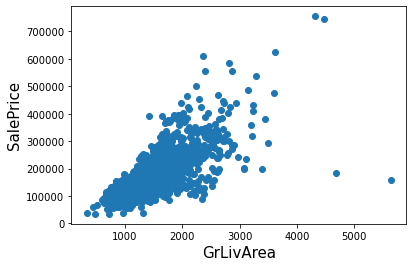

In [100]:
plt.scatter(x = df_house['GrLivArea'], y = df_house['SalePrice'])
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

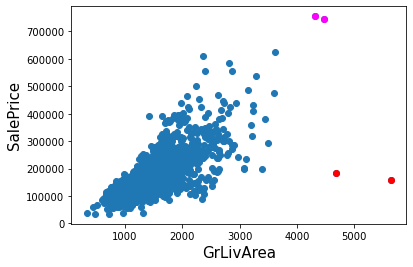

In [116]:
plt.scatter(x = df_house['GrLivArea'], y = df_house['SalePrice'])
plt.scatter(x = df_house.loc[(df_house['GrLivArea']>4000)&(df_house['SalePrice']>700000),'GrLivArea'], y=df_house.loc[(df_house['SalePrice']>700000)&(df_house['GrLivArea']>4000),'SalePrice'],c='magenta')
plt.scatter(x = df_house.loc[(df_house['GrLivArea']>4000)&(df_house['SalePrice']<200000),'GrLivArea'], y=df_house.loc[(df_house['SalePrice']<200000)&(df_house['GrLivArea']>4000),'SalePrice'],c='red')
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [109]:
df_house.loc[(df_house['GrLivArea']>4000)&(df_house['SalePrice']>700000),'GrLivArea']

691     4316
1182    4476
Name: GrLivArea, dtype: int64

In [113]:
df_house.loc[(df_house['SalePrice']>700000)&(df_house['GrLivArea']>4000),'SalePrice']

691     755000
1182    745000
Name: SalePrice, dtype: int64

In [119]:
df_house.loc[(df_house['GrLivArea']>4000)&(df_house['SalePrice']<200000),'GrLivArea']

523     184750
1298    184750
Name: GrLivArea, dtype: int64

In [120]:
idx_outlier_grlivarea1 = df_house.loc[(df_house['GrLivArea']>4000)&(df_house['SalePrice']>700000),'GrLivArea'].index
idx_outlier_grlivarea2 = df_house.loc[(df_house['GrLivArea']>4000)&(df_house['SalePrice']<200000),'GrLivArea'].index

In [936]:
# abs std test
SalePrice_tmp = (df_house['SalePrice'] - df_house['SalePrice'].mean())/df_house['SalePrice'].std()

In [942]:
SalePrice_tmp[SalePrice_tmp > 3]

58      3.245854
178     4.039598
185     3.701782
349     3.225387
389     3.084983
440     4.708799
473     3.261212
496     3.135334
527     3.340023
591     3.411635
664     3.047220
691     7.226343
769     4.494808
798     3.827659
803     5.060412
898     5.421982
1046    4.728701
1142    3.070759
1169    5.589940
1182    7.100466
1243    3.575905
1373    3.594786
Name: SalePrice, dtype: float64

In [943]:
idx_abs_lrg3 = SalePrice_tmp[SalePrice_tmp > 3].index

In [944]:
df_house.loc[idx_abs_lrg3,'GrLivArea']

58      2945
178     2234
185     3608
349     2728
389     2332
440     2402
473     1976
496     3228
527     2713
591     2296
664     2097
691     4316
769     3279
798     3140
803     2822
898     2364
1046    2868
1142    2828
1169    3627
1182    4476
1243    2076
1373    2633
Name: GrLivArea, dtype: int64

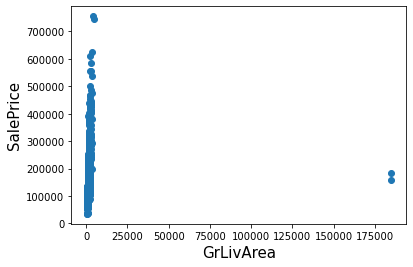

In [948]:
plt.scatter(x = df_house['GrLivArea'], y = df_house['SalePrice'])
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

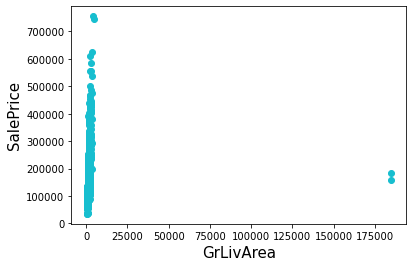

In [952]:
plt.scatter(x = df_house['GrLivArea'], y = df_house['SalePrice'])
#plt.scatter(x = df_house.loc[idx_abs_lrg3,'GrLivArea'], y = df_house.loc[idx_abs_lrg3,'SalePrice'],color = 'cyan')
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [950]:
df_house['GrLivArea']

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

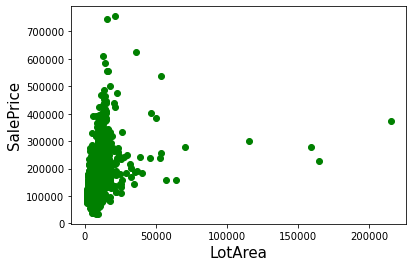

In [951]:
plt.scatter(x = df_house['LotArea'], y = df_house['SalePrice'], color='green')
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('LotArea', fontsize=15)
plt.show()

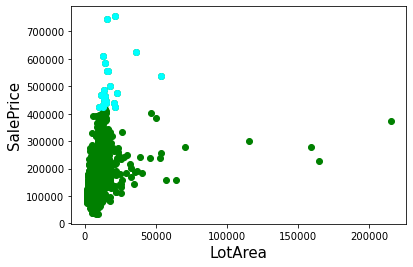

In [953]:
plt.scatter(x = df_house['LotArea'], y = df_house['SalePrice'], color='green')
plt.scatter(x = df_house.loc[idx_abs_lrg3,'LotArea'], y = df_house.loc[idx_abs_lrg3,'SalePrice'], color = 'cyan')
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('LotArea', fontsize=15)
plt.show()

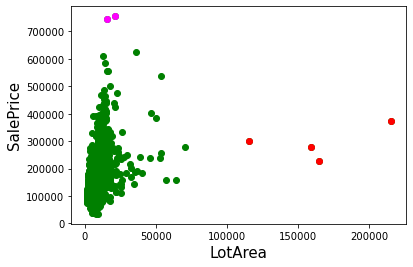

In [123]:
plt.scatter(x = df_house['LotArea'], y = df_house['SalePrice'], color='green')
plt.scatter(x = df_house.loc[df_house['SalePrice']>700000,'LotArea'], y = df_house.loc[df_house['SalePrice']>700000,'SalePrice'], color='magenta')
plt.scatter(x = df_house.loc[df_house['LotArea']>100000,'LotArea'], y = df_house.loc[df_house['LotArea']>100000,'SalePrice'], color='red')
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('LotArea', fontsize=15)
plt.show()

In [124]:
df_house.loc[df_house['SalePrice']>700000,'LotArea']

691     21535
1182    15623
Name: LotArea, dtype: int64

In [125]:
df_house.loc[df_house['LotArea']>100000,'LotArea']

249    159000
313    215245
335    164660
706    115149
Name: LotArea, dtype: int64

In [126]:
idx_outlier_lotarea = df_house.loc[df_house['LotArea']>100000,'LotArea'].index

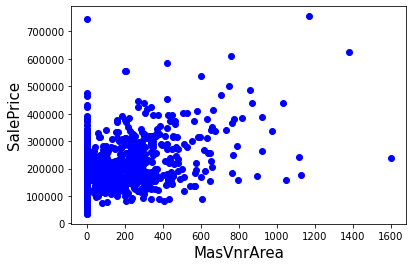

In [127]:
plt.scatter(x = df_house['MasVnrArea'], y = df_house['SalePrice'], color='blue')
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('MasVnrArea', fontsize=15)
plt.show()

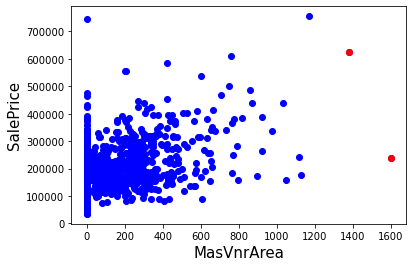

In [128]:
plt.scatter(x = df_house['MasVnrArea'], y = df_house['SalePrice'], color='blue')
plt.scatter(x = df_house.loc[df_house['MasVnrArea']>1200,'MasVnrArea'], y = df_house.loc[df_house['MasVnrArea']>1200,'SalePrice'], color='red')
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('MasVnrArea', fontsize=15)
plt.show()

In [129]:
idx_outlier_masvnrarea = df_house.loc[df_house['MasVnrArea']>1200,'MasVnrArea'].index

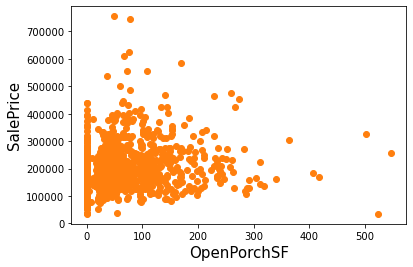

In [130]:
plt.scatter(x = df_house['OpenPorchSF'], y = df_house['SalePrice'], color='C1')
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('OpenPorchSF', fontsize=15)
plt.show()

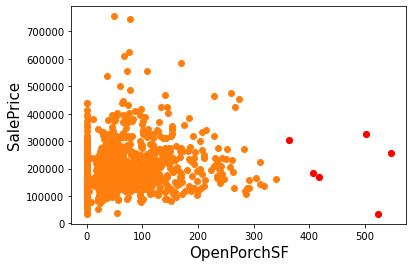

In [132]:
plt.scatter(x = df_house['OpenPorchSF'], y = df_house['SalePrice'], color='C1')
plt.scatter(x = df_house.loc[df_house['OpenPorchSF']>350,'OpenPorchSF'], y = df_house.loc[df_house['OpenPorchSF']>350,'SalePrice'], color='red')
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('OpenPorchSF', fontsize=15)
plt.show()

In [133]:
idx_outlier_openporchsf = df_house.loc[df_house['OpenPorchSF']>350,'OpenPorchSF'].index

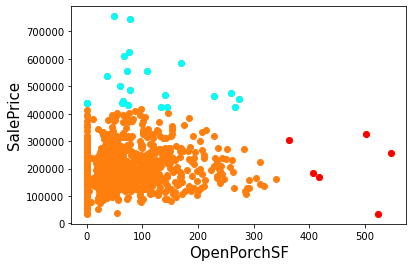

In [954]:
plt.scatter(x = df_house['OpenPorchSF'], y = df_house['SalePrice'], color='C1')
plt.scatter(x = df_house.loc[df_house['OpenPorchSF']>350,'OpenPorchSF'], y = df_house.loc[df_house['OpenPorchSF']>350,'SalePrice'], color='red')


plt.scatter(x = df_house.loc[idx_abs_lrg3,'OpenPorchSF'], y = df_house.loc[idx_abs_lrg3,'SalePrice'], color = 'cyan')

plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('OpenPorchSF', fontsize=15)
plt.show()

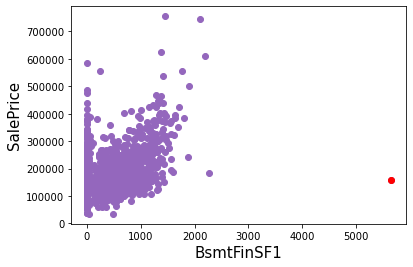

In [139]:
plt.scatter(x = df_house['BsmtFinSF1'], y = df_house['SalePrice'], color='C4')
plt.scatter(x = df_house.loc[df_house['BsmtFinSF1']>3000,'BsmtFinSF1'], y = df_house.loc[df_house['BsmtFinSF1']>3000,'SalePrice'], color='red')
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('BsmtFinSF1', fontsize=15)
plt.show()

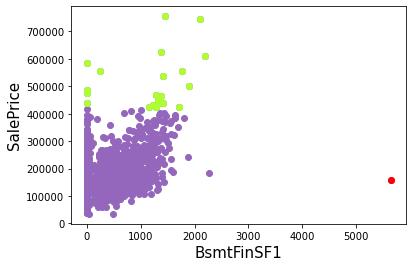

In [955]:
plt.scatter(x = df_house['BsmtFinSF1'], y = df_house['SalePrice'], color='C4')
plt.scatter(x = df_house.loc[df_house['BsmtFinSF1']>3000,'BsmtFinSF1'], y = df_house.loc[df_house['BsmtFinSF1']>3000,'SalePrice'], color='red')

plt.scatter(x = df_house.loc[idx_abs_lrg3,'BsmtFinSF1'], y = df_house.loc[idx_abs_lrg3,'SalePrice'], color = 'greenyellow')

plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('BsmtFinSF1', fontsize=15)
plt.show()

In [140]:
idx_outlier_bsmtfinsf1 = df_house.loc[df_house['BsmtFinSF1']>3000,'BsmtFinSF1'].index

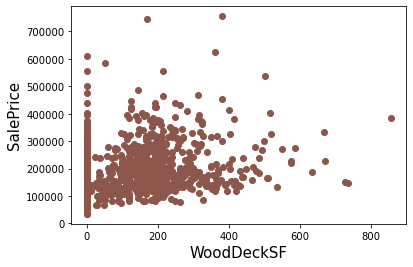

In [141]:
plt.scatter(x = df_house['WoodDeckSF'], y = df_house['SalePrice'], color='C5')
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('WoodDeckSF', fontsize=15)
plt.show()

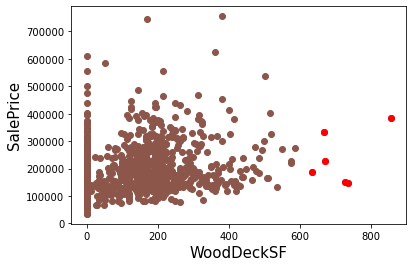

In [143]:
plt.scatter(x = df_house['WoodDeckSF'], y = df_house['SalePrice'], color='C5')
plt.scatter(x = df_house.loc[df_house['WoodDeckSF']>600,'WoodDeckSF'], y = df_house.loc[df_house['WoodDeckSF']>600,'SalePrice'], color='red')
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('WoodDeckSF', fontsize=15)
plt.show()

In [146]:
idx_outlier_wooddecksf = df_house.loc[df_house['WoodDeckSF']>600,'WoodDeckSF'].index

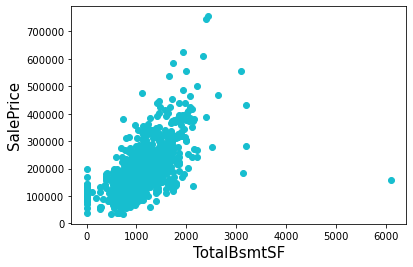

In [144]:
plt.scatter(x = df_house['TotalBsmtSF'], y = df_house['SalePrice'], color='C9')
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('TotalBsmtSF', fontsize=15)
plt.show()

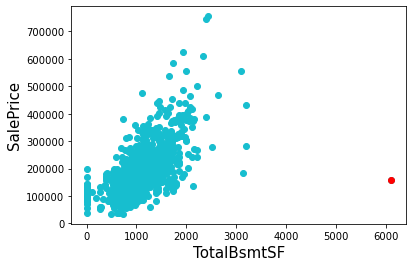

In [145]:
plt.scatter(x = df_house['TotalBsmtSF'], y = df_house['SalePrice'], color='C9')
plt.scatter(x = df_house.loc[df_house['TotalBsmtSF']>5000,'TotalBsmtSF'], y = df_house.loc[df_house['TotalBsmtSF']>5000,'SalePrice'], color='red')
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('TotalBsmtSF', fontsize=15)
plt.show()

In [147]:
idx_outlier_totalbsmtsf = df_house.loc[df_house['TotalBsmtSF']>5000,'TotalBsmtSF'].index

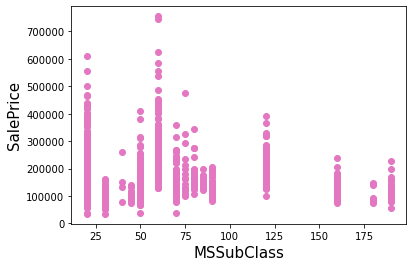

In [148]:
plt.scatter(x = df_house['MSSubClass'], y = df_house['SalePrice'], color='C6')
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('MSSubClass', fontsize=15)
plt.show()

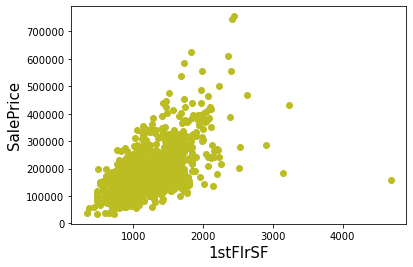

In [149]:
plt.scatter(x = df_house['1stFlrSF'], y = df_house['SalePrice'], color='C8')
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('1stFlrSF', fontsize=15)
plt.show()

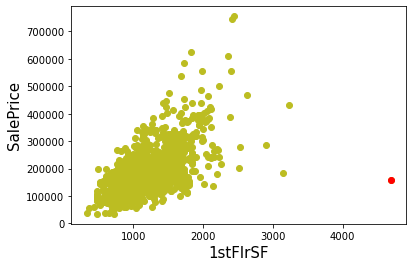

In [153]:
plt.scatter(x = df_house['1stFlrSF'], y = df_house['SalePrice'], color='C8')
plt.scatter(x = df_house.loc[df_house['1stFlrSF']>4000,'1stFlrSF'], y = df_house.loc[df_house['1stFlrSF']>4000,'SalePrice'], color='red')
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('1stFlrSF', fontsize=15)
plt.show()

In [154]:
idx_outlier_1stflrsf = df_house.loc[df_house['1stFlrSF']>4000,'1stFlrSF'].index

In [ ]:
idx_outlier_grlivarea1
idx_outlier_grlivarea2
idx_outlier_lotarea
idx_outlier_masvnrarea 
idx_outlier_openporchsf
idx_outlier_bsmtfinsf1
idx_outlier_wooddecksf
idx_outlier_totalbsmtsf
idx_outlier_1stflrsf

In [160]:
len(idx_outlier_grlivarea1),len(idx_outlier_grlivarea2),len(idx_outlier_lotarea),len(idx_outlier_masvnrarea),len(idx_outlier_openporchsf)

(2, 2, 4, 2, 6)

In [162]:
len(idx_outlier_bsmtfinsf1),len(idx_outlier_wooddecksf),len(idx_outlier_totalbsmtsf),len(idx_outlier_1stflrsf)

(1, 6, 1, 1)

In [163]:
2+2+4+2+6+3+6

25

In [171]:
idx_bag = []
for idx_outlier in [idx_outlier_grlivarea1,idx_outlier_grlivarea2,idx_outlier_lotarea,idx_outlier_masvnrarea,idx_outlier_openporchsf,idx_outlier_bsmtfinsf1,idx_outlier_wooddecksf,idx_outlier_totalbsmtsf,idx_outlier_1stflrsf]:
    for j in range(len(idx_outlier)):
        idx_bag.append(idx_outlier[j])

In [172]:
idx_bag

[691,
 1182,
 523,
 1298,
 249,
 313,
 335,
 706,
 297,
 1169,
 495,
 523,
 583,
 854,
 875,
 1328,
 1298,
 53,
 335,
 1068,
 1210,
 1313,
 1459,
 1298,
 1298]

In [182]:
idx_outlier_total_set = set(idx_bag)

In [186]:
idx_outlier_total_lst = list(sorted(idx_outlier_total_set))

In [187]:
idx_outlier_total_lst

[53,
 249,
 297,
 313,
 335,
 495,
 523,
 583,
 691,
 706,
 854,
 875,
 1068,
 1169,
 1182,
 1210,
 1298,
 1313,
 1328,
 1459]

In [189]:
len(idx_outlier_total_lst)

20

In [188]:
df_house.loc[df_house.index.isin(idx_outlier_total_lst)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Foundation_,BsmtQual_,BsmtCond_,BsmtExposure_,BsmtFinType1_,HeatingQC_,KitchenQual_,FireplaceQu_,GarageType_,GarageFinish_
53,54,20,RL,68.000000,50271,Pave,NaN,IR1,Low,AllPub,...,634,5,3,134,418,4,4,4,870,352
249,250,50,RL,70.049958,159000,Pave,NaN,IR2,Low,AllPub,...,634,4,3,134,133,4,4,3,870,352
297,298,60,FV,66.000000,7399,Pave,Pave,IR1,Lvl,AllPub,...,647,4,3,953,148,5,4,3,387,422
313,314,20,RL,150.000000,215245,Pave,NaN,IR3,Low,AllPub,...,634,4,3,134,220,3,3,4,870,422
335,336,190,RL,70.049958,164660,Grvl,NaN,IR1,HLS,AllPub,...,634,3,3,134,220,5,3,4,870,352
495,496,30,C (all),60.000000,7879,Pave,NaN,Reg,Lvl,AllPub,...,634,3,3,953,133,3,3,0,0,0
523,524,60,RL,130.000000,40094,Pave,NaN,IR1,Bnk,AllPub,...,647,5,3,134,418,5,5,4,88,352
583,584,75,RM,75.000000,13500,Pave,NaN,Reg,Lvl,AllPub,...,146,3,3,953,430,4,4,4,387,605
691,692,60,RL,104.000000,21535,Pave,NaN,IR1,Lvl,AllPub,...,647,5,3,134,418,5,5,5,870,352
706,707,20,RL,70.049958,115149,Pave,NaN,IR2,Low,AllPub,...,634,4,3,134,418,3,4,3,870,605


In [190]:
df_house.loc[~df_house.index.isin(idx_outlier_total_lst)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Foundation_,BsmtQual_,BsmtCond_,BsmtExposure_,BsmtFinType1_,HeatingQC_,KitchenQual_,FireplaceQu_,GarageType_,GarageFinish_
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,647,4,3,953,418,5,4,0,870,422
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,634,4,3,134,220,5,3,3,870,422
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,647,4,3,114,418,5,4,3,870,422
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,146,3,4,953,220,4,4,4,387,605
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,647,4,3,221,418,5,4,3,870,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,647,4,3,953,418,5,4,0,870,422
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,647,4,3,953,430,5,3,3,870,422
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,634,4,3,953,220,3,3,3,870,605
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,6,3,4,953,418,5,4,4,870,422


In [196]:
df_house_wool = df_house.loc[~df_house.index.isin(idx_outlier_total_lst)]

In [935]:
df_house_wool.to_csv('C:/Users/thsong/df_house_wool_tmp2.csv',index=False)

In [197]:
df_house_extracted_wool = df_house_wool[['MSSubClass','MSZoning_','LotFrontage','LotArea','LotShape_','LotConfig_','Neighborhood_',
          'HouseStyle_','OverallQual','OverallCond','RoofStyle_','MasVnrType_','MasVnrArea','ExterQual_','Foundation_','BsmtQual_',
          'BsmtExposure_','BsmtFinType1_','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','HeatingQC_','1stFlrSF','2ndFlrSF',
          'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenQual_','TotRmsAbvGrd','Fireplaces','FireplaceQu_',
          'GarageType_','House_Age','Garage_Age','GarageFinish_','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Exterior_Avg',
          'SalePrice']]

In [933]:
df_house_extracted_wool.to_csv('C:/Users/thsong/df_house_extracted_wool_tmp.csv',index=False)

In [198]:
# list up the columns to be standardized
col_lst = ['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg']

In [199]:
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted_wool[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted_wool[new_col] = scaled_data_tst

C:\Users\thsong\AppData\Local\Temp/ipykernel_12108/1310303135.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_extracted_wool[new_col] = scaled_data_tst
C:\Users\thsong\AppData\Local\Temp/ipykernel_12108/1310303135.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_extracted_wool[new_col] = scaled_data_tst
C:\Users\thsong\AppData\Local\Temp/ipykernel_12108/1310303135.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [200]:
df_house_extracted_wool.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled

In [201]:
df_house_extracted_wool[['SalePrice']]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1454,185000
1455,175000
1456,210000
1457,266500


In [202]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

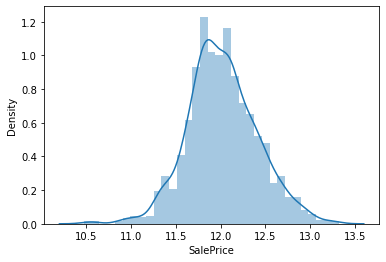

In [203]:
log_SalePrice = np.log1p(df_house_extracted_wool['SalePrice'])
sns.distplot(log_SalePrice)

In [204]:
df_house_extracted_wool['SalePrice(log)'] = log_SalePrice

C:\Users\thsong\AppData\Local\Temp/ipykernel_12108/3047427492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_extracted_wool['SalePrice(log)'] = log_SalePrice


In [212]:
from scipy import stats

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


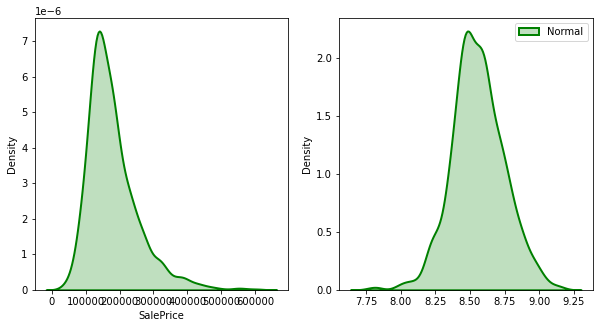

In [218]:
original_data = df_house_extracted_wool['SalePrice']
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

### Modeling & Evaluating

In [418]:
# extract train data columns to be plugged in regression models
X = df_house_extracted_wool[['MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)']]
y = df_house_extracted_wool['SalePrice(log)']

In [419]:
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [210]:
### define a fuction for printing RMSLE values of each regression model
# y : log-scaled
# therefore we will get rmse values
def print_rmse_values(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    ### print and return RMSLE values of each model
    print('#'*5, model.__class__.__name__,'#'*5)
    
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, "log-transformed model's RMSE : ", np.round(rmse,4))
    
    return rmse

In [420]:
### Print RMSLE values using the user-defined function above
dict_rmse = {}
for model in [line_fitter,ridge_fitter,lasso_fitter,elasticNet_fitter,xgb_fitter,gbm_fitter,rf_fitter,lgbm_fitter,bg_fitter,et_fitter]:
    rmse_value = print_rmse_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmse[str(model)] = rmse_value
### Sort RMSLE values with ascending order
{k: v for k, v in sorted(dict_rmse.items(), key=lambda item: item[1])}

##### LinearRegression #####
LinearRegression log-transformed model's RMSE :  0.1279
##### Ridge #####
Ridge log-transformed model's RMSE :  0.1264
##### Lasso #####
Lasso log-transformed model's RMSE :  0.1271
##### ElasticNet #####
ElasticNet log-transformed model's RMSE :  0.1278
##### XGBRegressor #####
XGBRegressor log-transformed model's RMSE :  0.144
##### GradientBoostingRegressor #####
GradientBoostingRegressor log-transformed model's RMSE :  0.1276
##### RandomForestRegressor #####
RandomForestRegressor log-transformed model's RMSE :  0.1349
##### LGBMRegressor #####
LGBMRegressor log-transformed model's RMSE :  0.1294
##### BaggingRegressor #####
BaggingRegressor log-transformed model's RMSE :  0.1367
##### ExtraTreesRegressor #####
ExtraTreesRegressor log-transformed model's RMSE :  0.1347


{'Ridge(alpha=222)': 0.12641886798918972,
 'Lasso(alpha=0.0078)': 0.12711560976806677,
 'GradientBoostingRegressor(n_estimators=1270)': 0.127607360769352,
 'ElasticNet(alpha=0.0033, l1_ratio=0.001)': 0.12784198980678818,
 'LinearRegression()': 0.1278932027662017,
 'LGBMRegressor(n_estimators=60)': 0.12940915126295016,
 'ExtraTreesRegressor(n_estimators=91)': 0.1346821953681236,
 'RandomForestRegressor(n_estimators=628)': 0.1348907796904742,
 'BaggingRegressor(n_estimators=607)': 0.1367232941584553,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_wei

In [211]:
### Print RMSLE values using the user-defined function above
dict_rmse = {}
for model in [line_fitter,ridge_fitter,lasso_fitter,elasticNet_fitter,xgb_fitter,gbm_fitter,rf_fitter,lgbm_fitter,bg_fitter,et_fitter]:
    rmse_value = print_rmse_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmse[str(model)] = rmse_value
### Sort RMSLE values with ascending order
{k: v for k, v in sorted(dict_rmse.items(), key=lambda item: item[1])}

##### LinearRegression #####
LinearRegression log-transformed model's RMSE :  0.1279
##### Ridge #####
Ridge log-transformed model's RMSE :  0.1264
##### Lasso #####
Lasso log-transformed model's RMSE :  0.1271
##### ElasticNet #####
ElasticNet log-transformed model's RMSE :  0.1266
##### XGBRegressor #####
XGBRegressor log-transformed model's RMSE :  0.144
##### GradientBoostingRegressor #####
GradientBoostingRegressor log-transformed model's RMSE :  0.1282
##### RandomForestRegressor #####
RandomForestRegressor log-transformed model's RMSE :  0.1362
##### LGBMRegressor #####
LGBMRegressor log-transformed model's RMSE :  0.1294
##### BaggingRegressor #####
BaggingRegressor log-transformed model's RMSE :  0.1364
##### ExtraTreesRegressor #####
ExtraTreesRegressor log-transformed model's RMSE :  0.1344


{'Ridge(alpha=222)': 0.12641886798918972,
 'ElasticNet(alpha=0.029, l1_ratio=0.22)': 0.1265547943015483,
 'Lasso(alpha=0.0078)': 0.12711560976806677,
 'LinearRegression()': 0.1278932027662017,
 'GradientBoostingRegressor(n_estimators=1270)': 0.1281852558994308,
 'LGBMRegressor(n_estimators=60)': 0.12940915126295016,
 'ExtraTreesRegressor(n_estimators=91)': 0.13436589181629663,
 'RandomForestRegressor(n_estimators=628)': 0.13624681478787665,
 'BaggingRegressor(n_estimators=607)': 0.13642281750362026,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_we

In [219]:
def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X, y) # the same result as .fit(X_train,y_train)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('when {0} is taken with cv = 5 the best avg rmse value is : {1}, and the best hyper-parameter is : {2}'.format(model.__class__.__name__, np.round(rmse,4), grid_model.best_params_))

In [220]:
ridge_fitter_tst = Ridge()

In [227]:
ridge_params2 = {'alpha':[50.5,50.6,50.7,50.8,50.9,51,51.1,51.2,51.3,51.4,51.5]}

In [228]:
# an example of printing best parameters using the user-defined function above
print_best_params(ridge_fitter_tst,ridge_params2)

when Ridge is taken with cv = 5 the best avg rmse value is : 0.126, and the best hyper-parameter is : {'alpha': 50.9}


In [421]:
# y <- log only, train_test_split done
ridge_params2 = {'alpha':[50.5,50.6,50.7,50.8,50.9,51,51.1,51.2,51.3,51.4,51.5]}
print_best_params(ridge_fitter_tst,ridge_params2)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.126, and the best parameter is : {'alpha': 50.9}


In [229]:
lasso_fitter_tst = Lasso()

In [253]:
lasso_params2 = {'alpha':[0.0002,0.0021,0.0022,0.0023,0.0024,0.0025,0.0026,0.0027,0.0028,0.0029,0.0003,0.0031,0.0032,0.0033,0.0034]}

In [254]:
# an example of printing best parameters using the user-defined function above
print_best_params(lasso_fitter_tst,lasso_params2)

when Lasso is taken with cv = 5 the best avg rmse value is : 0.126, and the best hyper-parameter is : {'alpha': 0.0021}


In [288]:
elasticNet_fitter_tst = ElasticNet() # alpha = 0.029, l1_ratio=0.22
eln_params2 = {'alpha':[0.0025,0.0026,0.0027,0.0028,0.0029,0.003,0.0031,0.0032,0.0033,0.0034]}
l1_ratio_params = {'l1_ratio':[0.00000000001,0.0000000001,0.0000001]} # just 0.0001, not zero

In [308]:
# an example of printing best parameters using the user-defined function above
print_best_params(elasticNet_fitter_tst,eln_params2)

when ElasticNet is taken with cv = 5 the best avg rmse value is : 0.126, and the best hyper-parameter is : {'alpha': 0.0033}


In [289]:
# an example of printing best parameters using the user-defined function above
print_best_params(elasticNet_fitter_tst,l1_ratio_params)

when ElasticNet is taken with cv = 5 the best avg rmse value is : 0.1372, and the best hyper-parameter is : {'l1_ratio': 1e-11}


In [348]:
eln_params2 = {'alpha':[0.0034,0.0035,0.1,0.5,1],
              'l1_ratio':[0.1,0.2,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.4]}

In [349]:
# an example of printing best parameters using the user-defined function above
print_best_params(elasticNet_fitter_tst,eln_params2)

when ElasticNet is taken with cv = 5 the best avg rmse value is : 0.126, and the best hyper-parameter is : {'alpha': 0.0035, 'l1_ratio': 0.26}


In [296]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}

In [297]:
print_best_params(xgb_fitter,candidate_params)

when XGBRegressor is taken with cv = 5 the best avg rmse value is : 0.1362, and the best hyper-parameter is : {'n_estimators': 162}


In [298]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}

In [299]:
print_best_params(gbm_fitter,candidate_params)

when GradientBoostingRegressor is taken with cv = 5 the best avg rmse value is : 0.1235, and the best hyper-parameter is : {'n_estimators': 155}


In [300]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}

In [301]:
print_best_params(rf_fitter,candidate_params)

when RandomForestRegressor is taken with cv = 5 the best avg rmse value is : 0.1374, and the best hyper-parameter is : {'n_estimators': 163}


In [302]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}

In [303]:
print_best_params(lgbm_fitter,candidate_params)

when LGBMRegressor is taken with cv = 5 the best avg rmse value is : 0.1288, and the best hyper-parameter is : {'n_estimators': 153}


In [304]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}

In [305]:
print_best_params(bg_fitter,candidate_params)

when BaggingRegressor is taken with cv = 5 the best avg rmse value is : 0.1373, and the best hyper-parameter is : {'n_estimators': 155}


In [306]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}

In [307]:
print_best_params(et_fitter,candidate_params)

when ExtraTreesRegressor is taken with cv = 5 the best avg rmse value is : 0.1335, and the best hyper-parameter is : {'n_estimators': 159}


In [350]:
# ordinary linear regression model
line_fitter2 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter2 = Ridge(alpha=50.9)
lasso_fitter2 = Lasso(alpha=0.0021)
elasticNet_fitter2 = ElasticNet(alpha = 0.0035, l1_ratio=0.26)
# ensemble models
xgb_fitter2 = XGBRegressor(n_estimators=162)
gbm_fitter2 = GradientBoostingRegressor(n_estimators=155)
rf_fitter2 = RandomForestRegressor(n_estimators=163)
lgbm_fitter2 = LGBMRegressor(n_estimators=153)
bg_fitter2 = BaggingRegressor(n_estimators=155)
et_fitter2 = ExtraTreesRegressor(n_estimators=159)

In [351]:
### Print RMSLE values using the user-defined function above
dict_rmse = {}
for model in [line_fitter2,ridge_fitter2,lasso_fitter2,elasticNet_fitter2,xgb_fitter2,gbm_fitter2,rf_fitter2,lgbm_fitter2,bg_fitter2,et_fitter2]:
    rmse_value = print_rmse_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmse[str(model)] = rmse_value
### Sort RMSLE values with ascending order
{k: v for k, v in sorted(dict_rmse.items(), key=lambda item: item[1])}

##### LinearRegression #####
LinearRegression log-transformed model's RMSE :  0.1279
##### Ridge #####
Ridge log-transformed model's RMSE :  0.127
##### Lasso #####
Lasso log-transformed model's RMSE :  0.1275
##### ElasticNet #####
ElasticNet log-transformed model's RMSE :  0.1276
##### XGBRegressor #####
XGBRegressor log-transformed model's RMSE :  0.144
##### GradientBoostingRegressor #####
GradientBoostingRegressor log-transformed model's RMSE :  0.126
##### RandomForestRegressor #####
RandomForestRegressor log-transformed model's RMSE :  0.1348
##### LGBMRegressor #####
LGBMRegressor log-transformed model's RMSE :  0.1309
##### BaggingRegressor #####
BaggingRegressor log-transformed model's RMSE :  0.1371
##### ExtraTreesRegressor #####
ExtraTreesRegressor log-transformed model's RMSE :  0.1343


{'GradientBoostingRegressor(n_estimators=155)': 0.12599002608945145,
 'Ridge(alpha=50.9)': 0.1269554196836681,
 'Lasso(alpha=0.0021)': 0.12754676564251055,
 'ElasticNet(alpha=0.0035, l1_ratio=0.26)': 0.1275984171610924,
 'LinearRegression()': 0.1278932027662017,
 'LGBMRegressor(n_estimators=153)': 0.13089271463301158,
 'ExtraTreesRegressor(n_estimators=159)': 0.13429694164592507,
 'RandomForestRegressor(n_estimators=163)': 0.13482556371536836,
 'BaggingRegressor(n_estimators=155)': 0.1371012431756961,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_

In [422]:
### Print RMSLE values using the user-defined function above
dict_rmse = {}
for model in [line_fitter2,ridge_fitter2,lasso_fitter2,elasticNet_fitter2,xgb_fitter2,gbm_fitter2,rf_fitter2,lgbm_fitter2,bg_fitter2,et_fitter2]:
    rmse_value = print_rmse_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmse[str(model)] = rmse_value
### Sort RMSLE values with ascending order
{k: v for k, v in sorted(dict_rmse.items(), key=lambda item: item[1])}

##### LinearRegression #####
LinearRegression log-transformed model's RMSE :  0.1279
##### Ridge #####
Ridge log-transformed model's RMSE :  0.127
##### Lasso #####
Lasso log-transformed model's RMSE :  0.1275
##### ElasticNet #####
ElasticNet log-transformed model's RMSE :  0.1276
##### XGBRegressor #####
XGBRegressor log-transformed model's RMSE :  0.144
##### GradientBoostingRegressor #####
GradientBoostingRegressor log-transformed model's RMSE :  0.1257
##### RandomForestRegressor #####
RandomForestRegressor log-transformed model's RMSE :  0.1337
##### LGBMRegressor #####
LGBMRegressor log-transformed model's RMSE :  0.1309
##### BaggingRegressor #####
BaggingRegressor log-transformed model's RMSE :  0.1375
##### ExtraTreesRegressor #####
ExtraTreesRegressor log-transformed model's RMSE :  0.1337


{'GradientBoostingRegressor(n_estimators=155)': 0.125733814508681,
 'Ridge(alpha=50.9)': 0.1269554196836681,
 'Lasso(alpha=0.0021)': 0.12754676564251055,
 'ElasticNet(alpha=0.0035, l1_ratio=0.26)': 0.1275984171610924,
 'LinearRegression()': 0.1278932027662017,
 'LGBMRegressor(n_estimators=153)': 0.13089271463301158,
 'RandomForestRegressor(n_estimators=163)': 0.1337068922396421,
 'ExtraTreesRegressor(n_estimators=159)': 0.1337203029856334,
 'BaggingRegressor(n_estimators=155)': 0.1374551107358579,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weig

<AxesSubplot:>

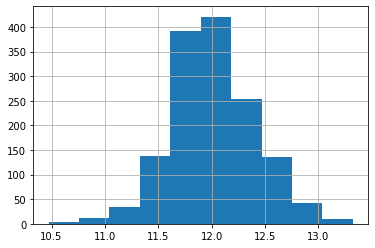

In [313]:
y.hist()

<AxesSubplot:>

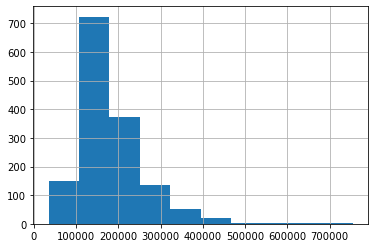

In [554]:
df_house['SalePrice'].hist()

In [317]:
array_tst = df_house_extracted2['SalePrice'].values.reshape(-1,1)
scaled_data_tst = scaler.fit_transform(array_tst) 

In [318]:
scaled_data_tst

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [319]:
df_house_extracted2.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled

array([[<AxesSubplot:title={'center':'MSSubClass'}>]], dtype=object)

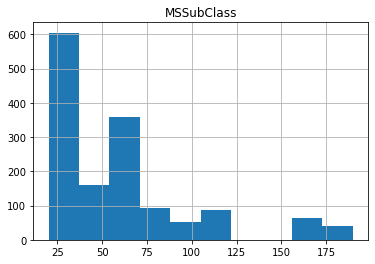

In [327]:
df_house_extracted2[['MSSubClass']].hist()

array([[<AxesSubplot:title={'center':'MSSubClass(scaled)'}>]],
      dtype=object)

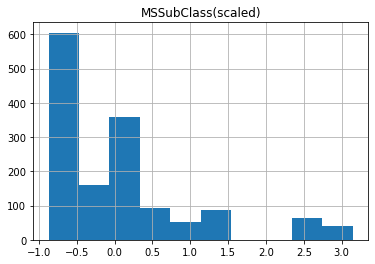

In [325]:
df_house_extracted2[['MSSubClass(scaled)']].hist()

array([[<AxesSubplot:title={'center':'MSZoning_'}>]], dtype=object)

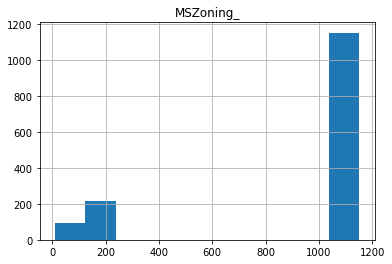

In [326]:
df_house_extracted2[['MSZoning_']].hist()

array([[<AxesSubplot:title={'center':'MSZoning_(scaled)'}>]], dtype=object)

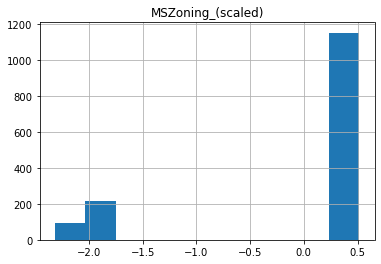

In [330]:
df_house_extracted2[['MSZoning_(scaled)']].hist()

In [332]:
#sns.pairplot(data=df_house_extracted2, diag_kind='kde')

In [356]:
df_house_extracted2.columns[43:]

Index(['MSSubClass(scaled)', 'MSZoning_(scaled)', 'LotFrontage(scaled)',
       'LotArea(scaled)', 'LotShape_(scaled)', 'LotConfig_(scaled)',
       'Neighborhood_(scaled)', 'HouseStyle_(scaled)', 'OverallQual(scaled)',
       'OverallCond(scaled)', 'RoofStyle_(scaled)', 'MasVnrType_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)',
       'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)',
       'HeatingQC_(scaled)', '1stFlrSF(scaled)', '2ndFlrSF(scaled)',
       'GrLivArea(scaled)', 'BsmtFullBath(scaled)', 'FullBath(scaled)',
       'HalfBath(scaled)', 'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)',
       'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)', 'FireplaceQu_(scaled)',
       'GarageType_(scaled)', 'House_Age(scaled)', 'Garage_Age(scaled)',
       'GarageFinish_(scaled)', 'GarageCars(scaled)', 'GarageArea(scaled)',
       'WoodDeckSF(scaled)', 'OpenPorc

In [357]:
df_house_extracted2[df_house_extracted2.columns[43:]].iloc[0]

MSSubClass(scaled)       0.073375
MSZoning_(scaled)        0.516103
LotFrontage(scaled)     -0.229372
LotArea(scaled)         -0.207142
LotShape_(scaled)        0.719460
LotConfig_(scaled)       0.617969
Neighborhood_(scaled)    0.786876
HouseStyle_(scaled)     -0.299118
OverallQual(scaled)      0.651479
OverallCond(scaled)     -0.517200
RoofStyle_(scaled)       0.525725
MasVnrType_(scaled)      1.486540
MasVnrArea(scaled)       0.514104
ExterQual_(scaled)       1.052302
Foundation_(scaled)      0.409299
BsmtQual_(scaled)        0.583168
BsmtExposure_(scaled)    0.725717
BsmtFinType1_(scaled)    0.769535
BsmtFinSF1(scaled)       0.575425
BsmtUnfSF(scaled)       -0.944591
TotalBsmtSF(scaled)     -0.459303
HeatingQC_(scaled)       0.891179
1stFlrSF(scaled)        -0.793434
2ndFlrSF(scaled)         1.161852
GrLivArea(scaled)        0.370333
BsmtFullBath(scaled)     1.107810
FullBath(scaled)         0.789741
HalfBath(scaled)         1.227585
BedroomAbvGr(scaled)     0.163779
KitchenQual_(s

In [358]:
X.iloc[0]

MSSubClass(scaled)       0.074321
MSZoning_(scaled)        0.514224
LotFrontage(scaled)     -0.223185
LotArea(scaled)         -0.289666
LotShape_(scaled)        0.716325
LotConfig_(scaled)       0.614331
Neighborhood_(scaled)    0.776312
HouseStyle_(scaled)     -0.301831
OverallQual(scaled)      0.676016
OverallCond(scaled)     -0.518840
RoofStyle_(scaled)       0.522865
MasVnrType_(scaled)      1.481725
MasVnrArea(scaled)       0.566802
ExterQual_(scaled)       1.074002
Foundation_(scaled)      0.409759
BsmtQual_(scaled)        0.592590
BsmtExposure_(scaled)    0.720062
BsmtFinType1_(scaled)    0.768549
BsmtFinSF1(scaled)       0.635842
BsmtUnfSF(scaled)       -0.943828
TotalBsmtSF(scaled)     -0.464386
HeatingQC_(scaled)       0.892462
1stFlrSF(scaled)        -0.809152
2ndFlrSF(scaled)         1.202667
GrLivArea(scaled)        0.429431
BsmtFullBath(scaled)     1.128963
FullBath(scaled)         0.809818
HalfBath(scaled)         1.238364
BedroomAbvGr(scaled)     0.171519
KitchenQual_(s

In [359]:
y.iloc[0]

12.24769911637256

two cases to consider :
1. log transform and min max scaling
2. log transform and std scaling

In [368]:
# extract train data columns to be plugged in regression models
X = df_house_extracted_wool[['MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)']]
y = df_house_extracted_wool['SalePrice(log_stdz)']

In [361]:
df_house_extracted_wool['SalePrice(log)']

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1454    12.128117
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
Name: SalePrice(log), Length: 1440, dtype: float64

In [362]:
array_tst = df_house_extracted_wool['SalePrice(log)'].values.reshape(-1,1)
scaled_data_tst = scaler.fit_transform(array_tst)

In [365]:
df_house_extracted_wool['SalePrice(log_stdz)'] = scaled_data_tst

C:\Users\thsong\AppData\Local\Temp/ipykernel_12108/3108984572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_extracted_wool['SalePrice(log_stdz)'] = scaled_data_tst


In [366]:
df_house_extracted_wool['SalePrice(log_stdz)']

0       0.586971
1       0.232416
2       0.764582
3      -0.431304
4       1.051045
          ...   
1454    0.281247
1455    0.139179
1456    0.605297
1457    1.214445
1458   -0.392791
Name: SalePrice(log_stdz), Length: 1440, dtype: float64

<AxesSubplot:>

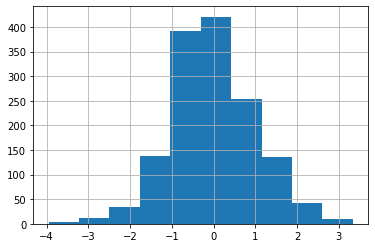

In [367]:
df_house_extracted_wool['SalePrice(log_stdz)'].hist()

In [397]:
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [369]:
ridge_params2 = {'alpha':[50.5,50.6,50.7,50.8,50.9,51,51.1,51.2,51.3,51.4,51.5]}
# an example of printing best parameters using the user-defined function above
print_best_params(ridge_fitter_tst,ridge_params2)

when Ridge is taken with cv = 5 the best avg rmse value is : 0.3223, and the best hyper-parameter is : {'alpha': 50.9}


In [376]:
lasso_params2 = {'alpha':[0.003,0.0035,0.0036,0.0037,0.0038,0.0039,0.004,0.0041,0.0042,0.0043,0.0044,0.005]}
# an example of printing best parameters using the user-defined function above
print_best_params(lasso_fitter_tst,lasso_params2)

when Lasso is taken with cv = 5 the best avg rmse value is : 0.3221, and the best hyper-parameter is : {'alpha': 0.0042}


In [385]:
eln_params2 = {'alpha':[0.02,0.021,0.022,0.023,0.024,0.025,0.026,0.027,0.028,0.029,0.03,0.031,0.032,0.033,0.034,0.035,0.04,0.05],
              'l1_ratio':[0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.3,0.4]}
# an example of printing best parameters using the user-defined function above
print_best_params(elasticNet_fitter_tst,eln_params2)

when ElasticNet is taken with cv = 5 the best avg rmse value is : 0.3217, and the best hyper-parameter is : {'alpha': 0.025, 'l1_ratio': 0.13}


In [386]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(xgb_fitter,candidate_params)

when XGBRegressor is taken with cv = 5 the best avg rmse value is : 0.3579, and the best hyper-parameter is : {'n_estimators': 159}


In [388]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(xgb_fitter2,candidate_params)

when XGBRegressor is taken with cv = 5 the best avg rmse value is : 0.3579, and the best hyper-parameter is : {'n_estimators': 159}


In [387]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(gbm_fitter,candidate_params)

when GradientBoostingRegressor is taken with cv = 5 the best avg rmse value is : 0.3161, and the best hyper-parameter is : {'n_estimators': 160}


In [410]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(gbm_fitter,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.3161, and the best parameter is : {'n_estimators': 158}


In [389]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(rf_fitter,candidate_params)

when RandomForestRegressor is taken with cv = 5 the best avg rmse value is : 0.351, and the best hyper-parameter is : {'n_estimators': 158}


In [412]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(rf_fitter,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.3516, and the best parameter is : {'n_estimators': 155}


In [390]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(lgbm_fitter,candidate_params)

when LGBMRegressor is taken with cv = 5 the best avg rmse value is : 0.3293, and the best hyper-parameter is : {'n_estimators': 155}


In [413]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(lgbm_fitter,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.3293, and the best parameter is : {'n_estimators': 155}


In [391]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(bg_fitter,candidate_params)

when BaggingRegressor is taken with cv = 5 the best avg rmse value is : 0.3509, and the best hyper-parameter is : {'n_estimators': 157}


In [414]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(bg_fitter,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.3508, and the best parameter is : {'n_estimators': 158}


In [392]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(et_fitter,candidate_params)

when ExtraTreesRegressor is taken with cv = 5 the best avg rmse value is : 0.3427, and the best hyper-parameter is : {'n_estimators': 161}


In [415]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(et_fitter,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.3413, and the best parameter is : {'n_estimators': 164}


In [416]:
# ordinary linear regression model
line_fitter3 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter3 = Ridge(alpha=50.9)
lasso_fitter3 = Lasso(alpha=0.0042)
elasticNet_fitter3 = ElasticNet(alpha = 0.025, l1_ratio=0.13)
# ensemble models
xgb_fitter3 = XGBRegressor(n_estimators=159)
gbm_fitter3 = GradientBoostingRegressor(n_estimators=158)
rf_fitter3 = RandomForestRegressor(n_estimators=155)
lgbm_fitter3 = LGBMRegressor(n_estimators=155)
bg_fitter3 = BaggingRegressor(n_estimators=158)
et_fitter3 = ExtraTreesRegressor(n_estimators=164)

In [417]:
### Print RMSLE values using the user-defined function above
dict_rmse = {}
for model in [line_fitter3,ridge_fitter3,lasso_fitter3,elasticNet_fitter3,xgb_fitter3,gbm_fitter3,rf_fitter3,lgbm_fitter3,bg_fitter3,et_fitter3]:
    rmse_value = print_rmse_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmse[str(model)] = rmse_value
### Sort RMSLE values with ascending order
{k: v for k, v in sorted(dict_rmse.items(), key=lambda item: item[1])}

##### LinearRegression #####
LinearRegression log-transformed model's RMSE :  0.327
##### Ridge #####
Ridge log-transformed model's RMSE :  0.3246
##### Lasso #####
Lasso log-transformed model's RMSE :  0.3264
##### ElasticNet #####
ElasticNet log-transformed model's RMSE :  0.3247
##### XGBRegressor #####
XGBRegressor log-transformed model's RMSE :  0.339
##### GradientBoostingRegressor #####
GradientBoostingRegressor log-transformed model's RMSE :  0.3229
##### RandomForestRegressor #####
RandomForestRegressor log-transformed model's RMSE :  0.3517
##### LGBMRegressor #####
LGBMRegressor log-transformed model's RMSE :  0.3349
##### BaggingRegressor #####
BaggingRegressor log-transformed model's RMSE :  0.3523
##### ExtraTreesRegressor #####
ExtraTreesRegressor log-transformed model's RMSE :  0.3405


{'GradientBoostingRegressor(n_estimators=158)': 0.3228737562084987,
 'Ridge(alpha=50.9)': 0.32457276522454825,
 'ElasticNet(alpha=0.025, l1_ratio=0.13)': 0.3247006244225844,
 'Lasso(alpha=0.0042)': 0.32639505959004617,
 'LinearRegression()': 0.32697029066329797,
 'LGBMRegressor(n_estimators=155)': 0.33492679790685936,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=159, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n            

In [395]:
from sklearn.preprocessing import MinMaxScaler

In [396]:
mmscaler = MinMaxScaler()

In [423]:
array_tst2 = df_house_extracted_wool['SalePrice(log)'].values.reshape(-1,1)
scaled_data_tst2 = mmscaler.fit_transform(array_tst2)

In [424]:
scaled_data_tst2

array([[0.62263388],
       [0.57400658],
       [0.64699337],
       ...,
       [0.62514741],
       [0.70869224],
       [0.48825923]])

In [425]:
df_house_extracted_wool['SalePrice(log_mm)'] = scaled_data_tst2

C:\Users\thsong\AppData\Local\Temp/ipykernel_12108/3593506896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_extracted_wool['SalePrice(log_mm)'] = scaled_data_tst2


<AxesSubplot:>

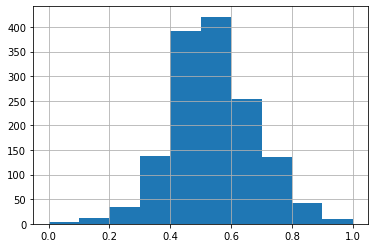

In [428]:
df_house_extracted_wool['SalePrice(log_mm)'].hist()

In [426]:
# extract train data columns to be plugged in regression models
X = df_house_extracted_wool[['MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)']]
y = df_house_extracted_wool['SalePrice(log_mm)']

In [427]:
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [429]:
ridge_params2 = {'alpha':[50.5,50.6,50.7,50.8,50.9,51,51.1,51.2,51.3,51.4,51.5]}
# an example of printing best parameters using the user-defined function above
print_best_params(ridge_fitter_tst,ridge_params2)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.0442, and the best parameter is : {'alpha': 50.9}


In [437]:
lasso_params2 = {'alpha':[0.0001,0.0002,0.0003,0.0004,0.0005,0.0009,0.001]}
# an example of printing best parameters using the user-defined function above
print_best_params(lasso_fitter_tst,lasso_params2)

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.0442, and the best parameter is : {'alpha': 0.0005}


In [449]:
eln_params2 = {'alpha':[0.00011,0.00012,0.00013,0.00014,0.00015,0.0003,0.0005,0.0009,0.001,0.002,0.003,0.004,0.005,0.01],
              'l1_ratio':[0.4,0.5,0.6,0.7,0.8,0.9,1]}
# an example of printing best parameters using the user-defined function above
print_best_params(elasticNet_fitter_tst,eln_params2)

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.0442, and the best parameter is : {'alpha': 0.001, 'l1_ratio': 0.6}


In [454]:
candidate_params = {'n_estimators' : [190,195,196,197,198,199,200,201,202]}
print_best_params(xgb_fitter,candidate_params)

when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.0484, and the best parameter is : {'n_estimators': 197}


In [458]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(gbm_fitter,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.0433, and the best parameter is : {'n_estimators': 161}


In [459]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(rf_fitter,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.0482, and the best parameter is : {'n_estimators': 153}


In [461]:
candidate_params = {'n_estimators' : [148,149,150,151,152,153,154]}
print_best_params(rf_fitter,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.0482, and the best parameter is : {'n_estimators': 151}


In [462]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(lgbm_fitter,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.0452, and the best parameter is : {'n_estimators': 153}


In [463]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(lgbm_fitter,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.0452, and the best parameter is : {'n_estimators': 153}


In [464]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(bg_fitter,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.0481, and the best parameter is : {'n_estimators': 161}


In [465]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(bg_fitter,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.048, and the best parameter is : {'n_estimators': 156}


In [466]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(et_fitter,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.0468, and the best parameter is : {'n_estimators': 156}


In [468]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(et_fitter,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.0469, and the best parameter is : {'n_estimators': 161}


In [471]:
# ordinary linear regression model
line_fitter4 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter4 = Ridge(alpha=50.9)
lasso_fitter4 = Lasso(alpha=0.0005)
elasticNet_fitter4 = ElasticNet(alpha = 0.001, l1_ratio=0.6) 
# ensemble models
xgb_fitter4 = XGBRegressor(n_estimators=197)
gbm_fitter4 = GradientBoostingRegressor(n_estimators=161)
rf_fitter4 = RandomForestRegressor(n_estimators=151)
lgbm_fitter4 = LGBMRegressor(n_estimators=153)
bg_fitter4 = BaggingRegressor(n_estimators=156)
et_fitter4 = ExtraTreesRegressor(n_estimators=161)

In [472]:
### Print RMSLE values using the user-defined function above
dict_rmse = {}
for model in [line_fitter4,ridge_fitter4,lasso_fitter4,elasticNet_fitter4,xgb_fitter4,gbm_fitter4,rf_fitter4,lgbm_fitter4,bg_fitter4,et_fitter4]:
    rmse_value = print_rmse_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmse[str(model)] = rmse_value
### Sort RMSLE values with ascending order
{k: v for k, v in sorted(dict_rmse.items(), key=lambda item: item[1])}

##### LinearRegression #####
LinearRegression log-transformed model's RMSE :  0.0448
##### Ridge #####
Ridge log-transformed model's RMSE :  0.0445
##### Lasso #####
Lasso log-transformed model's RMSE :  0.0448
##### ElasticNet #####
ElasticNet log-transformed model's RMSE :  0.0448
##### XGBRegressor #####
XGBRegressor log-transformed model's RMSE :  0.0465
##### GradientBoostingRegressor #####
GradientBoostingRegressor log-transformed model's RMSE :  0.0441
##### RandomForestRegressor #####
RandomForestRegressor log-transformed model's RMSE :  0.0481
##### LGBMRegressor #####
LGBMRegressor log-transformed model's RMSE :  0.0459
##### BaggingRegressor #####
BaggingRegressor log-transformed model's RMSE :  0.0475
##### ExtraTreesRegressor #####
ExtraTreesRegressor log-transformed model's RMSE :  0.0471


{'GradientBoostingRegressor(n_estimators=161)': 0.044076763000019364,
 'Ridge(alpha=50.9)': 0.04451529637836841,
 'ElasticNet(alpha=0.001, l1_ratio=0.6)': 0.04475530712840491,
 'Lasso(alpha=0.0005)': 0.04477651682678099,
 'LinearRegression()': 0.04484411803845681,
 'LGBMRegressor(n_estimators=153)': 0.04589586102778942,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=197, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n          

##### predict test data with model std-mm tuned

In [474]:
df_house_test3 = df_house_test2.copy(deep=True)

In [477]:
df_house_test2[['SalePrice']].head(3)

,SalePrice
0,124751.421245
1,159316.431241
2,189103.646475


In [478]:
df_house_test3[['SalePrice']].head(3)

,SalePrice
0,0
1,0
2,0


In [481]:
df_house_test_extracted2b_predicted.columns

Index(['MSSubClass(scaled)', 'MSZoning_(scaled)', 'LotFrontage(scaled)',
       'LotArea(scaled)', 'LotShape_(scaled)', 'LotConfig_(scaled)',
       'Neighborhood_(scaled)', 'HouseStyle_(scaled)', 'OverallQual(scaled)',
       'OverallCond(scaled)', 'RoofStyle_(scaled)', 'MasVnrType_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)',
       'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)',
       'HeatingQC_(scaled)', '1stFlrSF(scaled)', '2ndFlrSF(scaled)',
       'GrLivArea(scaled)', 'BsmtFullBath(scaled)', 'FullBath(scaled)',
       'HalfBath(scaled)', 'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)',
       'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)', 'FireplaceQu_(scaled)',
       'GarageType_(scaled)', 'House_Age(scaled)', 'Garage_Age(scaled)',
       'GarageFinish_(scaled)', 'GarageCars(scaled)', 'GarageArea(scaled)',
       'WoodDeckSF(scaled)', 'OpenPorc

In [482]:
result_from_model = gbm_fitter4.predict(df_house_test_extracted2b_predicted)

In [485]:
len(result_from_model)

1459

In [486]:
df_house_test3['SalePrice'] = result_from_model

In [487]:
df_house_test3[['SalePrice']]

,SalePrice
0,0.436083
1,0.522785
2,0.576675
3,0.571111
4,0.581648
...,...
1454,0.264112
1455,0.279187
1456,0.554435
1457,0.394335


In [488]:
df_house[['SalePrice']]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [502]:
max_sp = df_house_extracted_wool['SalePrice(log)'].max()
min_sp = df_house_extracted_wool['SalePrice(log)'].min()

In [503]:
max_sp,min_sp

(13.323928581764989, 10.471978128496518)

In [496]:
len(df_house_test3['SalePrice'])

1459

In [501]:
df_house_test3['SalePrice_temp'] = 0

In [504]:
df_house_test3['SalePrice_temp'] = df_house_test3['SalePrice']*(max_sp - min_sp) + min_sp

In [505]:
df_house_test3[['SalePrice_temp']]

,SalePrice_temp
0,11.715665
1,11.962936
2,12.116625
3,12.100758
4,12.130808
...,...
1454,11.225212
1455,11.268206
1456,12.053200
1457,11.596603


In [507]:
df_house_test3['SalePrice'] = np.expm1(df_house_test3['SalePrice_temp'])

In [508]:
df_house_test3[['SalePrice']]

,SalePrice
0,122474.358791
1,156831.797334
2,182886.290247
3,180007.299809
4,185498.638274
...,...
1454,74996.644200
1455,78291.376794
1456,171646.849800
1457,108726.848253


In [509]:
df_house_test3[['Id','SalePrice']]

,Id,SalePrice
0,1461,122474.358791
1,1462,156831.797334
2,1463,182886.290247
3,1464,180007.299809
4,1465,185498.638274
...,...,...
1454,2915,74996.644200
1455,2916,78291.376794
1456,2917,171646.849800
1457,2918,108726.848253


In [510]:
df_house_test3[['Id','SalePrice']].to_csv('C:/Users/thsong/submission3.csv',index=False)

In [490]:
df_house_extracted_wool.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled

In [484]:
len(df_house_test3), len(df_house_test2)

(1459, 1459)

### log transform only

In [511]:
# extract train data columns to be plugged in regression models
X = df_house_extracted_wool[['MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)']]
y = df_house_extracted_wool['SalePrice(log)']

In [513]:
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [514]:
# ordinary linear regression model
line_fitter2 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter2 = Ridge(alpha=50.9)
lasso_fitter2 = Lasso(alpha=0.0021)
elasticNet_fitter2 = ElasticNet(alpha = 0.0035, l1_ratio=0.26)
# ensemble models
xgb_fitter2 = XGBRegressor(n_estimators=162)
gbm_fitter2 = GradientBoostingRegressor(n_estimators=155)
rf_fitter2 = RandomForestRegressor(n_estimators=163)
lgbm_fitter2 = LGBMRegressor(n_estimators=153)
bg_fitter2 = BaggingRegressor(n_estimators=155)
et_fitter2 = ExtraTreesRegressor(n_estimators=159)

In [515]:
### Print RMSLE values using the user-defined function above
dict_rmse = {}
for model in [line_fitter2,ridge_fitter2,lasso_fitter2,elasticNet_fitter2,xgb_fitter2,gbm_fitter2,rf_fitter2,lgbm_fitter2,bg_fitter2,et_fitter2]:
    rmse_value = print_rmse_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmse[str(model)] = rmse_value
### Sort RMSLE values with ascending order
{k: v for k, v in sorted(dict_rmse.items(), key=lambda item: item[1])}

##### LinearRegression #####
LinearRegression log-transformed model's RMSE :  0.1279
##### Ridge #####
Ridge log-transformed model's RMSE :  0.127
##### Lasso #####
Lasso log-transformed model's RMSE :  0.1275
##### ElasticNet #####
ElasticNet log-transformed model's RMSE :  0.1276
##### XGBRegressor #####
XGBRegressor log-transformed model's RMSE :  0.144
##### GradientBoostingRegressor #####
GradientBoostingRegressor log-transformed model's RMSE :  0.1251
##### RandomForestRegressor #####
RandomForestRegressor log-transformed model's RMSE :  0.1376
##### LGBMRegressor #####
LGBMRegressor log-transformed model's RMSE :  0.1309
##### BaggingRegressor #####
BaggingRegressor log-transformed model's RMSE :  0.136
##### ExtraTreesRegressor #####
ExtraTreesRegressor log-transformed model's RMSE :  0.1338


{'GradientBoostingRegressor(n_estimators=155)': 0.12513223360673503,
 'Ridge(alpha=50.9)': 0.1269554196836681,
 'Lasso(alpha=0.0021)': 0.12754676564251055,
 'ElasticNet(alpha=0.0035, l1_ratio=0.26)': 0.1275984171610924,
 'LinearRegression()': 0.1278932027662017,
 'LGBMRegressor(n_estimators=153)': 0.13089271463301158,
 'ExtraTreesRegressor(n_estimators=159)': 0.13376783446498175,
 'BaggingRegressor(n_estimators=155)': 0.13601355455632808,
 'RandomForestRegressor(n_estimators=163)': 0.13764954201890656,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child

In [517]:
df_house_test_extracted2b_predicted.columns

Index(['MSSubClass(scaled)', 'MSZoning_(scaled)', 'LotFrontage(scaled)',
       'LotArea(scaled)', 'LotShape_(scaled)', 'LotConfig_(scaled)',
       'Neighborhood_(scaled)', 'HouseStyle_(scaled)', 'OverallQual(scaled)',
       'OverallCond(scaled)', 'RoofStyle_(scaled)', 'MasVnrType_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)',
       'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)',
       'HeatingQC_(scaled)', '1stFlrSF(scaled)', '2ndFlrSF(scaled)',
       'GrLivArea(scaled)', 'BsmtFullBath(scaled)', 'FullBath(scaled)',
       'HalfBath(scaled)', 'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)',
       'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)', 'FireplaceQu_(scaled)',
       'GarageType_(scaled)', 'House_Age(scaled)', 'Garage_Age(scaled)',
       'GarageFinish_(scaled)', 'GarageCars(scaled)', 'GarageArea(scaled)',
       'WoodDeckSF(scaled)', 'OpenPorc

In [518]:
result_from_model = gbm_fitter2.predict(df_house_test_extracted2b_predicted)

In [519]:
result_from_model

array([11.71168105, 11.96289516, 12.11492089, ..., 12.0471491 ,
       11.59686934, 12.35282149])

In [520]:
df_house_test4 = df_house_test3.copy(deep=True)

In [521]:
df_house_test4.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities',
       ...
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'Exterior1st_', 'Exterior2nd_', 'Exterior_Avg',
       'SalePrice', 'SalePrice_temp'],
      dtype='object', length=104)

In [522]:
df_house_test4['SalePrice_temp'] = 0
df_house_test4['SalePrice_temp'] = result_from_model
df_house_test4['SalePrice'] = 0
df_house_test4['SalePrice'] = np.expm1(df_house_test4['SalePrice_temp'])

In [523]:
df_house_test4[['Id','SalePrice']]

,Id,SalePrice
0,1461,121987.376753
1,1462,156825.465096
2,1463,182574.832514
3,1464,180449.201354
4,1465,185689.925477
...,...,...
1454,2915,75016.604465
1455,2916,78312.213936
1456,2917,170611.316167
1457,2918,108755.785651


In [524]:
df_house_test4[['Id','SalePrice']].to_csv('C:/Users/thsong/submission4.csv',index=False)

### log - stdz : check the leaderboard position

In [525]:
df_house_extracted_wool.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled

In [526]:
df_house_extracted_wool[['SalePrice(log_stdz)']]

,SalePrice(log_stdz)
0,0.586971
1,0.232416
2,0.764582
3,-0.431304
4,1.051045
...,...
1454,0.281247
1455,0.139179
1456,0.605297
1457,1.214445


In [528]:
df_house_wool['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
Name: SalePrice, Length: 1440, dtype: int64

In [530]:
# mean_wool_sp = df_house_wool['SalePrice'].mean()
# std_wool_sp = df_house_wool['SalePrice'].std()

In [531]:
len(df_house_extracted_wool), len(df_house_test5)

(1440, 1459)

In [ ]:
df_house_extracted_wool[['SalePrice(log_stdz)']]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities',
       ...
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'Exterior1st_', 'Exterior2nd_', 'Exterior_Avg',
       'SalePrice', 'SalePrice_temp'],
      dtype='object', length=104)

In [527]:
df_house_test5 = df_house_test4.copy(deep=True)

In [533]:
len(df_house_test_extracted2b_predicted)

1459

In [534]:
# extract train data columns to be plugged in regression models
X = df_house_extracted_wool[['MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)']]
y = df_house_extracted_wool['SalePrice(log_stdz)']

In [535]:
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [536]:
# ordinary linear regression model
line_fitter3 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter3 = Ridge(alpha=50.9)
lasso_fitter3 = Lasso(alpha=0.0042)
elasticNet_fitter3 = ElasticNet(alpha = 0.025, l1_ratio=0.13)
# ensemble models
xgb_fitter3 = XGBRegressor(n_estimators=159)
gbm_fitter3 = GradientBoostingRegressor(n_estimators=158)
rf_fitter3 = RandomForestRegressor(n_estimators=155)
lgbm_fitter3 = LGBMRegressor(n_estimators=155)
bg_fitter3 = BaggingRegressor(n_estimators=158)
et_fitter3 = ExtraTreesRegressor(n_estimators=164)

In [537]:
### Print RMSLE values using the user-defined function above
dict_rmse = {}
for model in [line_fitter3,ridge_fitter3,lasso_fitter3,elasticNet_fitter3,xgb_fitter3,gbm_fitter3,rf_fitter3,lgbm_fitter3,bg_fitter3,et_fitter3]:
    rmse_value = print_rmse_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmse[str(model)] = rmse_value
### Sort RMSLE values with ascending order
{k: v for k, v in sorted(dict_rmse.items(), key=lambda item: item[1])}

##### LinearRegression #####
LinearRegression log-transformed model's RMSE :  0.327
##### Ridge #####
Ridge log-transformed model's RMSE :  0.3246
##### Lasso #####
Lasso log-transformed model's RMSE :  0.3264
##### ElasticNet #####
ElasticNet log-transformed model's RMSE :  0.3247
##### XGBRegressor #####
XGBRegressor log-transformed model's RMSE :  0.339
##### GradientBoostingRegressor #####
GradientBoostingRegressor log-transformed model's RMSE :  0.3233
##### RandomForestRegressor #####
RandomForestRegressor log-transformed model's RMSE :  0.3493
##### LGBMRegressor #####
LGBMRegressor log-transformed model's RMSE :  0.3349
##### BaggingRegressor #####
BaggingRegressor log-transformed model's RMSE :  0.3448
##### ExtraTreesRegressor #####
ExtraTreesRegressor log-transformed model's RMSE :  0.3461


{'GradientBoostingRegressor(n_estimators=158)': 0.32325323379879123,
 'Ridge(alpha=50.9)': 0.32457276522454825,
 'ElasticNet(alpha=0.025, l1_ratio=0.13)': 0.3247006244225844,
 'Lasso(alpha=0.0042)': 0.32639505959004617,
 'LinearRegression()': 0.32697029066329797,
 'LGBMRegressor(n_estimators=155)': 0.33492679790685936,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=159, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n           

In [538]:
result_from_model = gbm_fitter3.predict(df_house_test_extracted2b_predicted)

In [539]:
df_house_test5['SalePrice_temp'] = 0
df_house_test5['SalePrice_temp'] = result_from_model

In [540]:
df_house_test5[['SalePrice_temp']]

,SalePrice_temp
0,-0.776171
1,-0.141132
2,0.247535
3,0.217595
4,0.290318
...,...
1454,-2.026404
1455,-1.916487
1456,0.077155
1457,-1.076910


In [541]:
mean_wool_sp = df_house_extracted_wool['SalePrice(log)'].mean()
std_wool_sp = df_house_extracted_wool['SalePrice(log)'].std()

In [542]:
df_house_test5['SalePrice_temp2'] = 0
df_house_test5['SalePrice_temp2'] = df_house_test5['SalePrice_temp']*std_wool_sp + mean_wool_sp

In [543]:
df_house_test5[['SalePrice_temp2']]

,SalePrice_temp2
0,11.714406
1,11.962885
2,12.114964
3,12.103249
4,12.131704
...,...
1454,11.225212
1455,11.268221
1456,12.048297
1457,11.596732


In [544]:
df_house_test5['SalePrice'] = 0
df_house_test5['SalePrice'] = np.expm1(df_house_test5['SalePrice_temp2'])

In [545]:
df_house_test5[['Id','SalePrice']]

,Id,SalePrice
0,1461,122320.243115
1,1462,156823.920124
2,1463,182582.676633
3,1464,180456.219982
4,1465,185664.926256
...,...,...
1454,2915,74996.649995
1455,2916,78292.552234
1456,2917,170807.334888
1457,2918,108740.885898


In [546]:
df_house_test5[['Id','SalePrice']].to_csv('C:/Users/thsong/submission5.csv',index=False)

In [ ]:
"""def rmsle(y_true, y_pred, convertExp=True): 
    # 지수변환 ❶
    if convertExp:
        y_true = np.exp(y_true) 
        y_pred = np.exp(y_pred)
    #로그 변환 후 결측값을 0으로 변환 ❷
    log_true = np.nan_to_num(np.log(y_true+1)) 
    log_pred = np.nan_to_num(np.log(y_pred+1))
    # RMSLE 계산 ❸
    output = np.sqrt(np.mean((log_true – log_pred)**2)) 
    return output"""

things to do after checking performance of 'std_mm scale' order
1. gridsearchcv -> scoring=rmsle_scorer on the original submission
2. gridsearchcv -> scoring=neg_mean_squared_log_error on the original submission
3. use corr(), remove unnecessary columns, tune models again, and check the performance

### 3rd trial

In [555]:
df_house_extracted

,MSSubClass,MSZoning_,LotFrontage,LotArea,LotShape_,LotConfig_,Neighborhood_,HouseStyle_,OverallQual,OverallCond,...,GarageType_,House_Age,Garage_Age,GarageFinish_,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Exterior_Avg,SalePrice
0,60,1151,65.0,8450,925,1052,150,445,7,5,...,870,5,5.0,422,2,548,0,61,509.5,208500
1,20,1151,80.0,9600,925,47,11,726,6,8,...,870,31,31.0,422,2,460,298,0,217.0,181500
2,60,1151,68.0,11250,484,1052,150,445,7,5,...,870,6,7.0,422,2,608,0,42,509.5,223500
3,70,1151,60.0,9550,484,263,51,445,7,5,...,387,36,8.0,605,3,642,0,35,122.0,140000
4,60,1151,84.0,14260,484,47,41,445,8,5,...,870,8,8.0,422,3,836,192,84,509.5,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,1151,62.0,7917,925,1052,79,445,6,5,...,870,7,8.0,422,2,460,0,40,509.5,175000
1456,20,1151,85.0,13175,925,1052,73,726,6,6,...,870,22,32.0,605,2,500,349,0,125.0,210000
1457,70,1151,66.0,9042,925,1052,51,445,7,9,...,870,4,69.0,422,1,252,0,60,60.5,266500
1458,20,1151,68.0,9717,925,1052,225,726,5,6,...,870,14,60.0,605,1,240,366,0,217.0,142125


In [559]:
df_house_extracted.corr()

,MSSubClass,MSZoning_,LotFrontage,LotArea,LotShape_,LotConfig_,Neighborhood_,HouseStyle_,OverallQual,OverallCond,...,GarageType_,House_Age,Garage_Age,GarageFinish_,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Exterior_Avg,SalePrice
MSSubClass,1.000000,-0.341206,-0.357056,-0.139781,0.115940,0.063805,-0.264019,-0.391088,0.032628,-0.059316,...,-0.170064,-0.041966,-0.101202,-0.061123,-0.040110,-0.098672,-0.012579,-0.006100,-0.077551,-0.084284
MSZoning_,-0.341206,1.000000,0.317001,0.201708,-0.238403,-0.100656,0.173641,0.182968,0.115658,-0.054466,...,0.237741,-0.061103,-0.076790,-0.066792,0.164589,0.155975,0.167219,-0.055788,0.074467,0.232941
LotFrontage,-0.357056,0.317001,1.000000,0.306795,-0.180694,-0.126093,0.137388,0.088988,0.234196,-0.052820,...,0.164687,-0.082155,-0.035233,-0.075432,0.269729,0.323663,0.077106,0.137454,0.076781,0.334901
LotArea,-0.139781,0.201708,0.306795,1.000000,-0.293928,-0.140226,-0.058198,0.013372,0.105806,-0.005636,...,0.101031,-0.014514,0.043058,-0.013409,0.154871,0.180403,0.171698,0.084774,-0.058212,0.263843
LotShape_,0.115940,-0.238403,-0.180694,-0.293928,1.000000,0.287990,0.074009,-0.051544,-0.201659,0.027254,...,-0.115511,0.179191,0.170605,0.096726,-0.198188,-0.173840,-0.167417,-0.094036,-0.095576,-0.274094
LotConfig_,0.063805,-0.100656,-0.126093,-0.140226,0.287990,1.000000,-0.009526,0.015401,-0.051785,-0.023993,...,-0.035111,0.042265,0.023665,-0.005231,-0.088632,-0.073092,-0.051049,-0.061038,-0.001290,-0.088886
Neighborhood_,-0.264019,0.173641,0.137388,-0.058198,0.074009,-0.009526,1.000000,0.127463,-0.190816,0.058793,...,0.063492,0.158107,0.149912,0.114003,-0.110954,-0.048100,-0.126663,-0.065398,0.007056,-0.196204
HouseStyle_,-0.391088,0.182968,0.088988,0.013372,-0.051544,0.015401,0.127463,1.000000,0.034129,-0.150505,...,0.263128,-0.137584,-0.159584,-0.059181,0.118381,0.124044,0.033153,0.009723,0.113366,0.076463
OverallQual,0.032628,0.115658,0.234196,0.105806,-0.201659,-0.051785,-0.190816,0.034129,1.000000,-0.091932,...,0.316170,-0.552424,-0.428661,-0.159919,0.600671,0.562022,0.238923,0.308819,0.309545,0.790982
OverallCond,-0.059316,-0.054466,-0.052820,-0.005636,0.027254,-0.023993,0.058793,-0.150505,-0.091932,1.000000,...,-0.059319,-0.070970,0.299510,0.151303,-0.185758,-0.151521,-0.003334,-0.032589,-0.159310,-0.077856


In [560]:
df_df_house_extracted_corr = df_house_extracted.corr()

In [561]:
df_df_house_extracted_corr.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice'],
      dtype='object')

In [563]:
for i in range(len(df_df_house_extracted_corr)):
    for j in range(len(df_df_house_extracted_corr.columns)):
        if df_df_house_extracted_corr.iloc[i,j] > 0.6 and i!=j:
            print(i,j)
    

8 13
8 15
8 29
8 37
8 42
11 12
12 11
13 8
13 29
13 42
15 8
18 25
20 22
20 42
22 20
22 42
23 24
23 27
23 30
24 23
24 26
24 30
24 42
25 18
26 24
27 23
28 30
29 8
29 13
29 42
30 23
30 24
30 28
31 32
32 31
37 8
37 38
37 42
38 37
38 42
42 8
42 13
42 20
42 22
42 24
42 29
42 37
42 38


In [577]:
df_df_house_extracted_corr.index[8]

'OverallQual'

In [576]:
df_df_house_extracted_corr.columns[13],df_house_extracted.columns[13]

('ExterQual_', 'ExterQual_')

In [566]:
df_house_extracted.columns[15]

'BsmtQual_'

In [567]:
df_house_extracted.columns[29]

'KitchenQual_'

In [568]:
df_house_extracted.columns[37]

'GarageCars'

In [569]:
df_house_extracted.columns[42]

'SalePrice'

In [584]:
df_df_house_extracted_corr.index[11]

'MasVnrType_'

In [585]:
df_house_extracted.columns[12]

'MasVnrArea'

In [589]:
df_df_house_extracted_corr.index[13]

'ExterQual_'

In [586]:
df_house_extracted.columns[13]

'ExterQual_'

In [587]:
df_house_extracted.columns[29]

'KitchenQual_'

In [588]:
df_house_extracted.columns[42]

'SalePrice'

In [590]:
df_df_house_extracted_corr.index[15]

'BsmtQual_'

In [591]:
df_df_house_extracted_corr.index[18]

'BsmtFinSF1'

In [592]:
df_house_extracted.columns[25]

'BsmtFullBath'

In [593]:
df_df_house_extracted_corr.index[20]

'TotalBsmtSF'

In [594]:
df_house_extracted.columns[22]

'1stFlrSF'

In [595]:
df_house_extracted.columns[42]

'SalePrice'

In [596]:
df_df_house_extracted_corr.index[23]

'2ndFlrSF'

In [597]:
df_house_extracted.columns[24]

'GrLivArea'

In [598]:
df_house_extracted.columns[27]

'HalfBath'

In [599]:
df_house_extracted.columns[30]

'TotRmsAbvGrd'

In [600]:
df_df_house_extracted_corr.index[24]

'GrLivArea'

In [601]:
df_house_extracted.columns[26]

'FullBath'

In [602]:
df_house_extracted.columns[30]

'TotRmsAbvGrd'

In [603]:
df_df_house_extracted_corr.index[25]

'BsmtFullBath'

In [604]:
df_house_extracted.columns[18]

'BsmtFinSF1'

In [605]:
df_df_house_extracted_corr.index[27]

'HalfBath'

In [606]:
df_df_house_extracted_corr.index[28], df_house_extracted.columns[30]

('BedroomAbvGr', 'TotRmsAbvGrd')

In [608]:
df_df_house_extracted_corr.index[29] , df_house_extracted.columns[8]

('KitchenQual_', 'OverallQual')

In [609]:
df_df_house_extracted_corr.index[30], df_house_extracted.columns[23], df_house_extracted.columns[24], df_house_extracted.columns[28]

('TotRmsAbvGrd', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr')

In [613]:
df_df_house_extracted_corr.index[31], df_house_extracted.columns[32]

('Fireplaces', 'FireplaceQu_')

In [615]:
df_df_house_extracted_corr.index[37], df_house_extracted.columns[8], df_house_extracted.columns[38]

('GarageCars', 'OverallQual', 'GarageArea')

In [616]:
for i in range(len(df_df_house_extracted_corr)):
    for j in range(len(df_df_house_extracted_corr.columns)):
        if df_df_house_extracted_corr.iloc[i,j] > 0.7 and i!=j:
            print(i,df_df_house_extracted_corr.index[i],j, df_df_house_extracted_corr.columns[j])
    

8 OverallQual 13 ExterQual_
8 OverallQual 42 SalePrice
13 ExterQual_ 8 OverallQual
13 ExterQual_ 29 KitchenQual_
20 TotalBsmtSF 22 1stFlrSF
22 1stFlrSF 20 TotalBsmtSF
24 GrLivArea 30 TotRmsAbvGrd
24 GrLivArea 42 SalePrice
29 KitchenQual_ 13 ExterQual_
30 TotRmsAbvGrd 24 GrLivArea
31 Fireplaces 32 FireplaceQu_
32 FireplaceQu_ 31 Fireplaces
37 GarageCars 38 GarageArea
38 GarageArea 37 GarageCars
42 SalePrice 8 OverallQual
42 SalePrice 24 GrLivArea


In [579]:
for i in range(len(df_df_house_extracted_corr)):
    for j in range(len(df_df_house_extracted_corr.columns)):
        if df_df_house_extracted_corr.iloc[i,j] > 0.8 and i!=j:
            print(i,j)
    

20 22
22 20
24 30
30 24
31 32
32 31
37 38
38 37


In [617]:
for i in range(len(df_df_house_extracted_corr)):
    for j in range(len(df_df_house_extracted_corr.columns)):
        if df_df_house_extracted_corr.iloc[i,j] > 0.8 and i!=j:
            print(i,df_df_house_extracted_corr.index[i],j, df_df_house_extracted_corr.columns[j])
    

20 TotalBsmtSF 22 1stFlrSF
22 1stFlrSF 20 TotalBsmtSF
24 GrLivArea 30 TotRmsAbvGrd
30 TotRmsAbvGrd 24 GrLivArea
31 Fireplaces 32 FireplaceQu_
32 FireplaceQu_ 31 Fireplaces
37 GarageCars 38 GarageArea
38 GarageArea 37 GarageCars


In [580]:
for i in range(len(df_df_house_extracted_corr)):
    for j in range(len(df_df_house_extracted_corr.columns)):
        if df_df_house_extracted_corr.iloc[i,j] > 0.9 and i!=j:
            print(i,j)
    

In [ ]:
# observed high(larger than 0.6) correlations (_ columns included) so far : 
1. 'OverallQual' 8 : 'ExterQual_' 13 , 'BsmtQual_' 15 , 'KitchenQual_' 29 , 'GarageCars' 37 , 'SalePrice' 42
2. 'MasVnrType_' 11 : 'MasVnrArea' 12 , 
#3. 'ExterQual_' 13 : 'OverallQual' 8, 'KitchenQual_' 29 , 'SalePrice' 42
4. 'BsmtQual_' 15 : 'OverallQual' 8, 
5. 'BsmtFinSF1' 18 : 'BsmtFullBath' 25
6. 'TotalBsmtSF' 20 : '1stFlrSF' 22, 'SalePrice' 42
7. '1stFlrSF' 22 : 'TotalBsmtSF' 20, 'SalePrice' 42 
8. '2ndFlrSF' 23 : 'GrLivArea' 24, 'HalfBath' 27 , 'TotRmsAbvGrd' 30
9. 'GrLivArea' 24 : '2ndFlrSF' 23, 'FullBath' 26 , 'TotRmsAbvGrd' 30, 'SalePrice' 42
10. 'BsmtFullBath' 25 : 'BsmtFinSF1' 18
11. 'FullBath' 26 : 'GrLivArea' 24
12. 'HalfBath' 27 : '2ndFlrSF' 23 
13. 'BedroomAbvGr' 28 : 'TotRmsAbvGrd' 30
14. 'KitchenQual_' 29 : 'OverallQual' 8 , 'ExterQual_' 13 , 'SalePrice' 42
15. 'TotRmsAbvGrd' 30 : '2ndFlrSF' 23 , 'GrLivArea' 24 , 'BedroomAbvGr' 28
#16. 'Fireplaces' 31 : 'FireplaceQu_' 32
17. 'GarageCars' 37 : 'OverallQual' 8 , 'GarageArea' 38, 'SalePrice' 42
18. 'GarageArea' 38 : 'GarageCars' 37, 'SalePrice' 42
###------------------------------------------------------------
# observed high(larger than 0.7) correlations (_ columns included) so far : 
#1. 8 'OverallQual' : 13 'ExterQual_' , 42 'SalePrice'
2. 13 'ExterQual_' : 8 'OverallQual' , 29 'KitchenQual_'
3. 20 'TotalBsmtSF' 22 : '1stFlrSF'
4. 24 'GrLivArea' 30 : 'TotRmsAbvGrd', 42 'SalePrice'
#5. 29 'KitchenQual_' : 13 'ExterQual_'
6. 30 'TotRmsAbvGrd' : 24 'GrLivArea'
#7. 31 'Fireplaces' : 32 'FireplaceQu_'
8. 37 'GarageCars' : 38 'GarageArea'
###-------------------------------------------------------
# observed high(larger than 0.8) correlations (_ columns included) so far : 
1. 20 'TotalBsmtSF' : 22 '1stFlrSF'
2. 24 'GrLivArea' : 30 'TotRmsAbvGrd'
#3. 31 'Fireplaces' : 32 'FireplaceQu_'
4. 37 'GarageCars' : 38 'GarageArea'
###=======================================================
strategies
1. combine SF-related columns as one
2. indoor SF ? outdoor(wood deck, open porch) SF ?

    

In [582]:
df_house_extracted[['ExterQual_']]

,ExterQual_
0,4
1,3
2,4
3,3
4,4
...,...
1455,3
1456,3
1457,5
1458,3


In [583]:
df_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Foundation_,BsmtQual_,BsmtCond_,BsmtExposure_,BsmtFinType1_,HeatingQC_,KitchenQual_,FireplaceQu_,GarageType_,GarageFinish_
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,647,4,3,953,418,5,4,0,870,422
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,634,4,3,134,220,5,3,3,870,422
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,647,4,3,114,418,5,4,3,870,422
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,146,3,4,953,220,4,4,4,387,605
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,647,4,3,221,418,5,4,3,870,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,647,4,3,953,430,5,3,3,870,422
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,634,4,3,953,220,3,3,3,870,605
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,6,3,4,953,418,5,4,4,870,422
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,634,3,3,114,418,4,4,0,870,605


In [618]:
df_house.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Foundation_,BsmtQual_,BsmtCond_,BsmtExposure_,BsmtFinType1_,HeatingQC_,KitchenQual_,FireplaceQu_,GarageType_,GarageFinish_
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.017437,-0.028425,0.010085,-0.025291,0.009022,-0.015001,0.014973,0.001760,0.006806,0.002963
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.023522,0.051122,-0.015839,-0.058822,0.105503,-0.019458,-0.012383,-0.039201,-0.170064,-0.061123
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.178699,0.215828,...,0.114920,0.141798,0.047242,-0.129846,0.039537,0.088956,0.169389,0.225856,0.164687,-0.075432
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.046597,0.072336,0.031349,-0.167817,-0.031829,0.003581,0.067864,0.185332,0.101031,-0.013409
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.234918,0.629379,0.268759,-0.160148,0.441594,0.457083,0.673331,0.490788,0.316170,-0.159919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HeatingQC_,-0.015001,-0.019458,0.088956,0.003581,0.457083,-0.014105,0.448855,0.550017,0.157130,0.085672,...,0.176384,0.397169,0.171797,-0.084500,0.355163,1.000000,0.504228,0.207500,0.157653,-0.178736
KitchenQual_,0.014973,-0.012383,0.169389,0.067864,0.673331,-0.026707,0.530165,0.625316,0.282620,0.228415,...,0.229366,0.510938,0.182535,-0.172006,0.374736,0.504228,1.000000,0.353806,0.237639,-0.146140
FireplaceQu_,0.001760,-0.039201,0.225856,0.185332,0.490788,-0.056899,0.224545,0.196103,0.274950,0.179991,...,0.105696,0.307337,0.115439,-0.109735,0.138444,0.207500,0.353806,1.000000,0.213112,-0.086229
GarageType_,0.006806,-0.170064,0.164687,0.101031,0.316170,-0.059319,0.390181,0.208781,0.142747,0.257006,...,0.281015,0.262192,0.156078,-0.080231,0.057091,0.157653,0.237639,0.213112,1.000000,0.156985


In [625]:
len(df_house.columns)

105

In [630]:
df_house.columns[:100]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [632]:
df_house_extracted.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice'],
      dtype='object')

In [633]:
df_house4corr = df_house[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtUnfSF',
                         'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                         'TotRmsAbvGrd', 'Fireplaces', 'House_Age', 'Garage_Age', 'GarageCars', 'GarageArea', 'WoodDeckSF',
                        'OpenPorchSF', 'Exterior_Avg', 'SalePrice']]

In [634]:
df_house4corr_ = df_house4corr.corr()

In [639]:
for i in range(len(df_house4corr_)):
    for j in range(len(df_house4corr_.columns)):
        if df_house4corr_.iloc[i,j] > 0.6 and i!=j:
            print(df_house4corr_.iloc[i,j].round(5),df_house4corr_.index[i],i,df_house4corr_.columns[j], j)

0.60067 OverallQual 3 GarageCars 20
0.79098 OverallQual 3 SalePrice 25
0.64921 BsmtFinSF1 6 BsmtFullBath 12
0.81953 TotalBsmtSF 8 1stFlrSF 9
0.61358 TotalBsmtSF 8 SalePrice 25
0.81953 1stFlrSF 9 TotalBsmtSF 8
0.60585 1stFlrSF 9 SalePrice 25
0.60971 2ndFlrSF 10 HalfBath 14
0.61642 2ndFlrSF 10 TotRmsAbvGrd 16
0.64921 BsmtFullBath 12 BsmtFinSF1 6
0.60971 HalfBath 14 2ndFlrSF 10
0.67662 BedroomAbvGr 15 TotRmsAbvGrd 16
0.61642 TotRmsAbvGrd 16 2ndFlrSF 10
0.67662 TotRmsAbvGrd 16 BedroomAbvGr 15
0.60067 GarageCars 20 OverallQual 3
0.88248 GarageCars 20 GarageArea 21
0.64041 GarageCars 20 SalePrice 25
0.88248 GarageArea 21 GarageCars 20
0.62343 GarageArea 21 SalePrice 25
0.79098 SalePrice 25 OverallQual 3
0.61358 SalePrice 25 TotalBsmtSF 8
0.60585 SalePrice 25 1stFlrSF 9
0.64041 SalePrice 25 GarageCars 20
0.62343 SalePrice 25 GarageArea 21


In [934]:
for i in range(len(df_house4corr_)):
    for j in range(len(df_house4corr_.columns)):
        if df_house4corr_.iloc[i,j] >= 0.7 and i!=j:
            print(df_house4corr_.iloc[i,j].round(5),df_house4corr_.index[i],i,df_house4corr_.columns[j], j)

0.79098 OverallQual 3 SalePrice 25
0.81953 TotalBsmtSF 8 1stFlrSF 9
0.81953 1stFlrSF 9 TotalBsmtSF 8
0.88248 GarageCars 20 GarageArea 21
0.88248 GarageArea 21 GarageCars 20
0.79098 SalePrice 25 OverallQual 3


In [640]:
df_house[['FullBath']]

,FullBath
0,2
1,2
2,2
3,1
4,2
...,...
1455,2
1456,2
1457,2
1458,1


In [672]:
df_house_extracted3 = df_house_extracted.copy(deep=True)

In [643]:
df_house_extracted3.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice'],
      dtype='object')

In [673]:
df_house_extracted3.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice'],
      dtype='object')

In [644]:
df_house_extracted3[['BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF']]

,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,WoodDeckSF,OpenPorchSF
0,706,150,856,856,854,1710,0,61
1,978,284,1262,1262,0,1262,298,0
2,486,434,920,920,866,1786,0,42
3,216,540,756,961,756,1717,0,35
4,655,490,1145,1145,1053,2198,192,84
...,...,...,...,...,...,...,...,...
1455,0,953,953,953,694,1647,0,40
1456,790,589,1542,2073,0,2073,349,0
1457,275,877,1152,1188,1152,2340,0,60
1458,49,0,1078,1078,0,1078,366,0


In [647]:
df_house_extracted3[['GarageCars','GarageArea']]

,GarageCars,GarageArea
0,2,548
1,2,460
2,2,608
3,3,642
4,3,836
...,...,...
1455,2,460
1456,2,500
1457,1,252
1458,1,240


In [650]:
df_house_extracted3.loc[df_house_extracted3['GarageCars'] == 0,['GarageCars','GarageArea']]

,GarageCars,GarageArea
39,0,0
48,0,0
78,0,0
88,0,0
89,0,0
...,...,...
1349,0,0
1407,0,0
1449,0,0
1450,0,0


In [651]:
df_house_extracted3.loc[df_house_extracted3['GarageCars'] == 0,['GarageCars','GarageArea']].iloc[:50]

,GarageCars,GarageArea
39,0,0
48,0,0
78,0,0
88,0,0
89,0,0
99,0,0
108,0,0
125,0,0
127,0,0
140,0,0


In [652]:
df_house_extracted3.loc[df_house_extracted3['GarageCars'] == 0,['GarageCars','GarageArea']].iloc[50:]

,GarageCars,GarageArea
942,0,0
954,0,0
960,0,0
968,0,0
970,0,0
976,0,0
1009,0,0
1011,0,0
1030,0,0
1038,0,0


In [654]:
df_house_extracted3.loc[df_house_extracted3['GarageArea'] == 0,['GarageCars','GarageArea']]

,GarageCars,GarageArea
39,0,0
48,0,0
78,0,0
88,0,0
89,0,0
...,...,...
1349,0,0
1407,0,0
1449,0,0
1450,0,0


In [648]:
df_house_extracted3.GarageCars.unique()

array([2, 3, 1, 0, 4], dtype=int64)

In [649]:
df_house_extracted3.GarageArea.unique()

array([ 548,  460,  608,  642,  836,  480,  636,  484,  468,  205,  384,
        736,  352,  840,  576,  516,  294,  853,  280,  534,  572,  270,
        890,  772,  319,  240,  250,  271,  447,  556,  691,  672,  498,
        246,    0,  440,  308,  504,  300,  670,  826,  386,  388,  528,
        894,  565,  641,  288,  645,  852,  558,  220,  667,  360,  427,
        490,  379,  297,  283,  509,  405,  758,  461,  400,  462,  420,
        432,  506,  684,  472,  366,  476,  410,  740,  648,  273,  546,
        325,  792,  450,  180,  430,  594,  390,  540,  264,  530,  435,
        453,  750,  487,  624,  471,  318,  766,  660,  470,  720,  577,
        380,  434,  866,  495,  564,  312,  625,  680,  678,  726,  532,
        216,  303,  789,  511,  616,  521,  451, 1166,  252,  497,  682,
        666,  786,  795,  856,  473,  398,  500,  349,  454,  644,  299,
        210,  431,  438,  675,  968,  721,  336,  810,  494,  457,  818,
        463,  604,  389,  538,  520,  309,  429,  6

In [646]:
df_house_extracted3.loc[(df_house_extracted3['WoodDeckSF'] == 0)&(df_house_extracted3['OpenPorchSF'] == 0), ['WoodDeckSF','OpenPorchSF']]

,WoodDeckSF,OpenPorchSF
10,0,0
16,0,0
17,0,0
19,0,0
21,0,0
...,...,...
1432,0,0
1433,0,0
1436,0,0
1445,0,0


In [675]:
### Feature Engineering
df_house_extracted3['IndoorSF'] =  df_house_extracted3['BsmtFinSF1'] + df_house_extracted3['BsmtUnfSF'] \
                                + df_house_extracted3['TotalBsmtSF'] + df_house_extracted3['TotalBsmtSF'] \
                                + df_house_extracted3['1stFlrSF'] \
                                + df_house_extracted3['2ndFlrSF'] + df_house_extracted3['GrLivArea']
df_house_extracted3['OutdoorSF'] = df_house_extracted3['WoodDeckSF'] + df_house_extracted3['OpenPorchSF']

In [676]:
df_house_extracted3.drop(['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'],axis=1,inplace=True)

In [677]:
df_house_extracted3.drop(['WoodDeckSF','OpenPorchSF'],axis=1,inplace=True)

In [678]:
df_house_extracted3['GarageArea_Unit'] =  df_house_extracted3['GarageArea'] / df_house_extracted3['GarageCars']

In [679]:
df_house_extracted3['GarageArea_Unit'] = df_house_extracted3['GarageArea_Unit'].fillna(0)

In [680]:
df_house_extracted3.drop(['GarageArea','GarageCars'],axis=1,inplace=True)

In [665]:
df_house_extracted3.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'WoodDeckSF', 'OpenPorchSF', 'Exterior_Avg',
       'SalePrice', 'GarageArea_Unit'],
      dtype='object')

In [681]:
df_house_extracted3.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu_',
       'GarageType_', 'House_Age', 'Garage_Age', 'GarageFinish_',
       'Exterior_Avg', 'SalePrice', 'IndoorSF', 'OutdoorSF',
       'GarageArea_Unit'],
      dtype='object')

In [661]:
df_house_extracted3[['GarageArea_Unit']].iloc[:50]

,GarageArea_Unit
0,274.000000
1,230.000000
2,304.000000
3,214.000000
4,278.666667
5,240.000000
6,318.000000
7,242.000000
8,234.000000
9,205.000000


In [666]:
df_house_extracted3[['HalfBath','FullBath']]

,HalfBath,FullBath
0,1,2
1,0,2
2,1,2
3,0,1
4,1,2
...,...,...
1455,1,2
1456,0,2
1457,0,2
1458,0,1


In [682]:
df_house_extracted3[['LotFrontage', 'LotArea']]

,LotFrontage,LotArea
0,65.0,8450
1,80.0,9600
2,68.0,11250
3,60.0,9550
4,84.0,14260
...,...,...
1455,62.0,7917
1456,85.0,13175
1457,66.0,9042
1458,68.0,9717


In [683]:
df_house_extracted3[['FullBath', 'HalfBath']]

,FullBath,HalfBath
0,2,1
1,2,0
2,2,1
3,1,0
4,2,1
...,...,...
1455,2,1
1456,2,0
1457,2,0
1458,1,0


In [684]:
df_house_extracted3[[ 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd']]

,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd
0,1,2,1,3,8
1,0,2,0,3,6
2,1,2,1,3,6
3,1,1,0,3,7
4,1,2,1,4,9
...,...,...,...,...,...
1455,0,2,1,3,7
1456,1,2,0,3,7
1457,0,2,0,4,9
1458,1,1,0,2,5


In [686]:
df_house.columns[:50]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath'],
      dtype='object')

In [688]:
df_house.columns[50:]

Index(['HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'MSZoning_', 'LotShape_', 'LotConfig_',
       'Neighborhood_', 'BldgType_', 'HouseStyle_', 'House_Age', 'Garage_Age',
       'RoofStyle_', 'Exterior1st_', 'Exterior2nd_', 'Exterior_Avg',
       'MasVnrType_', 'ExterQual_', 'Foundation_', 'BsmtQual_', 'BsmtCond_',
       'BsmtExposure_', 'BsmtFinType1_', 'HeatingQC_', 'KitchenQual_',
       'FireplaceQu_', 'GarageType_', 'GarageFinish_'],
      dtype='object')

In [687]:
len(df_house.columns)

105

In [ ]:
df_house[['KitchenAbvGr','Functional','']]

In [692]:
df_house[~df_house['Alley'].isna()]['Alley']

21      Grvl
30      Pave
56      Pave
79      Grvl
87      Pave
        ... 
1404    Grvl
1414    Pave
1427    Grvl
1432    Grvl
1454    Pave
Name: Alley, Length: 91, dtype: object

In [693]:
df_house_extracted3.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu_',
       'GarageType_', 'House_Age', 'Garage_Age', 'GarageFinish_',
       'Exterior_Avg', 'SalePrice', 'IndoorSF', 'OutdoorSF',
       'GarageArea_Unit'],
      dtype='object')

In [694]:
df_house_extracted3[['MasVnrArea','MasVnrType_']]

,MasVnrArea,MasVnrType_
0,196.0,445
1,0.0,0
2,162.0,445
3,0.0,0
4,350.0,445
...,...,...
1455,0.0,0
1456,119.0,128
1457,0.0,0
1458,0.0,0


In [696]:
df_house_extracted3[['BsmtFullBath','FullBath','HalfBath']].iloc[:50]

,BsmtFullBath,FullBath,HalfBath
0,1,2,1
1,0,2,0
2,1,2,1
3,1,1,0
4,1,2,1
5,1,1,1
6,1,2,0
7,1,2,1
8,0,2,0
9,1,1,0


In [698]:
df_house['BsmtHalfBath'].unique()

array([0, 1, 2], dtype=int64)

In [705]:
df_house[df_house['BsmtHalfBath']==1][['BsmtHalfBath']]

,BsmtHalfBath
1,1
26,1
33,1
37,1
41,1
...,...
1335,1
1350,1
1389,1
1405,1


In [711]:
df_house_extracted3.drop(['MSSubClass'],axis=1,inplace=True)

In [712]:
df_house_extracted3.columns

Index(['MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_', 'Foundation_',
       'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_', 'HeatingQC_',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual_',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu_', 'GarageType_',
       'House_Age', 'Garage_Age', 'GarageFinish_', 'Exterior_Avg', 'SalePrice',
       'IndoorSF', 'OutdoorSF', 'GarageArea_Unit', 'MSSubClass_'],
      dtype='object')

In [707]:
df_house_extracted3[['MSSubClass', 'MSZoning_','LotShape_','LotConfig_', 'Neighborhood_', 'HouseStyle_']]

,MSSubClass,MSZoning_,LotShape_,LotConfig_,Neighborhood_,HouseStyle_
0,60,1151,925,1052,150,445
1,20,1151,925,47,11,726
2,60,1151,484,1052,150,445
3,70,1151,484,263,51,445
4,60,1151,484,47,41,445
...,...,...,...,...,...,...
1455,60,1151,925,1052,79,445
1456,20,1151,925,1052,73,726
1457,70,1151,925,1052,51,445
1458,20,1151,925,1052,225,726


In [709]:
df_house_extracted3['MSSubClass_'] = 0
for i in range(len(df_house_extracted3)):
    if df_house_extracted3.MSSubClass.iloc[i] == 60:
        df_house_extracted3.MSSubClass_.iloc[i] = 299
        
    elif df_house_extracted3.MSSubClass.iloc[i] == 20:
        df_house_extracted3.MSSubClass_.iloc[i] = 536
        
    elif df_house_extracted3.MSSubClass.iloc[i] == 50:
        df_house_extracted3.MSSubClass_.iloc[i] = 144
        
    elif df_house_extracted3.MSSubClass.iloc[i] == 120:
        df_house_extracted3.MSSubClass_.iloc[i] = 87
        
    elif df_house_extracted3.MSSubClass.iloc[i] == 30:
        df_house_extracted3.MSSubClass_.iloc[i] = 69
        
    elif df_house_extracted3.MSSubClass.iloc[i] == 160:
        df_house_extracted3.MSSubClass_.iloc[i] = 63
        
    elif df_house_extracted3.MSSubClass.iloc[i] == 70:
        df_house_extracted3.MSSubClass_.iloc[i] = 60
        
    elif df_house_extracted3.MSSubClass.iloc[i] == 80:
        df_house_extracted3.MSSubClass_.iloc[i] = 58
        
    elif df_house_extracted3.MSSubClass.iloc[i] == 90:
        df_house_extracted3.MSSubClass_.iloc[i] = 52
        
    elif df_house_extracted3.MSSubClass.iloc[i] == 190:
        df_house_extracted3.MSSubClass_.iloc[i] = 30
        
    elif df_house_extracted3.MSSubClass.iloc[i] == 85:
        df_house_extracted3.MSSubClass_.iloc[i] = 20
        
    elif df_house_extracted3.MSSubClass.iloc[i] == 75:    
        df_house_extracted3.MSSubClass_.iloc[i] = 16
    
    elif df_house_extracted3.MSSubClass.iloc[i] == 45:
        df_house_extracted3.MSSubClass_.iloc[i] = 12
        
    elif df_house_extracted3.MSSubClass.iloc[i] == 180:
        df_house_extracted3.MSSubClass_.iloc[i] = 10
        
    elif df_house_extracted3.MSSubClass.iloc[i] == 40:
        df_house_extracted3.MSSubClass_.iloc[i] = 4

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [713]:
df_house_extracted3[['OverallQual', 'OverallCond']]

,OverallQual,OverallCond
0,7,5
1,6,8
2,7,5
3,7,5
4,8,5
...,...,...
1455,6,5
1456,6,6
1457,7,9
1458,5,6


In [ ]:
# list of categorical columns with small(less than or equal to 6) num of categories
LotShape : 4
LotConfig : 5
BldgType : 5
RoofStyle : 6
MasVnrType : 3
Foundation : 6
BsmtExposure : 4
BsmtFinType1 : 6
GarageType : 6
GarageFinish : 3

In [715]:
df_house[['LotShape']]

,LotShape
0,Reg
1,Reg
2,IR1
3,IR1
4,IR1
...,...
1455,Reg
1456,Reg
1457,Reg
1458,Reg


In [718]:
LotShape_ohe = pd.get_dummies(df_house['LotShape'],prefix='LotShape')

In [719]:
LotShape_ohe

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1455,0,0,0,1
1456,0,0,0,1
1457,0,0,0,1
1458,0,0,0,1


In [721]:
LotConfig_ohe = pd.get_dummies(df_house['LotConfig'],prefix='LotConfig')

In [722]:
LotConfig_ohe

,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
1455,0,0,0,0,1
1456,0,0,0,0,1
1457,0,0,0,0,1
1458,0,0,0,0,1


In [723]:
BldgType_ohe = pd.get_dummies(df_house['BldgType'],prefix='BldgType')

In [724]:
BldgType_ohe

,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
1455,1,0,0,0,0
1456,1,0,0,0,0
1457,1,0,0,0,0
1458,1,0,0,0,0


In [725]:
RoofStyle_ohe = pd.get_dummies(df_house['RoofStyle'],prefix='RoofStyle')
MasVnrType_ohe = pd.get_dummies(df_house['MasVnrType'],prefix='MasVnrType')
Foundation_ohe = pd.get_dummies(df_house['Foundation'],prefix='Foundation')
BsmtExposure_ohe = pd.get_dummies(df_house['BsmtExposure'],prefix='BsmtExposure')
BsmtFinType1_ohe = pd.get_dummies(df_house['BsmtFinType1'],prefix='BsmtFinType1')
GarageType_ohe = pd.get_dummies(df_house['GarageType'],prefix='GarageType')
GarageFinish_ohe = pd.get_dummies(df_house['GarageFinish'],prefix='GarageFinish')

In [ ]:
LotShape_ohe,LotConfig_ohe,BldgType_ohe

In [727]:
df_house_extracted3.columns

Index(['MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_', 'Foundation_',
       'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_', 'HeatingQC_',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual_',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu_', 'GarageType_',
       'House_Age', 'Garage_Age', 'GarageFinish_', 'Exterior_Avg', 'SalePrice',
       'IndoorSF', 'OutdoorSF', 'GarageArea_Unit', 'MSSubClass_'],
      dtype='object')

In [738]:
len(df_house_extracted3.columns)

36

In [737]:
len(df_house_extracted3_.columns)

85

In [733]:
df_house_extracted3_ = pd.concat([df_house_extracted3,LotShape_ohe,LotConfig_ohe,BldgType_ohe,RoofStyle_ohe,
                                 MasVnrType_ohe,Foundation_ohe,BsmtExposure_ohe,BsmtFinType1_ohe,GarageType_ohe,GarageFinish_ohe
                                 ],axis = 1 )

In [734]:
df_house_extracted3_.columns

Index(['MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_', 'Foundation_',
       'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_', 'HeatingQC_',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual_',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu_', 'GarageType_',
       'House_Age', 'Garage_Age', 'GarageFinish_', 'Exterior_Avg', 'SalePrice',
       'IndoorSF', 'OutdoorSF', 'GarageArea_Unit', 'MSSubClass_',
       'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'Mas

In [736]:
36 + 48

84

In [ ]:
LotShape : 4
LotConfig : 5
###BldgType : 5
RoofStyle : 6
MasVnrType : 4 (+None)
Foundation : 6
BsmtExposure : 4
BsmtFinType1 : 6
GarageType : 6
GarageFinish : 3

In [739]:
df_house.loc[df_house['MasVnrType'] == 'None','MasVnrType' ]

1       None
3       None
5       None
8       None
9       None
        ... 
1454    None
1455    None
1457    None
1458    None
1459    None
Name: MasVnrType, Length: 864, dtype: object

In [747]:
df_house_extracted3_.drop(['LotShape_','LotConfig_','RoofStyle_' ,'MasVnrType_' ,'Foundation_' ,'BsmtExposure_' , 'BsmtFinType1_', 'GarageType_', 'GarageFinish_',
                          'BldgType_1Fam', 'BldgType_2fmCon','BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE'
                          ],axis=1,inplace=True)

In [748]:
df_house_extracted3_.columns

Index(['MSZoning_', 'LotFrontage', 'LotArea', 'Neighborhood_', 'HouseStyle_',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual_', 'BsmtQual_',
       'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu_',
       'House_Age', 'Garage_Age', 'Exterior_Avg', 'SalePrice', 'IndoorSF',
       'OutdoorSF', 'GarageArea_Unit', 'MSSubClass_', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'RoofStyle_Flat', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_BrkTil',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'BsmtExposure_Av',
       'BsmtExposur

In [749]:
len(df_house_extracted3_.columns)

71

In [752]:
df_house_extracted3_[df_house_extracted3_.columns[:50]].iloc[0]

MSZoning_               1151.0
LotFrontage               65.0
LotArea                 8450.0
Neighborhood_            150.0
HouseStyle_              445.0
OverallQual                7.0
OverallCond                5.0
MasVnrArea               196.0
ExterQual_                 4.0
BsmtQual_                  4.0
HeatingQC_                 5.0
BsmtFullBath               1.0
FullBath                   2.0
HalfBath                   1.0
BedroomAbvGr               3.0
KitchenQual_               4.0
TotRmsAbvGrd               8.0
Fireplaces                 0.0
FireplaceQu_               0.0
House_Age                  5.0
Garage_Age                 5.0
Exterior_Avg             509.5
SalePrice             208500.0
IndoorSF                5988.0
OutdoorSF                 61.0
GarageArea_Unit          274.0
MSSubClass_              299.0
LotShape_IR1               0.0
LotShape_IR2               0.0
LotShape_IR3               0.0
LotShape_Reg               1.0
LotConfig_Corner           0.0
LotConfi

In [753]:
col_lst = ['MSZoning_', 'LotFrontage', 'LotArea', 'Neighborhood_', 'HouseStyle_',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual_', 'BsmtQual_',
       'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu_',
       'House_Age', 'Garage_Age', 'Exterior_Avg','IndoorSF',
       'OutdoorSF', 'GarageArea_Unit', 'MSSubClass_']

In [760]:
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted3_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted3_[new_col] = scaled_data_tst

In [767]:
df_house_extracted3_.columns[:50]

Index(['MSZoning_', 'LotFrontage', 'LotArea', 'Neighborhood_', 'HouseStyle_',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual_', 'BsmtQual_',
       'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu_',
       'House_Age', 'Garage_Age', 'Exterior_Avg', 'SalePrice', 'IndoorSF',
       'OutdoorSF', 'GarageArea_Unit', 'MSSubClass_', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'RoofStyle_Flat', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_BrkTil',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab'],
      dtype='object')

In [764]:
df_house_extracted3_.columns[49:]

Index(['Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn',
       'BsmtExposure_No', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ',
       'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec',
       'BsmtFinType1_Unf', 'GarageType_2Types', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'MSZoning_(scaled)', 'LotFrontage(scaled)',
       'LotArea(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'BsmtQual_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'House_Age(scaled)',
       'Gara

In [756]:
df_house_extracted3_[df_house_extracted3_.columns[50:]].iloc[0]

Foundation_Stone      0
Foundation_Wood       0
BsmtExposure_Av       0
BsmtExposure_Gd       0
BsmtExposure_Mn       0
BsmtExposure_No       1
BsmtFinType1_ALQ      0
BsmtFinType1_BLQ      0
BsmtFinType1_GLQ      1
BsmtFinType1_LwQ      0
BsmtFinType1_Rec      0
BsmtFinType1_Unf      0
GarageType_2Types     0
GarageType_Attchd     1
GarageType_Basment    0
GarageType_BuiltIn    0
GarageType_CarPort    0
GarageType_Detchd     0
GarageFinish_Fin      0
GarageFinish_RFn      1
GarageFinish_Unf      0
Name: 0, dtype: uint8

In [765]:
log_SalePrice = np.log1p(df_house_extracted3_['SalePrice'])
df_house_extracted3_['SalePrice(log)'] = log_SalePrice

In [768]:
X = df_house_extracted3_[['MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'Neighborhood_(scaled)', 'HouseStyle_(scaled)', 'OverallQual(scaled)',
       'OverallCond(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'BsmtQual_(scaled)', 'HeatingQC_(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'House_Age(scaled)', 'Garage_Age(scaled)',
       'Exterior_Avg(scaled)', 'IndoorSF(scaled)', 'OutdoorSF(scaled)',
       'GarageArea_Unit(scaled)', 'MSSubClass_(scaled)',
        'LotShape_IR1','LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 
        'LotConfig_Corner','LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3','LotConfig_Inside', 
        'RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 
        'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 
        'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 
       'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 
        'GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn','GarageFinish_Unf'          
        ]]
y = df_house_extracted3_['SalePrice(log)']

In [769]:
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [770]:
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter,ridge_fitter,lasso_fitter,elasticNet_fitter,xgb_fitter,gbm_fitter,rf_fitter,lgbm_fitter,bg_fitter,et_fitter]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 24.086139888737026
##### Ridge #####
RMSLE : 0.16920854402760535
##### Lasso #####
RMSLE : 0.16983520460120566
##### ElasticNet #####
RMSLE : 0.12228972326671238
##### XGBRegressor #####
RMSLE : 0.10880896946119943
##### GradientBoostingRegressor #####
RMSLE : 0.05420354657322226
##### RandomForestRegressor #####
RMSLE : 0.13928452618937198
##### LGBMRegressor #####
RMSLE : 0.13272244817455325
##### BaggingRegressor #####
RMSLE : 0.1413957639756483
##### ExtraTreesRegressor #####
RMSLE : 0.16213546196681017


{'GradientBoostingRegressor(n_estimators=1270)': 0.05420354657322226,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=1475,\n             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,\n             reg_alpha=0, reg_lambda=1, ...)": 0.10880896946119943,
 'ElasticNet(alpha=0.0033, l1_ratio=0.001)': 0.12228972326671238,
 'LGBMRegressor(n_estimators=60)': 0.13272244817455325,
 'RandomForestRegressor(n_estimators=628)': 0.13928452618937198,
 'BaggingRegressor(

### Tuning the models again! 
#### not again...

In [775]:
ridge_params2 = {'alpha':[98.5,98.6,98.7,98.8,98.9,99,99.1,99.2,99.3,99.4]}
# an example of printing best parameters using the user-defined function above
print_best_params(ridge_fitter_tst,ridge_params2)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1555, and the best parameter is : {'alpha': 98.7}


In [785]:
lasso_params2 = {'alpha':[0.0006,0.00061,0.00062,0.00063,0.00064,0.00065]}
# an example of printing best parameters using the user-defined function above
print_best_params(lasso_fitter_tst,lasso_params2)

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1563, and the best parameter is : {'alpha': 0.00064}


In [792]:
elasticNet_fitter_tst = ElasticNet() # alpha = 0.029, l1_ratio=0.22
eln_params2 = {'alpha':[0.05,0.06,0.07,0.08,0.09,0.1],
            'l1_ratio':[0.0001,0.001,0.01,0.1]} # just 0.0001, not zero
# an example of printing best parameters using the user-defined function above
print_best_params(elasticNet_fitter_tst,eln_params2)

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1555, and the best parameter is : {'alpha': 0.08, 'l1_ratio': 0.0001}


In [793]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(xgb_fitter,candidate_params)

when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1392, and the best parameter is : {'n_estimators': 155}


In [794]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(gbm_fitter,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1293, and the best parameter is : {'n_estimators': 155}


In [797]:
candidate_params = {'n_estimators' : [175,176,177,178,179,180,181,182,183,184]}
print_best_params(rf_fitter,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1443, and the best parameter is : {'n_estimators': 182}


In [799]:
candidate_params = {'n_estimators' : [145,146,147,148,149,150,151,152,153,154]}
print_best_params(lgbm_fitter,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.136, and the best parameter is : {'n_estimators': 151}


In [800]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(bg_fitter,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1446, and the best parameter is : {'n_estimators': 157}


In [801]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(et_fitter,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1415, and the best parameter is : {'n_estimators': 153}


In [802]:
# ordinary linear regression model
line_fitter4 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter4 = Ridge(alpha=98.7)
lasso_fitter4 = Lasso(alpha=0.00064)
elasticNet_fitter = ElasticNet(alpha = 0.08, l1_ratio=0.0001)
# ensemble models
xgb_fitter4 = XGBRegressor(n_estimators=155)
gbm_fitter4 = GradientBoostingRegressor(n_estimators=155)
rf_fitter4 = RandomForestRegressor(n_estimators=182)
lgbm_fitter4 = LGBMRegressor(n_estimators=151)
bg_fitter4 = BaggingRegressor(n_estimators=157)
et_fitter4 = ExtraTreesRegressor(n_estimators=153)

In [803]:
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter4,ridge_fitter4,lasso_fitter4,elasticNet_fitter4,xgb_fitter4,gbm_fitter4,rf_fitter4,lgbm_fitter4,bg_fitter4,et_fitter4]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 24.086139888737026
##### Ridge #####
RMSLE : 0.15091123003589973
##### Lasso #####
RMSLE : 0.1285817068430045
##### ElasticNet #####
RMSLE : 0.1284778125554769
##### XGBRegressor #####
RMSLE : 0.10867772423341107
##### GradientBoostingRegressor #####
RMSLE : 0.05633590116219487
##### RandomForestRegressor #####
RMSLE : 0.12966293479115687
##### LGBMRegressor #####
RMSLE : 0.1045953098049248
##### BaggingRegressor #####
RMSLE : 0.12954282081177554
##### ExtraTreesRegressor #####
RMSLE : 0.1734630013412585


{'GradientBoostingRegressor(n_estimators=155)': 0.05633590116219487,
 'LGBMRegressor(n_estimators=151)': 0.1045953098049248,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=155, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.10867772423341107,
 'ElasticNet(alpha=0.001, l1_ratio=0.6)': 0.1284778125554769,
 'Lasso(alpha=0.00064)': 0.1285817068430045,
 'BaggingRegressor(n_estimators=157)': 0.1295

In [818]:
df_house_extracted3_tst = df_house_extracted3[['MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_', 'Foundation_',
       'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_', 'HeatingQC_',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual_',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu_', 'GarageType_',
       'House_Age', 'Garage_Age', 'GarageFinish_', 'Exterior_Avg', 'SalePrice',
       'IndoorSF', 'OutdoorSF', 'GarageArea_Unit', 'MSSubClass_']]

In [819]:
df_house_extracted3_corr2 = df_house_extracted3_tst.corr()

In [816]:
df_house_extracted3_corr2.columns[36] 

'MSZoning_(scaled)'

In [824]:
for i in range(len(df_house_extracted3_corr2)):
    for j in range(len(df_house_extracted3_corr2.columns)):
        if df_house_extracted3_corr2.iloc[i,j] > 0.6 and i!=j:
            print(df_house_extracted3_corr2.iloc[i,j].round(5),df_house_extracted3_corr2.index[i],i,df_house_extracted3_corr2.columns[j],j)

0.62738 HouseStyle_ 6 MSSubClass_ 35
0.72628 OverallQual 7 ExterQual_ 12
0.62938 OverallQual 7 BsmtQual_ 14
0.67333 OverallQual 7 KitchenQual_ 22
0.79098 OverallQual 7 SalePrice 31
0.665 OverallQual 7 IndoorSF 32
0.62663 MasVnrType_ 10 MasVnrArea 11
0.62663 MasVnrArea 11 MasVnrType_ 10
0.72628 ExterQual_ 12 OverallQual 7
0.71612 ExterQual_ 12 KitchenQual_ 22
0.68264 ExterQual_ 12 SalePrice 31
0.62938 BsmtQual_ 14 OverallQual 7
0.67662 BedroomAbvGr 21 TotRmsAbvGrd 23
0.67333 KitchenQual_ 22 OverallQual 7
0.71612 KitchenQual_ 22 ExterQual_ 12
0.6596 KitchenQual_ 22 SalePrice 31
0.67662 TotRmsAbvGrd 23 BedroomAbvGr 21
0.61577 TotRmsAbvGrd 23 IndoorSF 32
0.86324 Fireplaces 24 FireplaceQu_ 25
0.86324 FireplaceQu_ 25 Fireplaces 24
0.79098 SalePrice 31 OverallQual 7
0.68264 SalePrice 31 ExterQual_ 12
0.6596 SalePrice 31 KitchenQual_ 22
0.77069 SalePrice 31 IndoorSF 32
0.665 IndoorSF 32 OverallQual 7
0.61577 IndoorSF 32 TotRmsAbvGrd 23
0.77069 IndoorSF 32 SalePrice 31
0.62738 MSSubClass_ 35 Ho

### 3rd trial on test data

In [837]:
df_house_test_extracted3 = df_house_test_extracted.copy(deep=True)

In [805]:
df_house_test_extracted3.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg'],
      dtype='object')

,MSZoning_,LotFrontage,LotArea,Neighborhood_,HouseStyle_,OverallQual,OverallCond,MasVnrArea,ExterQual_,BsmtQual_,...,Fireplaces(scaled),FireplaceQu_(scaled),House_Age(scaled),Garage_Age(scaled),Exterior_Avg(scaled),IndoorSF(scaled),OutdoorSF(scaled),GarageArea_Unit(scaled),MSSubClass_(scaled),SalePrice(log)
MSZoning_,1.000000,0.317001,0.201708,0.173641,0.182968,0.115658,-0.054466,0.087955,0.095390,0.083926,...,0.228154,0.214909,-0.061103,-0.076790,0.074467,0.224962,0.118914,0.073082,0.378557,0.285099
LotFrontage,0.317001,1.000000,0.306795,0.137388,0.088988,0.234196,-0.052820,0.178699,0.165052,0.141798,...,0.235755,0.225856,-0.082155,-0.035233,0.076781,0.424452,0.129309,0.150273,0.311122,0.336156
LotArea,0.201708,0.306795,1.000000,-0.058198,0.013372,0.105806,-0.005636,0.103321,0.055570,0.072336,...,0.271364,0.185332,-0.014514,0.043058,-0.058212,0.298119,0.186935,0.085880,0.137482,0.257320
Neighborhood_,0.173641,0.137388,-0.058198,1.000000,0.127463,-0.190816,0.058793,-0.039164,-0.154720,-0.218597,...,-0.141366,-0.180486,0.158107,0.149912,0.007056,-0.124291,-0.139209,0.143301,0.269642,-0.157850
HouseStyle_,0.182968,0.088988,0.013372,0.127463,1.000000,0.034129,-0.150505,0.042292,0.140835,0.059596,...,-0.037381,-0.017138,-0.137584,-0.159584,0.113366,0.108819,0.033062,0.056792,0.627383,0.070636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IndoorSF(scaled),0.224962,0.424452,0.298119,-0.124291,0.108819,0.665000,-0.156907,0.444251,0.541541,0.542610,...,0.458600,0.471874,-0.348057,-0.266318,0.145555,1.000000,0.389505,0.181241,0.210704,0.764740
OutdoorSF(scaled),0.118914,0.129309,0.186935,-0.139209,0.033062,0.347234,-0.017752,0.194059,0.312596,0.334110,...,0.250014,0.265522,-0.281232,-0.250586,0.118351,0.389505,1.000000,0.094448,0.107815,0.435023
GarageArea_Unit(scaled),0.073082,0.150273,0.085880,0.143301,0.056792,0.141226,0.049265,0.100880,0.108180,0.063466,...,0.098383,0.096539,-0.014719,0.171497,0.027277,0.181241,0.094448,1.000000,0.189474,0.207753
MSSubClass_(scaled),0.378557,0.311122,0.137482,0.269642,0.627383,0.114646,-0.070782,0.092525,0.128759,0.122882,...,0.067666,0.065841,-0.153717,-0.144792,0.183663,0.210704,0.107815,0.189474,1.000000,0.236138


In [838]:
### Feature Engineering
df_house_test_extracted3['IndoorSF'] =  df_house_test_extracted3['BsmtFinSF1'] + df_house_test_extracted3['BsmtUnfSF'] \
                                + df_house_test_extracted3['TotalBsmtSF'] + df_house_test_extracted3['TotalBsmtSF'] \
                                + df_house_test_extracted3['1stFlrSF'] \
                                + df_house_test_extracted3['2ndFlrSF'] + df_house_test_extracted3['GrLivArea']
df_house_test_extracted3['OutdoorSF'] = df_house_test_extracted3['WoodDeckSF'] + df_house_test_extracted3['OpenPorchSF']
df_house_test_extracted3.drop(['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'],axis=1,inplace=True)
df_house_test_extracted3.drop(['WoodDeckSF','OpenPorchSF'],axis=1,inplace=True)
df_house_test_extracted3['GarageArea_Unit'] =  df_house_test_extracted3['GarageArea'] / df_house_test_extracted3['GarageCars']
df_house_test_extracted3['GarageArea_Unit'] = df_house_test_extracted3['GarageArea_Unit'].fillna(0)
df_house_test_extracted3.drop(['GarageArea','GarageCars'],axis=1,inplace=True)
#-------------------
df_house_test_extracted3['MSSubClass_'] = 0
for i in range(len(df_house_test_extracted3)):
    if df_house_test_extracted3.MSSubClass.iloc[i] == 60:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 299
        
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 20:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 536
        
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 50:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 144
        
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 120:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 87
        
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 30:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 69
        
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 160:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 63
        
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 70:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 60
        
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 80:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 58
        
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 90:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 52
        
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 190:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 30
        
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 85:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 20
        
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 75:    
        df_house_test_extracted3.MSSubClass_.iloc[i] = 16
    
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 45:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 12
        
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 180:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 10
        
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 40:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 4
#------------------------
df_house_test_extracted3.drop(['MSSubClass'],axis=1,inplace=True)
#----------------------------------------
LotShape_ohe = pd.get_dummies(df_house_test['LotShape'],prefix='LotShape')
LotConfig_ohe = pd.get_dummies(df_house_test['LotConfig'],prefix='LotConfig')
BldgType_ohe = pd.get_dummies(df_house_test['BldgType'],prefix='BldgType')
RoofStyle_ohe = pd.get_dummies(df_house_test['RoofStyle'],prefix='RoofStyle')
MasVnrType_ohe = pd.get_dummies(df_house_test['MasVnrType'],prefix='MasVnrType')
Foundation_ohe = pd.get_dummies(df_house_test['Foundation'],prefix='Foundation')
BsmtExposure_ohe = pd.get_dummies(df_house_test['BsmtExposure'],prefix='BsmtExposure')
BsmtFinType1_ohe = pd.get_dummies(df_house_test['BsmtFinType1'],prefix='BsmtFinType1')
GarageType_ohe = pd.get_dummies(df_house_test['GarageType'],prefix='GarageType')
GarageFinish_ohe = pd.get_dummies(df_house_test['GarageFinish'],prefix='GarageFinish')
#--------------------------------------------------------------------------------------------------
#--concat--------------------------------------------------------------------------------------------
df_house_test_extracted3_ = pd.concat([df_house_test_extracted3,LotShape_ohe,LotConfig_ohe,BldgType_ohe,RoofStyle_ohe,
                                 MasVnrType_ohe,Foundation_ohe,BsmtExposure_ohe,BsmtFinType1_ohe,GarageType_ohe,GarageFinish_ohe
                                 ],axis = 1 )
#--------------------------------------------
df_house_test_extracted3_.drop(['LotShape_','LotConfig_','RoofStyle_' ,'MasVnrType_' ,'Foundation_' ,'BsmtExposure_' , 'BsmtFinType1_', 'GarageType_', 'GarageFinish_',
                          'BldgType_1Fam', 'BldgType_2fmCon','BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE'
                          ],axis=1,inplace=True)
#-------------------------------------------------------
col_lst = ['MSZoning_', 'LotFrontage', 'LotArea', 'Neighborhood_', 'HouseStyle_',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual_', 'BsmtQual_',
       'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu_',
       'House_Age', 'Garage_Age', 'Exterior_Avg','IndoorSF',
       'OutdoorSF', 'GarageArea_Unit', 'MSSubClass_']
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted3_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted3_[new_col] = scaled_data_tst

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
#--log-transform---------------------------------------------------------------------------------
log_SalePrice = np.log1p(df_house_test_extracted3_['SalePrice'])
df_house_test_extracted3_['SalePrice(log)'] = log_SalePrice

In [827]:
df_house_test_extracted3.columns

Index(['MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_', 'Foundation_',
       'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_', 'HeatingQC_',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual_',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu_', 'GarageType_',
       'House_Age', 'Garage_Age', 'GarageFinish_', 'Exterior_Avg', 'IndoorSF',
       'OutdoorSF', 'GarageArea_Unit', 'MSSubClass_'],
      dtype='object')

In [828]:
df_house_test_extracted.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg'],
      dtype='object')

In [839]:
df_house_test_extracted3_

,MSZoning_,LotFrontage,LotArea,Neighborhood_,HouseStyle_,OverallQual,OverallCond,MasVnrArea,ExterQual_,BsmtQual_,...,TotRmsAbvGrd(scaled),Fireplaces(scaled),FireplaceQu_(scaled),House_Age(scaled),Garage_Age(scaled),Exterior_Avg(scaled),IndoorSF(scaled),OutdoorSF(scaled),GarageArea_Unit(scaled),MSSubClass_(scaled)
0,10,80.0,11622,218,745,5,6,0.0,3,3,...,-0.918335,-0.898055,-0.950143,1.178458,0.734577,1.300204,-0.896947,-0.010178,5.610600,1.185974
1,1114,81.0,14267,218,745,6,6,108.0,3,3,...,-0.255371,-0.898055,-0.950143,1.320504,0.852575,-0.515359,0.302439,1.965756,0.639982,1.185974
2,1114,74.0,13830,86,427,5,5,0.0,3,4,...,-0.255371,0.647066,0.716033,-0.573441,-0.681401,1.300204,-0.005187,0.714559,-0.204310,0.041732
3,1114,78.0,9978,86,427,6,6,20.0,3,3,...,0.407593,0.647066,1.271426,-0.573441,-0.720733,1.300204,-0.033756,1.740130,-0.275658,0.041732
4,1114,43.0,5005,26,745,8,5,0.0,4,4,...,-0.918335,-0.898055,-0.950143,-0.289349,-0.484737,-0.456887,0.177450,-0.406733,-0.061613,-0.981811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,242,21.0,1936,20,427,4,7,0.0,3,3,...,-0.918335,-0.898055,-0.950143,0.562926,-0.080445,-1.298887,-1.137743,-0.967378,-3.070145,-1.097683
1455,242,21.0,1894,20,427,4,5,0.0,3,3,...,-0.255371,-0.898055,-0.950143,0.562926,0.223252,-1.298887,-1.137743,-0.803287,0.330805,-1.097683
1456,1114,160.0,20000,65,745,5,7,0.0,3,3,...,0.407593,0.647066,0.716033,-0.668138,0.616579,1.300204,0.034605,2.273427,0.354587,1.185974
1457,1114,62.0,10441,65,46,5,5,0.0,3,4,...,-0.255371,-0.898055,-0.950143,-0.478743,-0.080445,-0.912971,-0.702066,-0.201618,-3.070145,-1.305289


In [836]:
df_house_test_extracted

,MSSubClass,MSZoning_,LotFrontage,LotArea,LotShape_,LotConfig_,Neighborhood_,HouseStyle_,OverallQual,OverallCond,...,FireplaceQu_,GarageType_,House_Age,Garage_Age,GarageFinish_,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Exterior_Avg
0,20,10,80.0,11622,934,1081,218,745,5,6,...,0,853,49,49.000000,625,1.0,730.0,140,0,510.0
1,20,1114,81.0,14267,484,248,218,745,6,6,...,0,853,52,52.000000,625,1.0,312.0,393,36,199.5
2,60,1114,74.0,13830,484,1081,86,427,5,5,...,3,853,12,13.000000,367,2.0,482.0,212,34,510.0
3,60,1114,78.0,9978,484,1081,86,427,6,6,...,4,853,12,12.000000,367,2.0,470.0,360,36,510.0
4,120,1114,43.0,5005,484,1081,26,745,8,5,...,0,853,18,18.000000,389,2.0,506.0,0,82,209.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,242,21.0,1936,934,1081,20,427,4,7,...,0,0,36,28.278783,0,0.0,0.0,0,0,65.5
1455,160,242,21.0,1894,934,1081,20,427,4,5,...,0,6,36,36.000000,625,1.0,286.0,0,24,65.5
1456,20,1114,160.0,20000,934,1081,65,745,5,7,...,3,392,10,46.000000,625,2.0,576.0,474,0,510.0
1457,85,1114,62.0,10441,934,1081,65,46,5,5,...,0,0,14,28.278783,0,0.0,0.0,80,32,131.5


In [841]:
#df_house_test_extracted3_.iloc[1459,:50]

In [832]:
df_house_test_extracted3

,MSZoning_,LotFrontage,LotArea,LotShape_,LotConfig_,Neighborhood_,HouseStyle_,OverallQual,OverallCond,RoofStyle_,...,FireplaceQu_,GarageType_,House_Age,Garage_Age,GarageFinish_,Exterior_Avg,IndoorSF,OutdoorSF,GarageArea_Unit,MSSubClass_
0,10,80.0,11622,934,1081,218,745,5,6,1169,...,0,853,49,49.000000,625,510.0,4294.0,140,730.000000,536
1,1114,81.0,14267,484,248,218,745,6,6,265,...,0,853,52,52.000000,625,199.5,6645.0,429,312.000000,536
2,1114,74.0,13830,484,1081,86,427,5,5,1169,...,3,853,12,13.000000,367,510.0,6042.0,246,241.000000,299
3,1114,78.0,9978,484,1081,86,427,6,6,1169,...,4,853,12,12.000000,367,510.0,5986.0,396,235.000000,299
4,1114,43.0,5005,484,1081,26,745,8,5,1169,...,0,853,18,18.000000,389,209.5,6400.0,82,253.000000,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,242,21.0,1936,934,1081,20,427,4,7,1169,...,0,0,36,28.278783,0,65.5,3822.0,0,0.000000,63
1455,242,21.0,1894,934,1081,20,427,4,5,1169,...,0,6,36,36.000000,625,65.5,3822.0,24,286.000000,63
1456,1114,160.0,20000,934,1081,65,745,5,7,1169,...,3,392,10,46.000000,625,510.0,6120.0,474,288.000000,536
1457,1114,62.0,10441,934,1081,65,46,5,5,1169,...,0,0,14,28.278783,0,131.5,4676.0,112,0.000000,20


In [842]:
df_house_test_extracted3_.columns

Index(['MSZoning_', 'LotFrontage', 'LotArea', 'Neighborhood_', 'HouseStyle_',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual_', 'BsmtQual_',
       'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu_',
       'House_Age', 'Garage_Age', 'Exterior_Avg', 'IndoorSF', 'OutdoorSF',
       'GarageArea_Unit', 'MSSubClass_', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LotConfig_Corner', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'RoofStyle_Flat',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'MasVnrType_BrkCmn',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure

In [843]:
df_house_test_extracted3_2b_predicted = df_house_test_extracted3_[['LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LotConfig_Corner', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'RoofStyle_Flat',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'MasVnrType_BrkCmn',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn',
       'BsmtExposure_No', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ',
       'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec',
       'BsmtFinType1_Unf', 'GarageType_2Types', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'MSZoning_(scaled)', 'LotFrontage(scaled)',
       'LotArea(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'BsmtQual_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'Exterior_Avg(scaled)', 'IndoorSF(scaled)',
       'OutdoorSF(scaled)', 'GarageArea_Unit(scaled)', 'MSSubClass_(scaled)']]

In [844]:
result_from_model = gbm_fitter4.predict(df_house_test_extracted3_2b_predicted)

In [846]:
df_house_test_extracted3_.columns

Index(['MSZoning_', 'LotFrontage', 'LotArea', 'Neighborhood_', 'HouseStyle_',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual_', 'BsmtQual_',
       'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu_',
       'House_Age', 'Garage_Age', 'Exterior_Avg', 'IndoorSF', 'OutdoorSF',
       'GarageArea_Unit', 'MSSubClass_', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LotConfig_Corner', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'RoofStyle_Flat',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'MasVnrType_BrkCmn',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure

In [849]:
df_house_test5 = df_house_test3.copy(deep=True)

In [850]:
df_house_test5['SalePrice_temp'] = 0
df_house_test5['SalePrice_temp'] = result_from_model
df_house_test5['SalePrice'] = 0
df_house_test5['SalePrice'] = np.expm1(df_house_test5['SalePrice_temp'])

In [851]:
df_house_test5[['Id','SalePrice']]

,Id,SalePrice
0,1461,150636.769825
1,1462,165979.083047
2,1463,152900.375882
3,1464,153479.460816
4,1465,174748.200146
...,...,...
1454,2915,175365.684383
1455,2916,175365.684383
1456,2917,148197.791362
1457,2918,174410.938514


In [852]:
df_house_test5[['Id','SalePrice']].to_csv('C:/Users/thsong/submission6.csv',index=False)

### 4th trial

In [853]:
df_house_extracted4 = df_house_extracted.copy(deep=True)

In [854]:
df_house_extracted4.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice'],
      dtype='object')

In [ ]:
"""LotShape : 4
LotConfig : 5
###BldgType : 5
RoofStyle : 6
MasVnrType : 4 (+None)
Foundation : 6
BsmtExposure : 4
BsmtFinType1 : 6
GarageType : 6
GarageFinish : 3"""

In [857]:
### Feature Engineering
df_house_extracted4['IndoorSF'] =  df_house_extracted4['BsmtFinSF1'] + df_house_extracted4['BsmtUnfSF'] \
                                + df_house_extracted4['TotalBsmtSF'] + df_house_extracted4['TotalBsmtSF'] \
                                + df_house_extracted4['1stFlrSF'] \
                                + df_house_extracted4['2ndFlrSF'] + df_house_extracted4['GrLivArea']
df_house_extracted4['OutdoorSF'] = df_house_extracted4['WoodDeckSF'] + df_house_extracted4['OpenPorchSF']
# drop used columns
df_house_extracted4.drop(['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'],axis=1,inplace=True)
df_house_extracted4.drop(['WoodDeckSF','OpenPorchSF'],axis=1,inplace=True)

In [858]:
# reduced number of one hot encodings
LotShape_ohe = pd.get_dummies(df_house['LotShape'],prefix='LotShape')
MasVnrType_ohe = pd.get_dummies(df_house['MasVnrType'],prefix='MasVnrType')
BsmtExposure_ohe = pd.get_dummies(df_house['BsmtExposure'],prefix='BsmtExposure')
GarageFinish_ohe = pd.get_dummies(df_house['GarageFinish'],prefix='GarageFinish')

In [859]:
df_house_extracted4_ = pd.concat([df_house_extracted4,LotShape_ohe,MasVnrType_ohe, BsmtExposure_ohe, GarageFinish_ohe],axis = 1)

In [861]:
df_house_extracted4_.drop(['LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_'],axis=1,inplace=True)

In [862]:
df_house_extracted4_.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 'GarageCars',
       'GarageArea', 'Exterior_Avg', 'SalePrice', 'IndoorSF', 'OutdoorSF',
       'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'BsmtExposure_Av', 'BsmtExposure_Gd',
       'BsmtExposure_Mn', 'BsmtExposure_No', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'GarageFinish_Unf'],
      dtype='object')

In [863]:
col_lst = ['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 'GarageCars',
       'GarageArea', 'Exterior_Avg', 'SalePrice', 'IndoorSF', 'OutdoorSF']
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted4_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted4_[new_col] = scaled_data_tst

In [865]:
df_house_extracted4_.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 'GarageCars',
       'GarageArea', 'Exterior_Avg', 'SalePrice', 'IndoorSF', 'OutdoorSF',
       'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'BsmtExposure_Av', 'BsmtExposure_Gd',
       'BsmtExposure_Mn', 'BsmtExposure_No', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(sca

In [866]:
log_SalePrice = np.log1p(df_house_extracted4_['SalePrice'])
df_house_extracted4_['SalePrice(log)'] = log_SalePrice

In [867]:
X = df_house_extracted4_[['LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'BsmtExposure_Av', 'BsmtExposure_Gd',
       'BsmtExposure_Mn', 'BsmtExposure_No', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'Exterior_Avg(scaled)',
       'IndoorSF(scaled)', 'OutdoorSF(scaled)']]
y = df_house_extracted4_['SalePrice(log)']

In [868]:
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### modelings for the 4th trial

In [879]:
ridge_params2 = {'alpha':[145,146,147,148,149,150,151,152,153,154]}
# an example of printing best parameters using the user-defined function above
print_best_params(ridge_fitter_tst,ridge_params2)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1522, and the best parameter is : {'alpha': 149}


In [885]:
lasso_params2 = {'alpha':[0.0015,0.0016,0.0017,0.0018,0.0019,0.002,0.0021,0.0022,0.0023,0.0024]}
# an example of printing best parameters using the user-defined function above
print_best_params(lasso_fitter_tst,lasso_params2)

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1535, and the best parameter is : {'alpha': 0.0018}


In [891]:
elasticNet_fitter_tst = ElasticNet() # alpha = 0.029, l1_ratio=0.22
eln_params2 = {'alpha':[0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14],
            'l1_ratio':[0.001,0.01,0.1]} # just 0.0001, not zero
# an example of printing best parameters using the user-defined function above
print_best_params(elasticNet_fitter_tst,eln_params2)

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1522, and the best parameter is : {'alpha': 0.13, 'l1_ratio': 0.001}


In [898]:
candidate_params = {'n_estimators' : [48,49,50,51,52,53,54]}
print_best_params(xgb_fitter,candidate_params)

when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.142, and the best parameter is : {'n_estimators': 50}


In [899]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(gbm_fitter,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1305, and the best parameter is : {'n_estimators': 161}


In [900]:
candidate_params = {'n_estimators' : [175,176,177,178,179,180,181,182,183,184]}
print_best_params(rf_fitter,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1449, and the best parameter is : {'n_estimators': 180}


In [904]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130]}
print_best_params(lgbm_fitter,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1341, and the best parameter is : {'n_estimators': 126}


In [905]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(bg_fitter,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1439, and the best parameter is : {'n_estimators': 162}


In [906]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(et_fitter,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1417, and the best parameter is : {'n_estimators': 159}


In [909]:
# ordinary linear regression model
line_fitter5 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter5 = Ridge(alpha=149)
lasso_fitter5 = Lasso(alpha=0.0018)
elasticNet_fitter5 = ElasticNet(alpha = 0.13, l1_ratio=0.001)
# ensemble models
xgb_fitter5 = XGBRegressor(n_estimators=50)
gbm_fitter5 = GradientBoostingRegressor(n_estimators=161)
rf_fitter5 = RandomForestRegressor(n_estimators=180)
lgbm_fitter5 = LGBMRegressor(n_estimators=126)
bg_fitter5 = BaggingRegressor(n_estimators=162)
et_fitter5 = ExtraTreesRegressor(n_estimators=159)

In [910]:
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter5,ridge_fitter5,lasso_fitter5,elasticNet_fitter5,xgb_fitter5,gbm_fitter5,rf_fitter5,lgbm_fitter5,bg_fitter5,et_fitter5]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.12991596077842069
##### Ridge #####
RMSLE : 0.1583054896668377
##### Lasso #####
RMSLE : 0.14574610425845388
##### ElasticNet #####
RMSLE : 0.15915185928723077
##### XGBRegressor #####
RMSLE : 0.12472176448088519
##### GradientBoostingRegressor #####
RMSLE : 0.07321868046278422
##### RandomForestRegressor #####
RMSLE : 0.12545187737014163
##### LGBMRegressor #####
RMSLE : 0.1120461502936317
##### BaggingRegressor #####
RMSLE : 0.12735819271992144
##### ExtraTreesRegressor #####
RMSLE : 0.14742046357410762


{'GradientBoostingRegressor(n_estimators=161)': 0.07321868046278422,
 'LGBMRegressor(n_estimators=126)': 0.1120461502936317,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.12472176448088519,
 'RandomForestRegressor(n_estimators=180)': 0.12545187737014163,
 'BaggingRegressor(n_estimators=162)': 0.12735819271992144,
 'LinearRegression()': 0.129

### 4th trial on test data

In [918]:
df_house_test_extracted4 = df_house_test_extracted.copy(deep=True)

In [919]:
### Feature Engineering
df_house_test_extracted4['IndoorSF'] =  df_house_test_extracted4['BsmtFinSF1'] + df_house_test_extracted4['BsmtUnfSF'] \
                                + df_house_test_extracted4['TotalBsmtSF'] + df_house_test_extracted4['TotalBsmtSF'] \
                                + df_house_test_extracted4['1stFlrSF'] \
                                + df_house_test_extracted4['2ndFlrSF'] + df_house_test_extracted4['GrLivArea']
df_house_test_extracted4['OutdoorSF'] = df_house_test_extracted4['WoodDeckSF'] + df_house_test_extracted4['OpenPorchSF']
# drop used columns
df_house_test_extracted4.drop(['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'],axis=1,inplace=True)
df_house_test_extracted4.drop(['WoodDeckSF','OpenPorchSF'],axis=1,inplace=True)

# reduced number of one hot encodings
LotShape_ohe = pd.get_dummies(df_house_test['LotShape'],prefix='LotShape')
MasVnrType_ohe = pd.get_dummies(df_house_test['MasVnrType'],prefix='MasVnrType')
BsmtExposure_ohe = pd.get_dummies(df_house_test['BsmtExposure'],prefix='BsmtExposure')
GarageFinish_ohe = pd.get_dummies(df_house_test['GarageFinish'],prefix='GarageFinish')

df_house_test_extracted4_ = pd.concat([df_house_test_extracted4,LotShape_ohe,MasVnrType_ohe, BsmtExposure_ohe, GarageFinish_ohe],axis = 1)

df_house_test_extracted4_.drop(['LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_'],axis=1,inplace=True)

col_lst = ['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 'GarageCars',
       'GarageArea', 'Exterior_Avg', 'IndoorSF', 'OutdoorSF']
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted4_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted4_[new_col] = scaled_data_tst

In [920]:
df_house_test_extracted4_2b_predicted = df_house_test_extracted4_[['LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'BsmtExposure_Av', 'BsmtExposure_Gd',
       'BsmtExposure_Mn', 'BsmtExposure_No', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'Exterior_Avg(scaled)',
       'IndoorSF(scaled)', 'OutdoorSF(scaled)']]

In [921]:
df_house_test_extracted4_2b_predicted

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtExposure_Av,BsmtExposure_Gd,...,Fireplaces(scaled),FireplaceQu_(scaled),GarageType_(scaled),House_Age(scaled),Garage_Age(scaled),GarageCars(scaled),GarageArea(scaled),Exterior_Avg(scaled),IndoorSF(scaled),OutdoorSF(scaled)
0,0,0,0,1,0,0,1,0,0,0,...,-0.898055,-0.950143,0.789323,1.178458,0.734577,-0.984704,1.185511,1.300204,-0.896947,-0.010178
1,1,0,0,0,0,1,0,0,0,0,...,-0.898055,-0.950143,0.789323,1.320504,0.852575,-0.984704,-0.738518,-0.515359,0.302439,1.965756
2,1,0,0,0,0,0,1,0,0,0,...,0.647066,0.716033,0.789323,-0.573441,-0.681401,0.302646,0.043982,1.300204,-0.005187,0.714559
3,1,0,0,0,0,1,0,0,0,0,...,0.647066,1.271426,0.789323,-0.573441,-0.720733,0.302646,-0.011253,1.300204,-0.033756,1.740130
4,1,0,0,0,0,0,1,0,0,0,...,-0.898055,-0.950143,0.789323,-0.289349,-0.484737,0.302646,0.154452,-0.456887,0.177450,-0.406733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,1,0,0,1,0,0,0,...,-0.898055,-0.950143,-1.993208,0.562926,-0.080445,-2.272054,-2.174636,-1.298887,-1.137743,-0.967378
1455,0,0,0,1,0,0,1,0,0,0,...,-0.898055,-0.950143,-1.973636,0.562926,0.223252,-0.984704,-0.858195,-1.298887,-1.137743,-0.803287
1456,0,0,0,1,0,0,1,0,0,0,...,0.647066,0.716033,-0.714483,-0.668138,0.616579,0.302646,0.476658,1.300204,0.034605,2.273427
1457,0,0,0,1,0,0,1,0,1,0,...,-0.898055,-0.950143,-1.993208,-0.478743,-0.080445,-2.272054,-2.174636,-0.912971,-0.702066,-0.201618


In [927]:
result_from_model10 = gbm_fitter5.predict(df_house_test_extracted4_2b_predicted)

In [928]:
df_house_test6 = df_house_test.copy(deep=True)

In [929]:
df_house_test6['SalePrice_temp'] = 0
df_house_test6['SalePrice_temp'] = result_from_model10
df_house_test6['SalePrice'] = 0
df_house_test6['SalePrice'] = np.expm1(df_house_test5['SalePrice_temp']) # df_house_test5 -> df_house_test6

In [925]:
df_house_test6[['Id','SalePrice']]

,Id,SalePrice
0,1461,150636.769825
1,1462,165979.083047
2,1463,152900.375882
3,1464,153479.460816
4,1465,174748.200146
...,...,...
1454,2915,175365.684383
1455,2916,175365.684383
1456,2917,148197.791362
1457,2918,174410.938514


In [930]:
df_house_test6[['Id','SalePrice']]

,Id,SalePrice
0,1461,150636.769825
1,1462,165979.083047
2,1463,152900.375882
3,1464,153479.460816
4,1465,174748.200146
...,...,...
1454,2915,175365.684383
1455,2916,175365.684383
1456,2917,148197.791362
1457,2918,174410.938514


In [926]:
df_house_test6[['Id','SalePrice']].to_csv('C:/Users/thsong/submission7.csv',index=False)